In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import scipy.stats as stats


from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler

from sklearn.model_selection import train_test_split


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV, KFold



#**Loan Prediction: Classification Problem**
##**Life Cycle of Machine Learning Project**


*   Understanding the
*   List item


In [4]:
import sys
print(sys.version)


3.8.20 (default, Oct  3 2024, 15:19:54) [MSC v.1929 64 bit (AMD64)]


In [3]:
from google.colab  import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [5]:
# read csv file at drive
import pandas as pd

data = pd.read_csv("loan_prediction.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,State,Zip
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,IN,47711
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,IN,46526
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,IN,47401
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,OK,74012
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,FL,32801


## **Understanding Raw Data**
**STEP1: EDA:**

*    Numerical Features

*   categorical features and how many in each
*   Visualise Missing Values

*   Outliers












In [ ]:
data.shape

(614, 15)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  State              614 non-null    object 
 14  Zip                614 non-null    int64  
dtypes: float64(4), int64(2), object(9)
memory usage: 72.1+ KB


In [ ]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'State', 'Zip'],
      dtype='object')

####**Categorical and numerical features**

In [6]:
categorical_columns = data.select_dtypes(include=['object']).columns
list(categorical_columns)

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status',
 'State']

In [7]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
list(numerical_columns)

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Zip']

**Check discreet and continous numerical data columns**

* Number of discreate numerical data and continous with thresold = 16.**




*  If numerical columns has unique data < 16, then its discrete numerical data








In [ ]:
discrete_numerical_data = [i for i in numerical_columns if len(data[i].unique())<16]
discrete_numerical_data

['Loan_Amount_Term', 'Credit_History']

In [8]:
continuous_numerical_data = [i for i in numerical_columns if len(data[i].unique())>=16]
continuous_numerical_data

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Zip']

###**Key Observations**




*   **Summary of DataFrame Structure**
DataFrame Class:The object is a Pandas DataFrame, indicating that you are working with structured tabular data.
Entries:The DataFrame contains 614 entries (rows), indexed from 0 to 613.
Columns:There are 15 columns in the DataFrame, each representing a different feature or attribute of the data.


*  **Missing Values:**
Several columns have missing values:
Gender: 13 missing values
Married: 3 missing values
Dependents: 15 missing values
Self_Employed: 32 missing values
LoanAmount: 22 missing values
Loan_Amount_Term: 14 missing values
Credit_History: 50 missing values
Summary of Data Types

*   **Summary of Data Types**
*   Integer (int64):ApplicantIncome, Zip
Floating-Point (float64): CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History


*   Categorical (object): Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status, State, Loan_ID (may need encoding for ML models)













#### **Visualizing Numerical and Categorical Data**

#####**Categorical Columns**

In [ ]:
list(categorical_columns)

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status',
 'State']

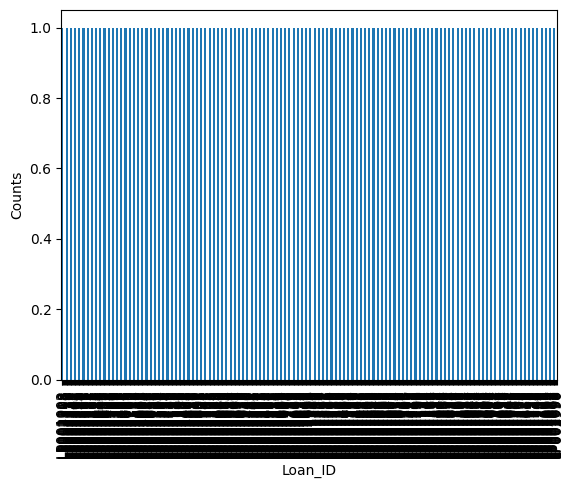

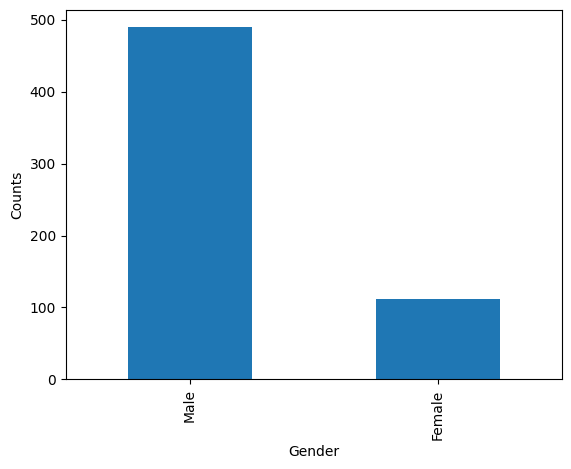

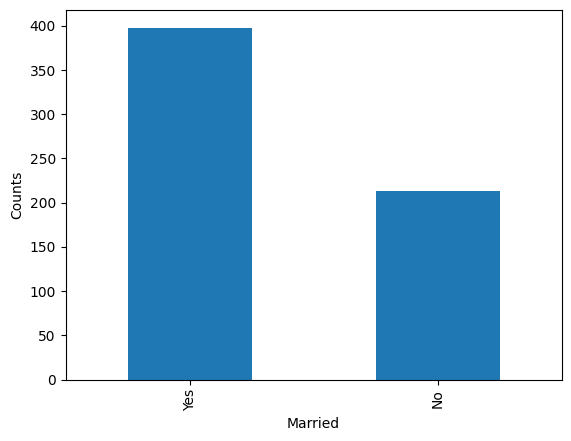

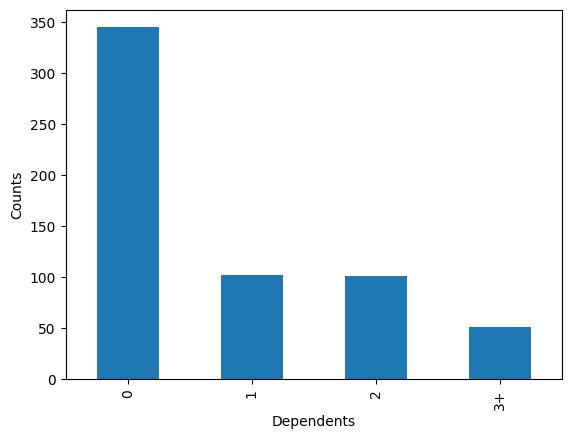

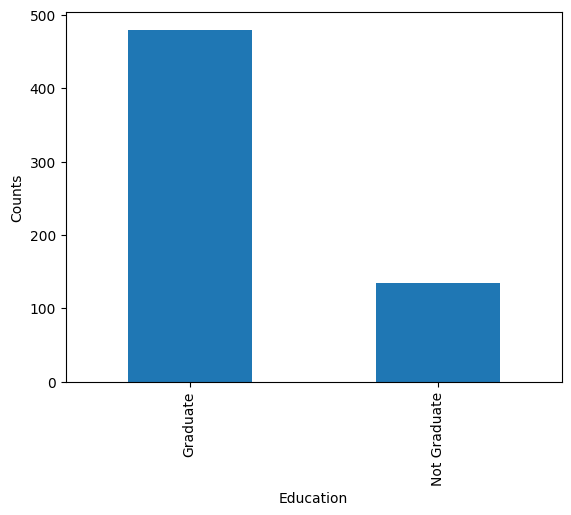

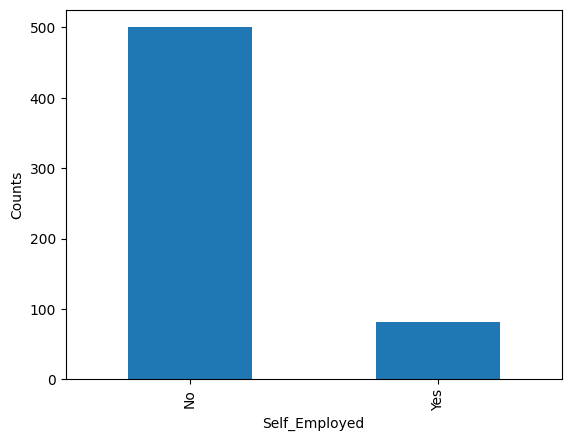

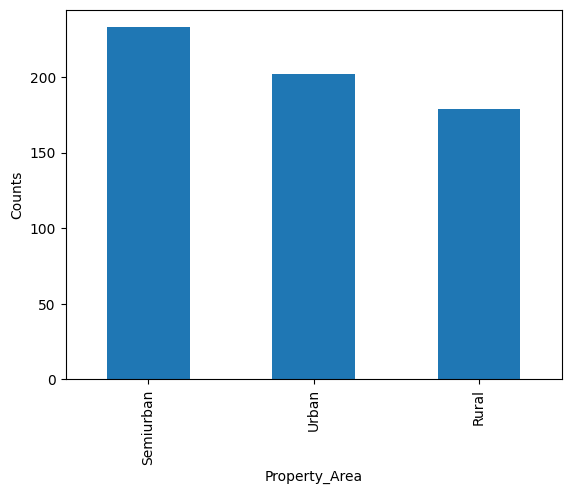

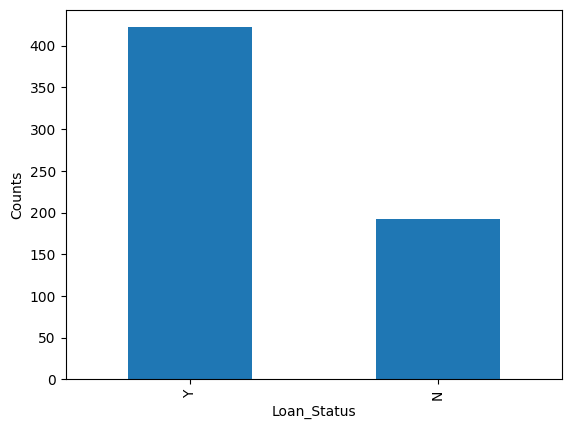

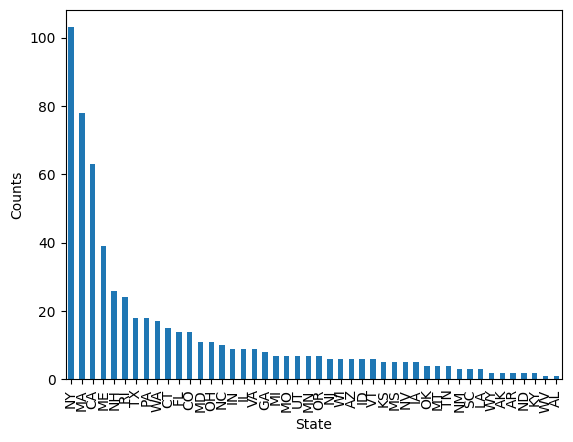

In [ ]:
# For Categotical Data.
for i in list(categorical_columns):
    data[i].value_counts().plot(kind="bar")
    plt.xlabel(i)
    plt.ylabel("Counts")
    plt.show()

##### **Numerical Columns**

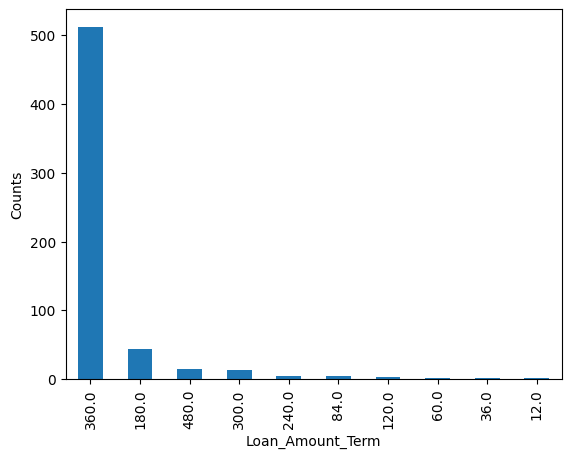

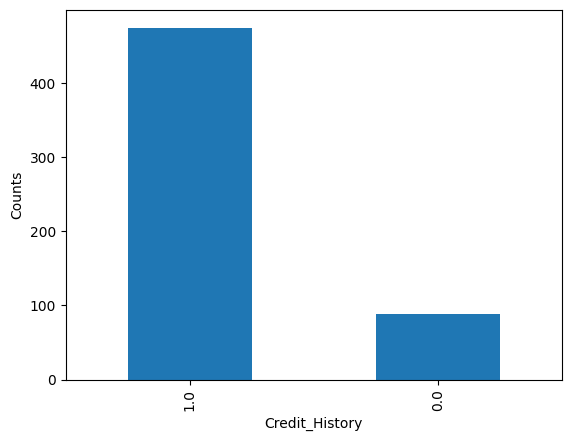

In [ ]:
# # For Discrete Numerical Data
for i in discrete_numerical_data:
    data[i].value_counts().plot(kind="bar")
    plt.xlabel(i)
    plt.ylabel("Counts")
    plt.show()

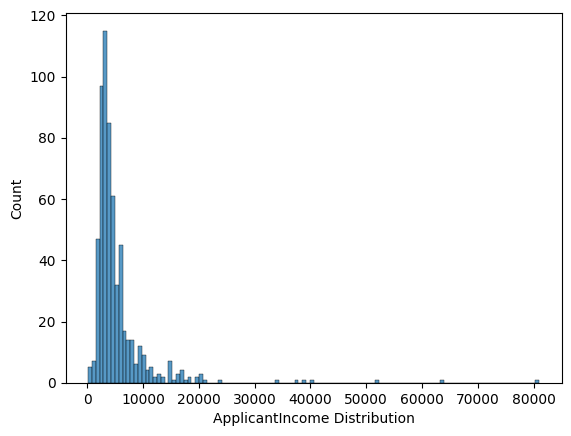

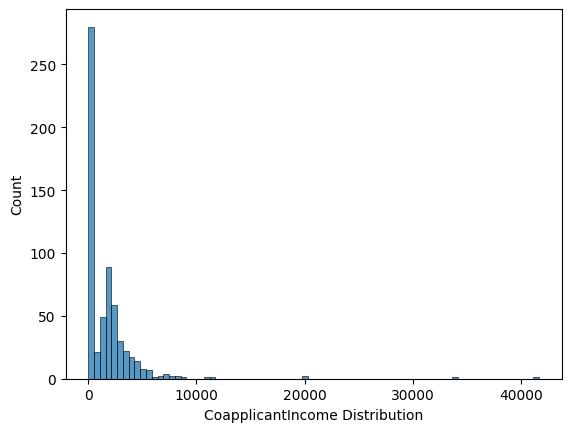

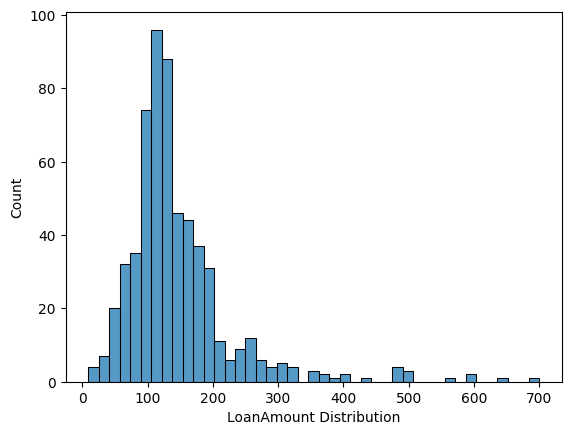

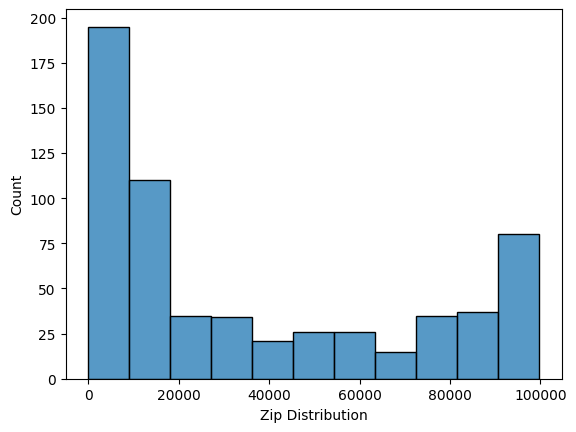

In [ ]:
# For Continuous Numerical Data
for i in continuous_numerical_data:
    sns.histplot(data[i])
    plt.xlabel(i+" Distribution")
    plt.show()

#### **Feature Engineering**

##### **Step1:** **Missing Value**

###### a) **checking and removing null**

In [ ]:
data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


##### b) **`Vizualize missing value**

<Axes: >

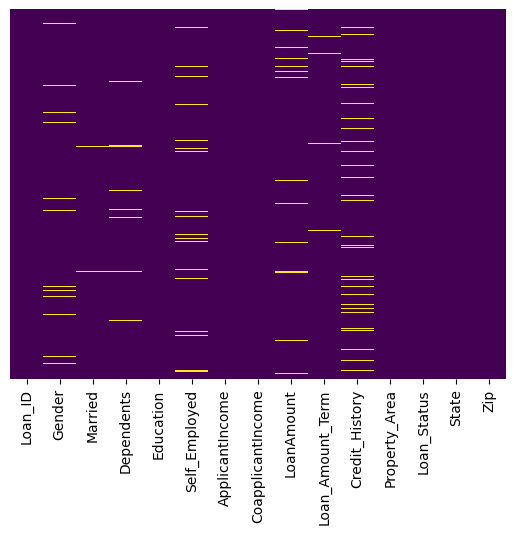

In [ ]:
#### Using Seaborn as sns heat map to plot for condition data.isnull() and wherever true or null, it will colour yellow(cmap) or missing then gap.
##### cbar+ false as we just need heat map for see null so side measure bar not required
sns.heatmap(data.isnull(), yticklabels=False, cbar= False, cmap="viridis")


#### **Conclusion:**
1. Credit_History has lots of missing values.


#### **Box plot for credit history to see distribution**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='Credit_History'>

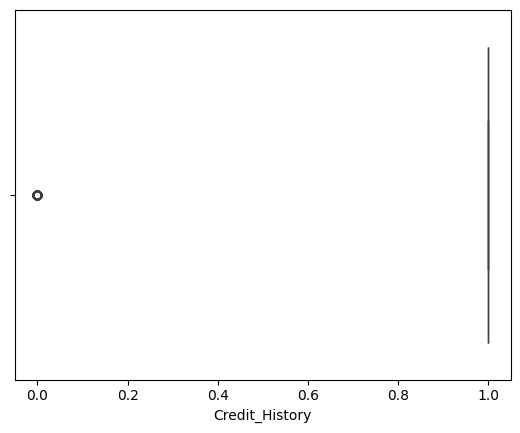

In [ ]:

sns.boxplot(x = data["Credit_History"])

####**Pie Chart(missing % in credit history)**

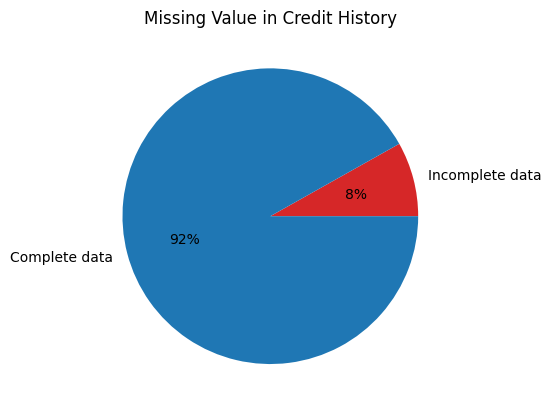

In [ ]:
## Calculate missing and complete values for the "Credit_History" column
missing_data = data["Credit_History"].isna().sum()
total_data = data["Credit_History"].shape[0]
complete_data = total_data - missing_data

# Calculate percentages
missing_percentage = (missing_data / total_data) * 100
complete_percentage = (complete_data / total_data) * 100

# Data for pie chart
x = [missing_percentage, complete_percentage]


## labels it
labels = ['Incomplete data', 'Complete data']
colors = ['tab:red', 'tab:blue']

## plot

fig, ax = plt.subplots()
ax.pie(x, labels=labels, colors=colors, autopct='%.0f%%')
ax.set_title("Missing Value in Credit History")
plt.show()





### **check missing rows**

In [ ]:
row_with_missing = np.where(data.isnull().any(axis=1))[0]
row_with_missing

## distribution of indices suggest that rows with missing are present all over .

array([  0,  11,  16,  19,  23,  24,  29,  30,  35,  36,  42,  44,  45,
        63,  73,  79,  81,  83,  86,  95, 102, 103, 104, 107, 111, 112,
       113, 114, 117, 120, 125, 126, 127, 129, 130, 156, 158, 165, 170,
       171, 181, 187, 188, 197, 198, 202, 218, 219, 223, 226, 228, 231,
       232, 236, 237, 259, 260, 268, 279, 284, 293, 295, 301, 305, 309,
       313, 314, 317, 318, 322, 323, 332, 333, 334, 335, 336, 338, 344,
       346, 348, 355, 363, 367, 374, 377, 380, 385, 387, 392, 395, 411,
       421, 423, 432, 435, 437, 444, 447, 449, 451, 460, 463, 467, 468,
       473, 477, 479, 490, 491, 497, 503, 506, 507, 517, 524, 530, 533,
       535, 542, 544, 550, 551, 556, 565, 571, 576, 579, 583, 588, 592,
       597, 600, 601, 605])

####**Removing Missing values**

In [5]:
# Drop rows with any missing values
data.dropna(subset=['Gender', "Credit_History", "Loan_Amount_Term", "LoanAmount", "Self_Employed", "Dependents"], inplace=True)



## trying another method


####**Step3:Checking Imbalance**

<ipython-input-31-f24e08008268>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "Loan_Status", data = data, palette=colours)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Loan_Status', ylabel='count'>

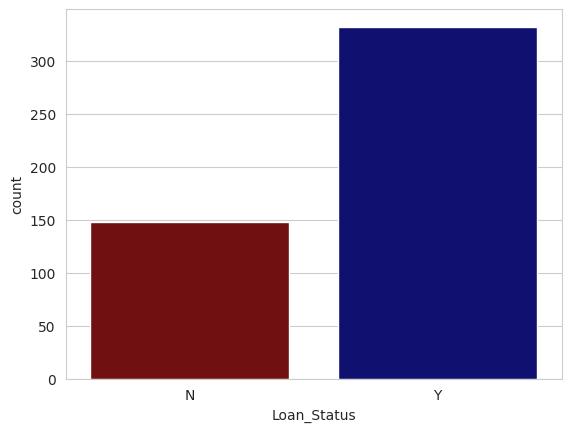

In [ ]:
## lets see the count of classes in target variable: imbalaced or not?
## use countplot to see visualise it

colours = ["maroon", "navy"]
sns.set_style("whitegrid")
sns.countplot(x = "Loan_Status", data = data, palette=colours)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `data` is your dataset containing the 'Loan_Status' column
colours = ["maroon", "navy"]
sns.set_style("whitegrid")

# Create the countplot
plt.figure(figsize=(8, 6))
sns.countplot(x="Loan_Status", data=data, palette=colours)

# Add title and labels
plt.title('Count of Loan Status (Target Variable)', fontsize=14)
plt.xlabel('Loan Status', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Save the plot as an image in the 'assets' folder (create this folder if not already created)
plt.savefig('assets/loan_status_countplot.png')

# Show the plot
plt.show()


#### **Conclusion:**
1. We see that classes of target is not balnced.
2. Y class is >>> N


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Loan_Status', ylabel='count'>

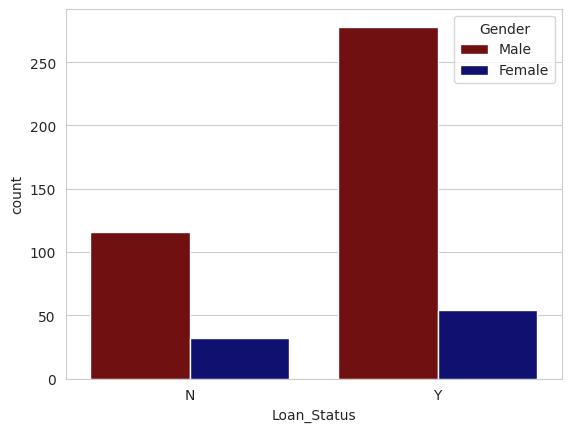

In [ ]:
## countplot or count of males and females who survived and not survived
colours = ["maroon", "navy"]
sns.set_style("whitegrid")
sns.countplot(x = "Loan_Status", data = data, hue = "Gender" , palette=colours)

### **conclusion**

*   According to data, male gets more loan approved then female.
but looking at not approved bar, man count is still up. lets see the that in more detail. May be data for not approved is less than approved.




In [ ]:
### lets see the count of loan statau
data["Loan_Status"].value_counts()

,count
Loan_Status,
Y,332
N,148


In [ ]:
data["Gender"].value_counts()

,count
Gender,
Male,394
Female,86


##### **Reason for not approved with male more count**

*   Yes and No loan status data is imbalace and has more yes
*   data for women is less than male.



#### **Numerical Variable**

####**Statistical Analysis**

#####a) **Outline for Statistical Analysis for Numerical columns**


* Descriptive statistics: mean, median, mode, sd, variance, range.(describe())

* Distribution analysis: skewness and kurtosis

* Inferencial Statistics: Hypothesis testing, CI(confidence interval)

* Correlation and Regression: Perason, relationship, spearman, heat map.

* Outlier Detection: Zscore, iqr, box plot, scatterplot, histogram


###### **Descriptive Statistics**

In [ ]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Zip
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167,35240.995833
std,5668.251251,2617.692267,80.508164,65.212401,0.353307,34560.802007
min,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000,4279.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000,18061.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000,66270.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000,99654.000000


#### **Conclusion**:



*  ** Applicant income**: In case of this, we see mean > median(5403> 3812) so right skewed saying that there could be some high values outliers on right side. Also, This high standard deviation indicates that applicant incomes vary widely from the mean.

* In Applicant income column, Large standard deviation suggests the presence of outliers or a diverse range of income levels. Outliers: The maximum value (81000) and the high standard deviation indicate that there may be several outliers influencing the average income.

*  Similar is for Co-Apllicant income and loan amount.
*  In Loan amount sd is high as compared to mean value, meaning wide range of variability.


*   Not considering Credit History as numerical  as although its value int type but its value is either 0 and 1. So will consider value count to know classes.


*   The whole statistics shows that distribution is skewed and there is presence of outlier.





####***Step4: Checking Outliers(Numerical columns)***

#####**Distribution of Numerical Columns using:**


*   Histogram

*   Scatter Plot
*   Histogram





###### a). **Distribution using Histogram**

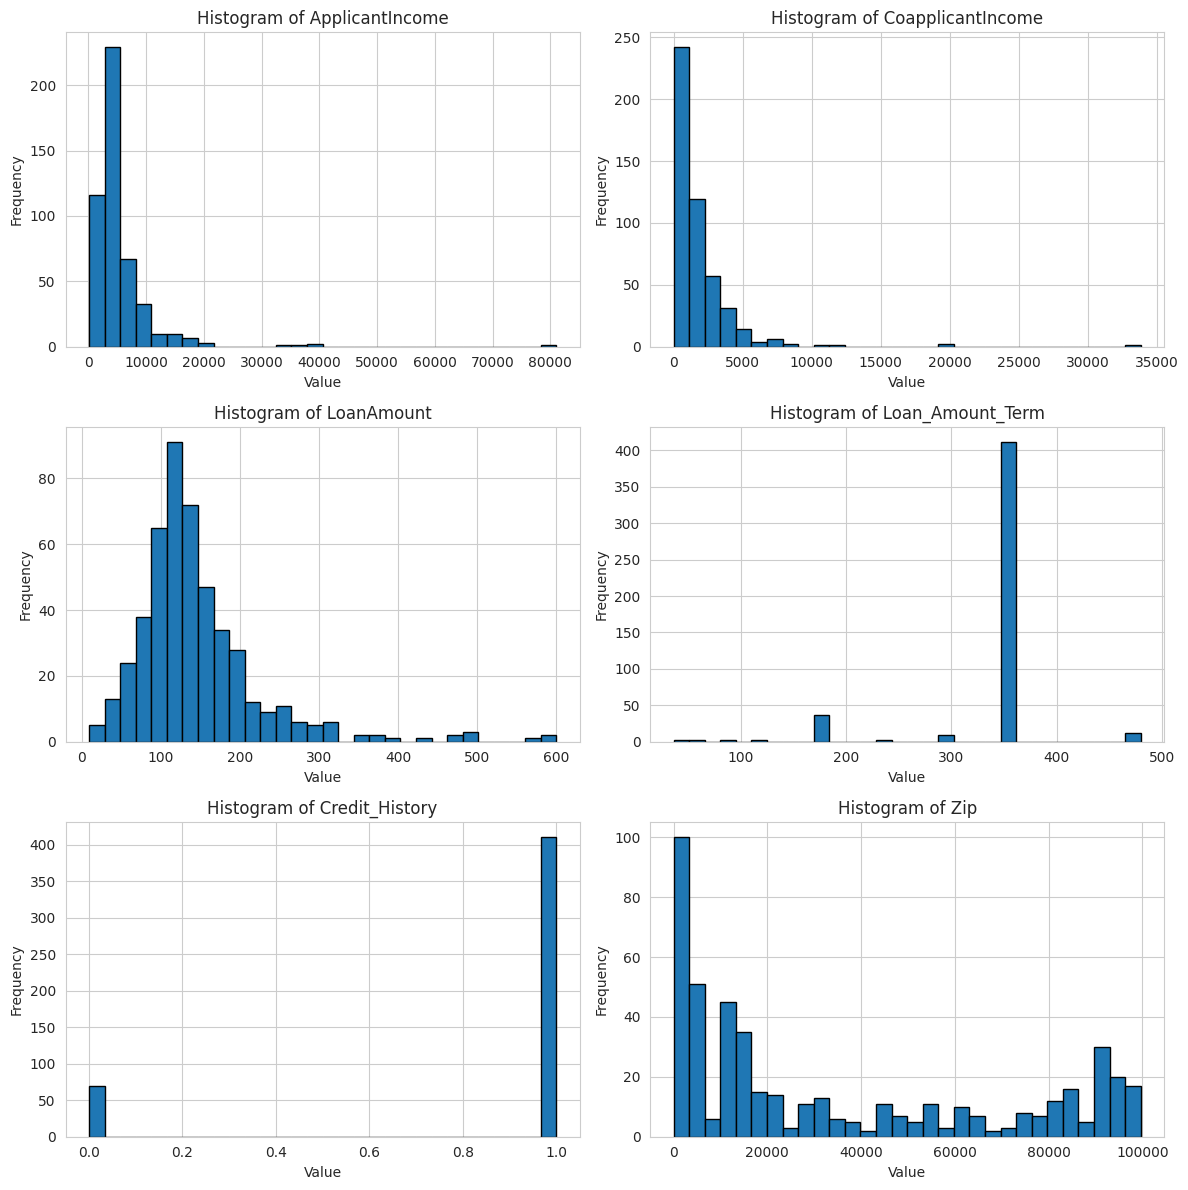

In [ ]:
# Identify numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Set up the figure and axes
num_vars = len(numerical_columns)
fig, axes = plt.subplots(nrows=(num_vars + 1) // 2, ncols=2, figsize=(12, num_vars * 4 // 2), tight_layout=True)

# Flatten the axes array for easy iteration if there are more than 1 row
axes = axes.flatten()

# Plot histograms for each numerical column
for idx, column in enumerate(numerical_columns):
    axes[idx].hist(data[column], bins=30, edgecolor='black')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_title(f'Histogram of {column}')
    axes[idx].grid(True)

# Hide any unused subplots
for idx in range(len(numerical_columns), len(axes)):
    axes[idx].axis('off')

plt.show()

#### **b)Scatter plot, Histogram, Box Plot for all numerical  variable**

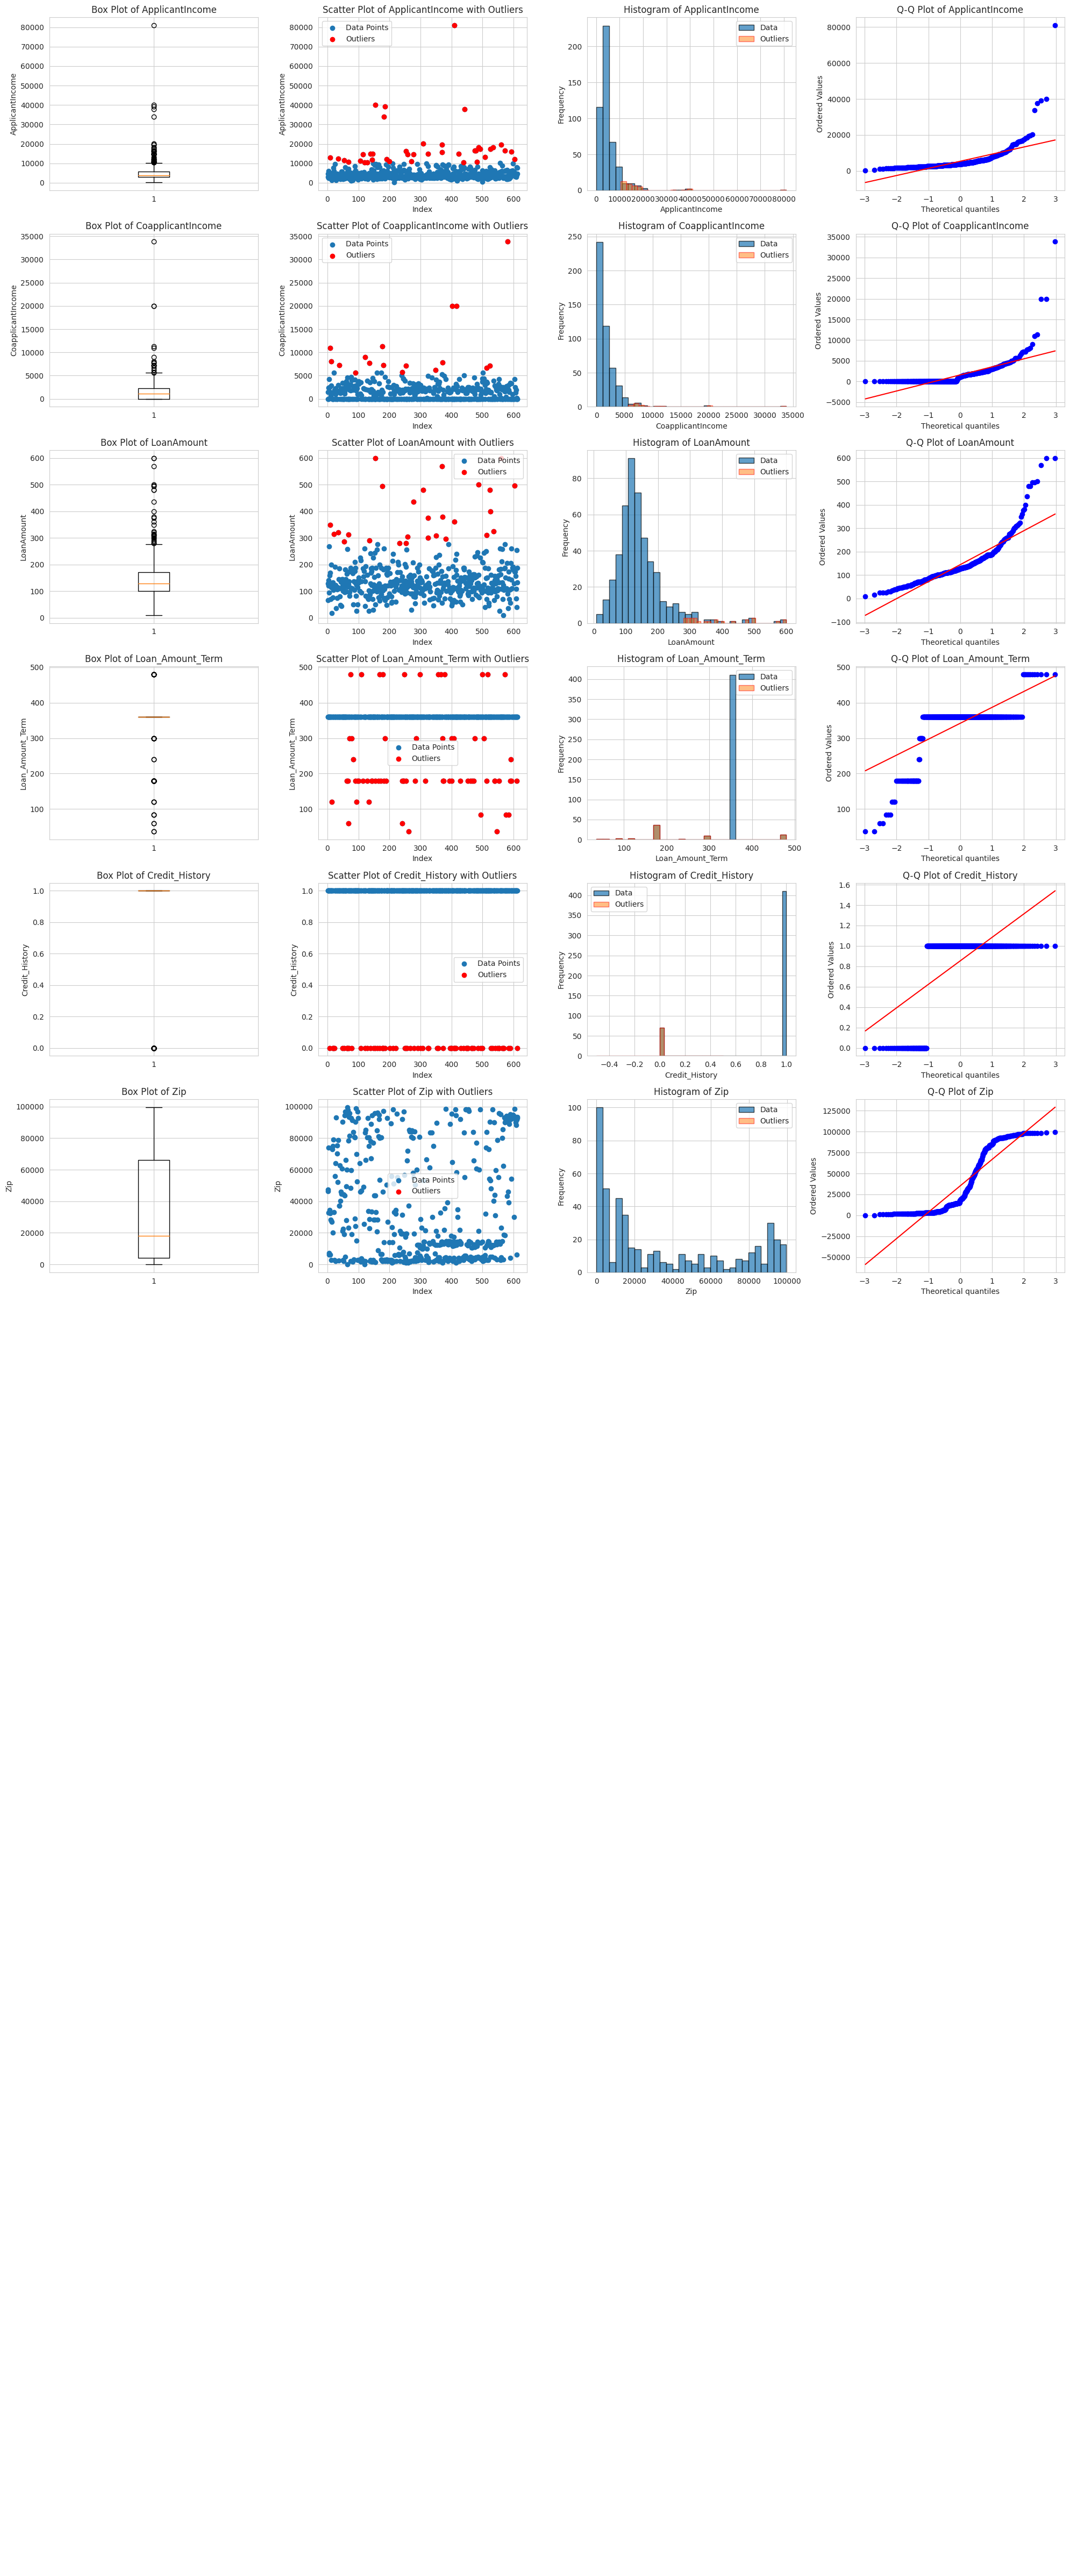

In [ ]:


# Identify numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Set up the figure and axes for plotting
num_vars = len(numerical_columns)
fig, axes = plt.subplots(nrows=num_vars*2, ncols=4, figsize=(20, num_vars*8), tight_layout=True)

# Flatten axes array for easier iteration
axes = axes.flatten()

for idx, column in enumerate(numerical_columns):
    # Box Plot
    ax = axes[idx*4]
    ax.boxplot(data[column])
    ax.set_title(f'Box Plot of {column}')
    ax.set_ylabel(column)
    ax.grid(True)

    # Scatter Plot with Outliers Highlighted
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[column] < (Q1 - 1.5 * IQR)) | (data[column] > (Q3 + 1.5 * IQR))]

    ax = axes[idx*4 + 1]
    ax.scatter(data.index, data[column], label='Data Points')
    ax.scatter(outliers.index, outliers[column], color='red', label='Outliers')
    ax.set_title(f'Scatter Plot of {column} with Outliers')
    ax.set_xlabel('Index')
    ax.set_ylabel(column)
    ax.legend()
    ax.grid(True)

    # Histogram with Outliers Highlighted
    ax = axes[idx*4 + 2]
    ax.hist(data[column], bins=30, edgecolor='black', alpha=0.7, label='Data')
    ax.hist(outliers[column], bins=30, edgecolor='red', alpha=0.5, label='Outliers')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.legend()
    ax.grid(True)

    # Q-Q Plot
    ax = axes[idx*4 + 3]
    stats.probplot(data[column], dist="norm", plot=ax)
    ax.set_title(f'Q-Q Plot of {column}')
    ax.grid(True)

# Hide any unused subplots
for idx in range(num_vars*4, len(axes)):
    axes[idx].axis('off')

plt.show()


##### **Conclusion on Distribution**:


* Distribution is skewed and box plot ansd scatter shows outlier which could effect the accuracy and also cause overfitting.
*   Before thinking of removing outliers since count of outliers in few columns are high, Lets see the correlation with target variable and whether imputation can work to impute outliers with mean.





####**Correlation Between Numerical columns**

#### **Correlation**:
1. It will help me to understand the strength and direction of independent variables with target variables. But this correlation will not answer that even if correlated, is it one cause other.
2. It will give idea about ***Multicollinearity*** to some extend if 2 coluns are very much related and can be further investigated to remove as both providing same info inc complexity.

3. Correlation needs to be see are:
a) independent(numerical) to independent(numerical) for multicollinearity
b) independent(num) with target. if target is num then u can see using corr() otherwise if target is categorical or any of them is catagorical then go for hypothesis testing like ab testing and others dependending upon type of variables used.


##### a) **Step1: Preparation**

######**seperating target and catageorical and numerical**

In [6]:
# keeping original data
data_copy = data.copy()
# data_fact acts as a dataframe with all independent var
data_fact = data_copy


####**Numerical Data**

In [7]:
# numerical data frame
numerical_data = data_fact.select_dtypes(include= ["int64", "float64"])
numerical_data


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Zip
1,4583,1508.0,128.0,360.0,1.0,46526
2,3000,0.0,66.0,360.0,1.0,47401
3,2583,2358.0,120.0,360.0,1.0,74012
4,6000,0.0,141.0,360.0,1.0,32801
5,5417,4196.0,267.0,360.0,1.0,6062
...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,92106
610,4106,0.0,40.0,180.0,1.0,91755
611,8072,240.0,253.0,360.0,1.0,6239
612,7583,0.0,187.0,360.0,1.0,92627


In [8]:
# keeping original data
data_copy = data.copy()
data_copy

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,State,Zip
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,IN,46526
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,IN,47401
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,OK,74012
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,FL,32801
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,CT,6062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,CA,92106
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,CA,91755
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,CT,6239
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,CA,92627


In [ ]:
# in independent variables dataframe
data_fact.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [ ]:
# dropped target variable loan status
data_copy.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'State', 'Zip'],
      dtype='object')

#### **target or dependent column**

In [9]:
 # target is dataframe conating target var
target = data.loc[:, ['Loan_Status']]
target

,Loan_Status
1,N
2,Y
3,Y
4,Y
5,Y
...,...
609,Y
610,Y
611,Y
612,Y


#### **Numerical column(Independent Variable correaltion)**

In [ ]:
### Checking linear correlation using (pearson)(r value-1 to 1)
numerical_data.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Zip
ApplicantIncome,1.000000,-0.112588,0.495310,-0.010838,-0.056152,-0.082265
CoapplicantIncome,-0.112588,1.000000,0.190740,-0.005775,-0.008692,0.044544
LoanAmount,0.495310,0.190740,1.000000,0.050867,-0.040773,-0.047953
Loan_Amount_Term,-0.010838,-0.005775,0.050867,1.000000,0.032937,-0.068328
Credit_History,-0.056152,-0.008692,-0.040773,0.032937,1.000000,0.038036
Zip,-0.082265,0.044544,-0.047953,-0.068328,0.038036,1.000000


#### **Heat map for pearson corrlation**

<Axes: >

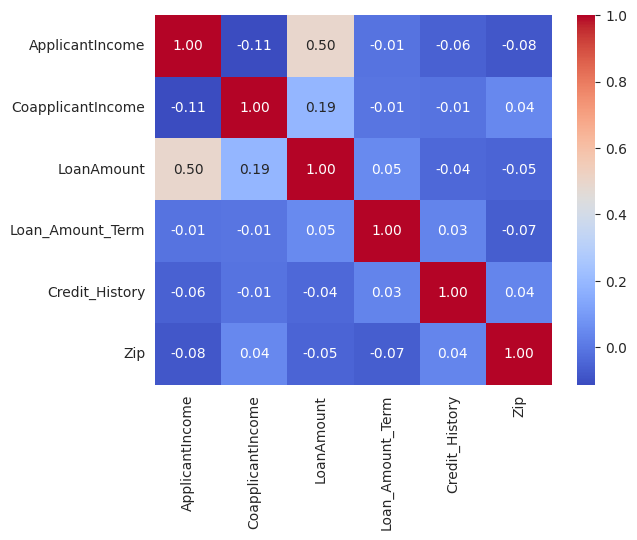

In [ ]:
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")

#### **Conclusion**:


1.  With linear correlation, none of the independent variables are correlated.



#### **Non Linear Correlation between independent numerical variables**

In [ ]:
### checking non linear correlation uisng speareman
spearman_corr = numerical_data.corr(method='spearman')

# Display the Spearman correlation matrix
print(spearman_corr)


                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.309729    0.521269   
CoapplicantIncome        -0.309729           1.000000    0.253366   
LoanAmount                0.521269           0.253366    1.000000   
Loan_Amount_Term         -0.043156          -0.007782    0.038612   
Credit_History            0.040811          -0.015170   -0.022984   
Zip                      -0.050671          -0.036007   -0.023111   

                   Loan_Amount_Term  Credit_History       Zip  
ApplicantIncome           -0.043156        0.040811 -0.050671  
CoapplicantIncome         -0.007782       -0.015170 -0.036007  
LoanAmount                 0.038612       -0.022984 -0.023111  
Loan_Amount_Term           1.000000        0.053482 -0.034559  
Credit_History             0.053482        1.000000  0.061664  
Zip                       -0.034559        0.061664  1.000000  


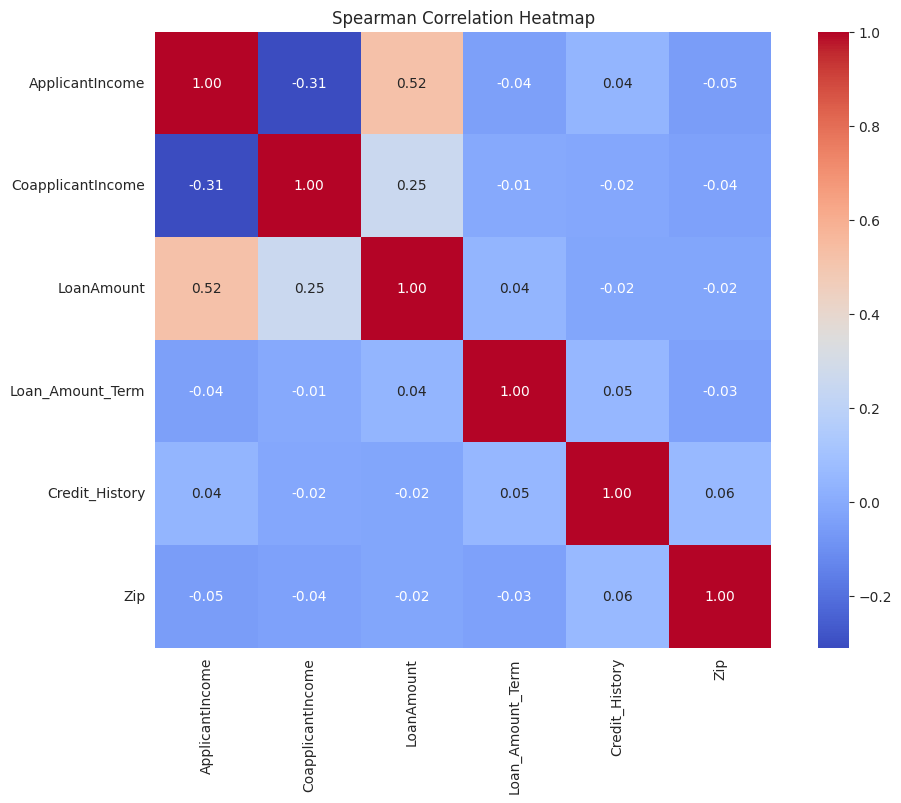

In [ ]:
#### Heat map for speareman correlation
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Spearman Correlation Heatmap')
plt.show()


#### **Conclusion**:




*   With non linear correlation, we see that **loan Amount and Applicant **income has moderate correlation of 0.5(-1 to 1) so there might be.


**Check multicollinearity between loan amount and applicant income**


* Will use **VIF** to check for multicollinaerity between independent var esp loan amount and applicant income




####**Check Multicollinearity**

In [ ]:
### VIF
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Select only numerical columns
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Create a DataFrame to hold VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = numerical_data.columns
vif_data["VIF"] = [variance_inflation_factor(numerical_data.values, i) for i in range(numerical_data.shape[1])]

# Display the VIF DataFrame
print(vif_data)


# Check VIF specifically for loan amount and applicant income
loan_amount_vif = vif_data[vif_data["Feature"] == "LoanAmount"]["VIF"].values[0]
applicant_income_vif = vif_data[vif_data["Feature"] == "ApplicantIncome"]["VIF"].values[0]

print(f"VIF for Loan Amount: {loan_amount_vif}")
print(f"VIF for Applicant Income: {applicant_income_vif}")

# Interpretation
if loan_amount_vif > 5 or applicant_income_vif > 5:
    print("There may be multicollinearity issues with Loan Amount and Applicant Income.")
else:
    print("Loan Amount and Applicant Income are likely not multicollinear.")


             Feature       VIF
0    ApplicantIncome  2.670092
1  CoapplicantIncome  1.503109
2         LoanAmount  5.964590
3   Loan_Amount_Term  8.724535
4     Credit_History  5.965616
5                Zip  1.969584
VIF for Loan Amount: 5.96458992581357
VIF for Applicant Income: 2.670092409744122
There may be multicollinearity issues with Loan Amount and Applicant Income.


#####**Conclusion on loan amount & Applicant Income:**


* There is multicollinaerity between loan amount and applicant income


*  Upon analysis, we found that both Loan Amount and Applicant Income exhibit multicollinearity, as indicated by high Variance Inflation Factor (VIF) values. **Although they are not highly correlated, their inclusion can lead to instability in our model. To simplify our model and improve interpretability, I recommend removing one of these features.** We will validate the model after this adjustment to ensure its predictive power remains intact.

*   If ApplicantIncome and Loan_Amount provide similar information about what drives loan approval), including both may not add any new insights to the model.







#### **Categorical Data**

#### **b) Categorical Data Correlations and Relationship**

**Methods used**

1. Value_count(count of single catagorical variable)

2. cross_tab(count of 2 catag var)

3. chi square(between 2 catag)

In [10]:
# classificatiion columns:
catogerical_data = data_fact.select_dtypes(include='object')
catogerical_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,State
1,LP001003,Male,Yes,1,Graduate,No,Rural,N,IN
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y,IN
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y,OK
4,LP001008,Male,No,0,Graduate,No,Urban,Y,FL
5,LP001011,Male,Yes,2,Graduate,Yes,Urban,Y,CT
...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y,CA
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y,CA
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y,CT
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y,CA


#### **Univariate analysis for categorical**



In [ ]:
# Frequency table
# cateogorical(value_counts)
# using .value_counts() function can help you get the number of observations under each category.
data['Gender'].value_counts()

,count
Gender,
Male,394
Female,86


#### **visualize gender**

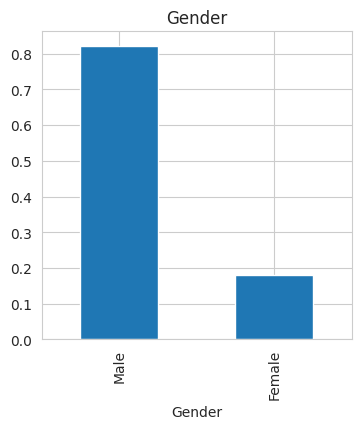

In [ ]:
import matplotlib.pyplot as plt
data["Gender"].value_counts(normalize=True).plot.bar(figsize=(4,4),title="Gender")
plt.show()

In [ ]:
# for married
# using .value_counts() function can help you get the number of observations under each category.
data['Married'].value_counts()

,count
Married,
Yes,311
No,169


#### **visualize married**

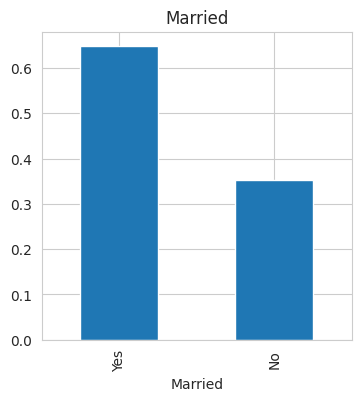

In [ ]:
data["Married"].value_counts(normalize=True).plot.bar(figsize=(4,4),title="Married")
plt.show()

In [ ]:
# Calculate value counts and normalize
counts = data["Married"].value_counts(normalize=False)

# Plot the bar chart
fig, ax = plt.subplots(figsize=(4, 4))
bars = counts.plot.bar(ax=ax, title="Married")

# Add counts on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height}',
            ha='center', va='bottom')

# Show the plot
plt.show()

#### **credit history**

In [ ]:
# credit history
# using .value_counts() function can help you get the number of observations under each category.
data['Credit_History'].value_counts()

,count
Credit_History,
1.0,410
0.0,70


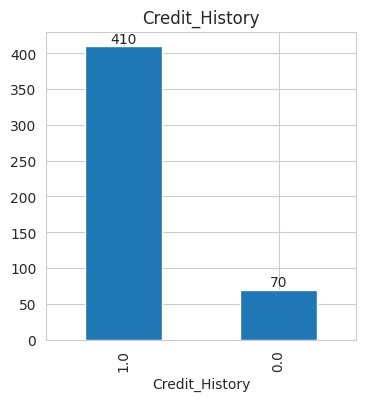

In [ ]:
# Calculate value counts and normalize
counts = data["Credit_History"].value_counts(normalize=False)

# Plot the bar chart
fig, ax = plt.subplots(figsize=(4, 4))
bars = counts.plot.bar(ax=ax, title="Credit_History")

# Add counts on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height}',
            ha='center', va='bottom')

# Show the plot
plt.show()

In [ ]:
data["Credit_History"].unique()

array([1., 0.])

#### **Dependents**

In [ ]:
# using .value_counts() function can help you get the number of observations under each category.
data['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
3+,41


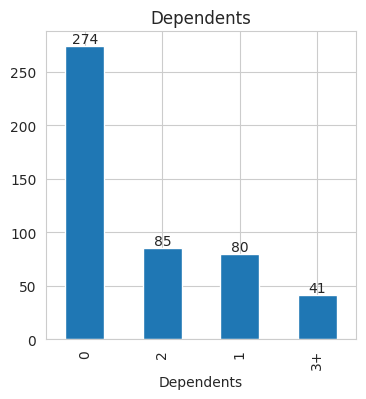

In [ ]:
# Calculate value counts and normalize
counts = data["Dependents"].value_counts(normalize=False)

# Plot the bar chart
fig, ax = plt.subplots(figsize=(4, 4))
bars = counts.plot.bar(ax=ax, title="Dependents")

# Add counts on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height}',
            ha='center', va='bottom')

# Show the plot
plt.show()

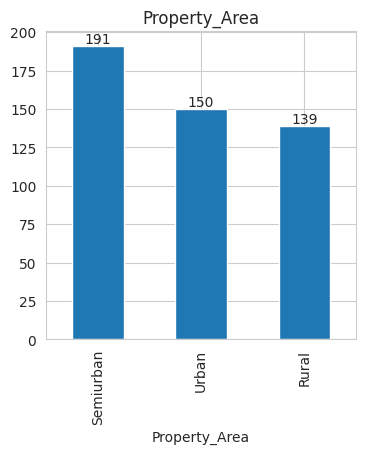

In [ ]:
# Calculate value counts and normalize
counts = data["Property_Area"].value_counts(normalize=False)

# Plot the bar chart
fig, ax = plt.subplots(figsize=(4, 4))
bars = counts.plot.bar(ax=ax, title="Property_Area")

# Add counts on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height}',
            ha='center', va='bottom')

# Show the plot
plt.show()

In [ ]:
# ## THIS IS LIKE MULTIVARIATE . INSTEAD USING CROSS TAB USING GROUOBY
# ## Group by 'State' and apply value_counts on 'Gender'
# gender_counts = data.groupby('State')['Gender'].value_counts().unstack()
# gender_counts

In [ ]:
# Group by 'State' and apply value_counts on 'Gender'
gender_counts = data.groupby('Loan_Status')['Gender'].value_counts().unstack()
gender_counts

Gender,Female,Male
Loan_Status,,
N,32,116
Y,54,278


#### **Multivariate analysis(between Categorical independent/Feature variables and target(categorical) using cross tab or groupby value counts**

In [ ]:
## grup by gender and see each group has how much yes and no loan status
pd.crosstab(data.Gender, data.Loan_Status)

## same thing using group by and vaoue count
# Group by 'State' and apply value_counts on 'Gender'
gender_counts = data.groupby('Loan_Status')['Gender'].value_counts().unstack()
gender_counts

Gender,Female,Male
Loan_Status,,
N,32,116
Y,54,278


In [ ]:
pd.crosstab(data.Dependents, data.Loan_Status)

Loan_Status,N,Y
Dependents,,
0,87,187
1,28,52
2,20,65
3+,13,28


In [ ]:
pd.crosstab(data.Property_Area, data.Loan_Status)

Loan_Status,N,Y
Property_Area,,
Rural,54,85
Semiurban,42,149
Urban,52,98


###**Close look on credit history and loan status cross tab count**

In [ ]:
data["Loan_Status"].value_counts()

,count
Loan_Status,
Y,332
N,148


In [ ]:
data["Credit_History"].value_counts()

,count
Credit_History,
1.0,410
0.0,70


In [ ]:
pd.crosstab(data.Credit_History, data.Loan_Status)

Loan_Status,N,Y
Credit_History,,
0.0,63,7
1.0,85,325


##### **Insights from Cross-Tab Results of loan amount and loan sttaus.**
1. The cross-tab shows the counts of approved and denied loans for each category of credit history. The significant difference in the counts allows to compare the approval rates effectively.Higher approval rates are seen with a credit history of 1.0 compared to 0.0, suggesting a positive association.
2. Proportions: Analyzing percentages can clarify how significantly credit history impacts loan approval.
3. Most importantly, just seeing the cross tab we cannot conclude this relationship as it might be due to **imbalance data**and other reason. Also, we clearly see under value count of each col that count of each classes have wide range.
4. **sttaistical test and vizualisation**will help to know more .

#### **Proportions**

In [ ]:
# Create a crosstab and calculate proportions
proportions = pd.crosstab(data['Credit_History'], data['Loan_Status'], normalize='index')
proportions

Loan_Status,N,Y
Credit_History,,
0.0,0.900000,0.100000
1.0,0.207317,0.792683


##### Conclusions:
1. Credit History 0.0: 90% Not Approved (N): A very high percentage of applicants with a credit history of 0.0 are not approved for loans.
2. 10% Approved (Y): Only a small fraction of these applicants get approved.
3. Credit History 1.0:
20.73% Not Approved (N): A significantly lower percentage of applicants with a credit history of 1.0 are not approved.
79.27% Approved (Y): The vast majority of these applicants are approved for loans.

####**Hypothesis Testing**

##### **Hypothesis testing(between 2 categorical): Lets analyse the relationship significance between credit history and loan status(to understand in terms of population data and not just sample data)**
**Note:** credit_history considered categorical as 2 distinct values:0.0,1.0

a) **Null Hypothesis**(H0): There is no significant
 association between credit history (0 and 1) and loan approval status (Y and N).


b) **Alternative Hypothesis**(H1): There is a significant association
between credit history (0 and 1) and loan approval status (Y and N).

#### **Chi Square Test**: **for categorical**

In [ ]:

import scipy.stats as stats


# Create a contingency table
contingency_table = pd.crosstab(data['Credit_History'], data['Loan_Status'])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform Chi-Squared test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Display results
print("\nChi-Squared Test Results:")
print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: \n{expected}")

# Interpret the results
alpha = 0.05  # significance level
if p < alpha:
    print("\nReject the null hypothesis: There is a significant association between credit history and loan status.")
else:
    print("\nFail to reject the null hypothesis: There is no significant association between credit history and loan status.")


Contingency Table:
Loan_Status      N    Y
Credit_History         
0.0             63    7
1.0             85  325

Chi-Squared Test Results:
Chi2 Statistic: 131.29328312402075
P-value: 2.135981766869101e-30
Degrees of Freedom: 1
Expected Frequencies: 
[[ 21.58333333  48.41666667]
 [126.41666667 283.58333333]]

Reject the null hypothesis: There is a significant association between credit history and loan status.


####**Conclusion:**


*  According to chi square, null hypothesis is rejected, meaning There is a *significant association between credit history and loan status*.







##### **Second case**:  

> Proportion test to evaluate whether the proportion of approved loans (Loan_Status = 'Y') is significantly different between those with a credit history of 0 (poor) and those with a credit history of 1 (good) using chi square



**Null Hypothesis:H0**

The proportions of approved loans are the same for both credit history groups

**Alternative Hypothesis: H1**

: The proportions of approved loans are different for the two groups.

In [ ]:
import statsmodels.api as sm
# Create a contingency table
contingency_table = pd.crosstab(data['Credit_History'], data['Loan_Status'])

# Extract counts
count_0 = contingency_table.loc[0.0, 'Y']  # Count of approved loans for credit history 0
count_1 = contingency_table.loc[1.0, 'Y']  # Count of approved loans for credit history 1
n_0 = contingency_table.loc[0.0].sum()  # Total for credit history 0
n_1 = contingency_table.loc[1.0].sum()  # Total for credit history 1

# Perform two-proportion z-test
count = np.array([count_0, count_1])
n = np.array([n_0, n_1])
z_score, p_value = sm.stats.proportions_ztest(count, n)

# Display results
print("Proportion Test Results:")
print(f"Z-score: {z_score}")
print(f"P-value: {p_value}")

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: There is a significant difference in loan approval rates based on credit history.")
else:
    print("\nFail to reject the null hypothesis: There is no significant difference in loan approval rates based on credit history.")

#### **Conclusion**
Reject the null hypothesis: There is a significant difference in loan approval rates based on credit history.

#### **to see crostab values using heatmap**

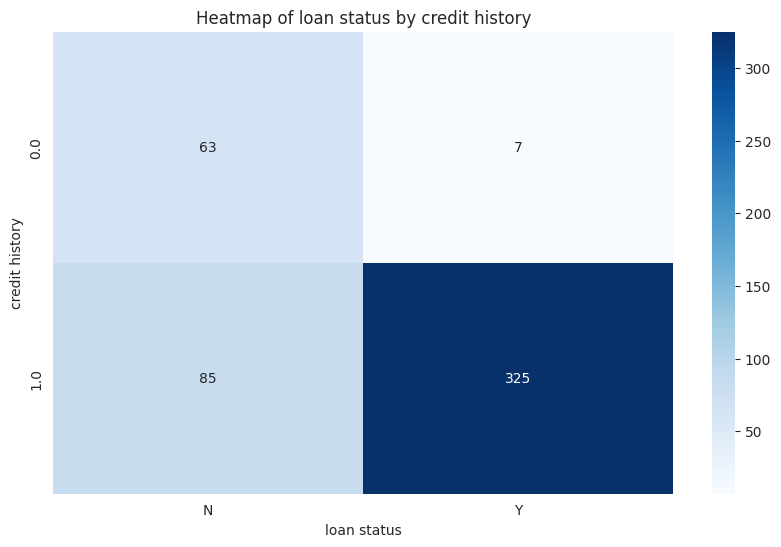

In [ ]:
cross_tab = pd.crosstab(data.Credit_History, data.Loan_Status)
# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d')
plt.title('Heatmap of loan status by credit history')
plt.xlabel('loan status')
plt.ylabel("credit history")
plt.show()


#### **Lets see in detail some relation between loan status and applicant income:**

In [ ]:
### lets first see the count:
#Differences in means or medians across categories can indicate a relationship
data.groupby('Loan_Status')['ApplicantIncome'].mean()


,ApplicantIncome
Loan_Status,
N,5730.189189
Y,5201.093373


#####**Conclusion**

*   This is showing that for not approved applicant , they  have higher mean income than approved applicant, which is unusual thing. It might be due to outlier.


*   It very unusuall to see that higher income has more rejections.

*   It might be outliers in higher side that lead to such conclusion
lets see in more detail:

**Solution1:**

* If its outlier creating such results lets dividide applicant income into high medium low using thresold and see rejection rate for each group .then see each group count of credit histry and others,








#### **Outliers**

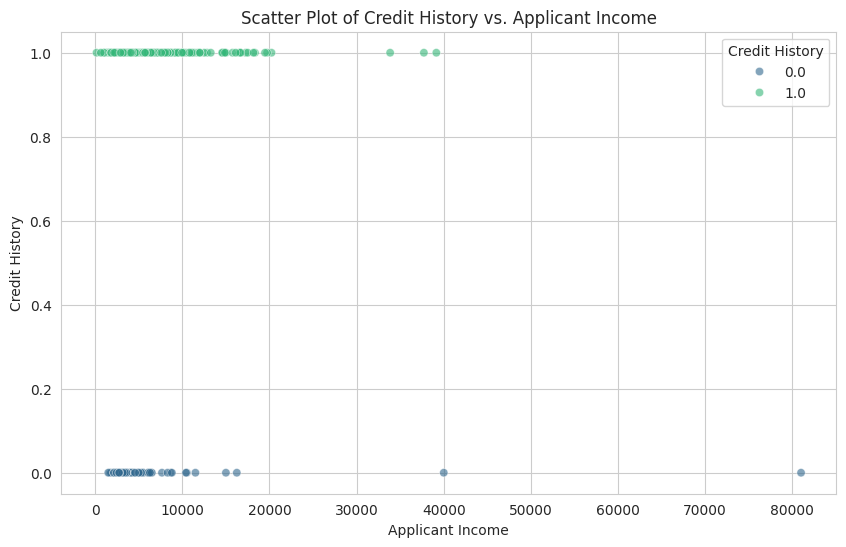

In [ ]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ApplicantIncome', y='Credit_History', data=data, hue='Credit_History', palette='viridis', alpha=0.6)

# Add titles and labels
plt.title('Scatter Plot of Credit History vs. Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Credit History')
plt.legend(title='Credit History', loc='upper right')
plt.grid(True)
plt.show()

#### **Conclusion**:



*  With credit 0 , we see extreme value of applicant income as 4000 and 8000 which could be making high income more rejections and so mean of credit 0 is more
*   Under credit 1, income range is small and no extreme values.




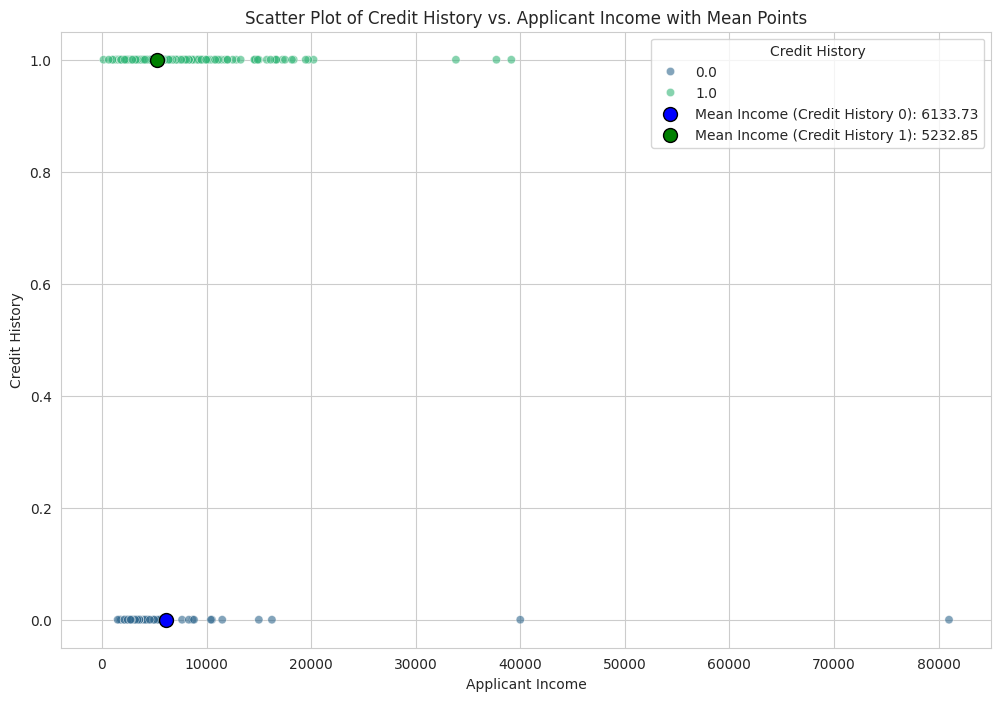

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#

# Create scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='ApplicantIncome', y='Credit_History', data=data, hue='Credit_History', palette='viridis', alpha=0.6)

# Calculate means
mean_income_0 = data[data['Credit_History'] == 0]['ApplicantIncome'].mean()
mean_income_1 = data[data['Credit_History'] == 1]['ApplicantIncome'].mean()

# Add mean income points
plt.scatter(mean_income_0, 0, color='blue', s=100, edgecolor='black', label=f'Mean Income (Credit History 0): {mean_income_0:.2f}')
plt.scatter(mean_income_1, 1, color='green', s=100, edgecolor='black', label=f'Mean Income (Credit History 1): {mean_income_1:.2f}')

# Add titles and labels
plt.title('Scatter Plot of Credit History vs. Applicant Income with Mean Points')
plt.xlabel('Applicant Income')
plt.ylabel('Credit History')
plt.legend(title='Credit History', loc='upper right')
plt.grid(True)
plt.show()


#### **lets see for all 3 var: credit income and loan status**

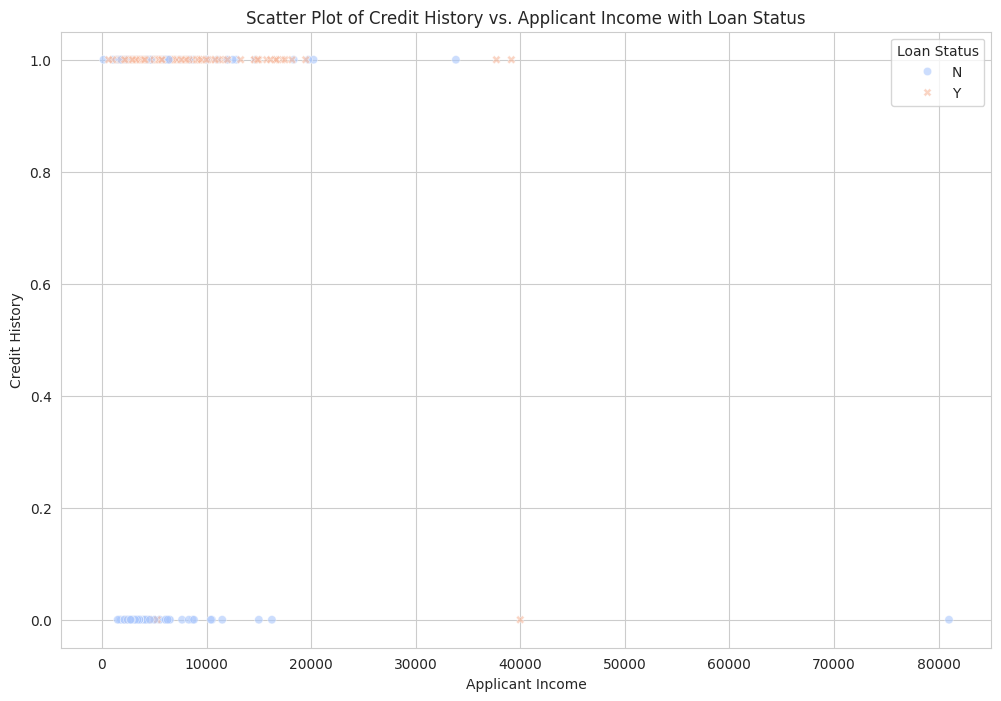

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
plt.figure(figsize=(12, 8))
sns.scatterplot(x='ApplicantIncome', y='Credit_History', hue='Loan_Status', palette='coolwarm', alpha=0.6, style='Loan_Status', data = data)

# Add titles and labels
plt.title('Scatter Plot of Credit History vs. Applicant Income with Loan Status')
plt.xlabel('Applicant Income')
plt.ylabel('Credit History')
plt.legend(title='Loan Status')
plt.grid(True)
plt.show()


####**Analysis2:**


* Lets add column as high low medium income wrt applicant income using some thresold.




####**Data2 for adding column "income category"**

In [11]:
data2 = data.copy()

In [ ]:
data2.columns

In [12]:
## condition
# Calculate quartiles
Q1 = data2['ApplicantIncome'].quantile(0.25)
Q2 = data2['ApplicantIncome'].quantile(0.50)  # Median
Q3 = data2['ApplicantIncome'].quantile(0.75)

print("Q1 (25th percentile):", Q1)
print("Q2 (50th percentile, Median):", Q2)
print("Q3 (75th percentile):", Q3)

Q1 (25th percentile): 2898.75
Q2 (50th percentile, Median): 3859.0
Q3 (75th percentile): 5852.5


####**creating column"income category" from applicantincome bins**

In [13]:
data2 = data.copy()

### seperating groups with quartiles condition

# Calculate quartiles
Q1 = data2['ApplicantIncome'].quantile(0.25)
Q2 = data2['ApplicantIncome'].quantile(0.50)  # Median
Q3 = data2['ApplicantIncome'].quantile(0.75)

print("Q1 (25th percentile):", Q1)
print("Q2 (50th percentile, Median):", Q2)
print("Q3 (75th percentile):", Q3)

# Define income categories based on quartiles
data2['Income_Category'] = pd.cut(data2['ApplicantIncome'],
                               bins=[-float('inf'), Q1, Q2, Q3, float('inf')],
                               labels=['Low', 'Medium', 'High', "Extreme"], right=False)

# Display the DataFrame with new category

data2


Q1 (25th percentile): 2898.75
Q2 (50th percentile, Median): 3859.0
Q3 (75th percentile): 5852.5


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,State,Zip,Income_Category
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,IN,46526,High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,IN,47401,Medium
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,OK,74012,Low
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,FL,32801,Extreme
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,CT,6062,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,CA,92106,Medium
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,CA,91755,High
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,CT,6239,Extreme
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,CA,92627,Extreme


## l**ets do analysis using these categories**

####**Extreme df**

In [14]:
# for above q3 >5852.5 is extreme
Extreme_df = data2[data2["Income_Category"] == "Extreme"]
Extreme_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,State,Zip,Income_Category
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,FL,32801,Extreme
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,CT,6073,Extreme
20,LP001043,Male,Yes,0,Not Graduate,No,7660,0.0,104.0,360.0,0.0,Urban,N,TX,79029,Extreme
21,LP001046,Male,Yes,1,Graduate,No,5955,5625.0,315.0,360.0,1.0,Urban,Y,FL,33065,Extreme
25,LP001066,Male,Yes,0,Graduate,Yes,9560,0.0,191.0,360.0,1.0,Semiurban,Y,MN,56082,Extreme


In [ ]:
Extreme_df.describe()

### **High_df:**

In [15]:
high_df = data2[data2["Income_Category"] == "High"]
high_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,State,Zip,Income_Category
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,IN,46526,High
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,CT,6062,High
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y,FL,32456,High
15,LP001032,Male,No,0,Graduate,No,4950,0.0,125.0,360.0,1.0,Urban,Y,OK,73112,High
18,LP001038,Male,Yes,0,Not Graduate,No,4887,0.0,133.0,360.0,1.0,Rural,N,TX,75093,High


### **scatter plot with applicant income  wrt to credit histiry in  extreme df**

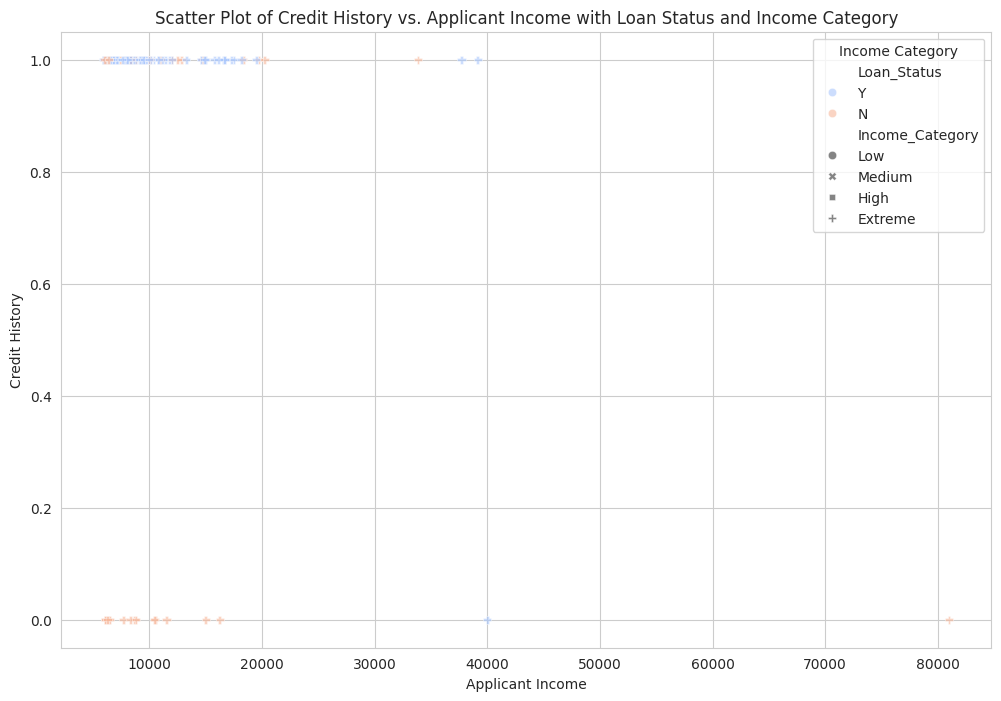

In [ ]:
### scatter plot with income category
plt.figure(figsize=(12, 8))
sns.scatterplot(x='ApplicantIncome', y='Credit_History', hue='Loan_Status', palette='coolwarm', alpha=0.6, style='Income_Category', data=Extreme_df)
plt.title('Scatter Plot of Credit History vs. Applicant Income with Loan Status and Income Category')
plt.xlabel('Applicant Income')
plt.ylabel('Credit History')
plt.legend(title='Income Category')
plt.grid(True)
plt.show()


### # **Summary statistics for ApplicantIncome by Income_Category**

In [ ]:
# Summary statistics for ApplicantIncome by Income_Category
income_summary = data2.groupby('Income_Category')['ApplicantIncome'].describe()
income_summary

# this division is made by my condition applied on income


<ipython-input-83-b61f3bd5f4f1>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_summary = data2.groupby('Income_Category')['ApplicantIncome'].describe()


,count,mean,std,min,25%,50%,75%,max
Income_Category,,,,,,,,
Low,120.0,2254.950000,467.917878,150.0,2014.0,2372.0,2600.00,2895.0
Medium,119.0,3343.075630,275.579487,2900.0,3101.5,3326.0,3590.50,3858.0
High,121.0,4682.785124,601.391154,3859.0,4167.0,4583.0,5166.00,5829.0
Extreme,120.0,11164.950000,8968.282498,5923.0,6591.0,8645.0,11817.75,81000.0


#### **extreme df stattistics**

In [ ]:
# for above q3 >5852.5 is extreme
Extreme_df = data2[data2["Income_Category"] == "Extreme"]
Extreme_df.describe()


### **Statistics of high df**

In [ ]:
high_df = data2[data2["Income_Category"] == "High"]
high_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Zip
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,4682.785124,1408.925620,138.487603,347.305785,0.884298,34864.471074
std,601.391154,1932.254112,58.300960,51.012881,0.321198,33657.395982
min,3859.000000,0.000000,26.000000,84.000000,0.000000,0.000000
25%,4167.000000,0.000000,110.000000,360.000000,1.000000,4106.000000
50%,4583.000000,736.000000,130.000000,360.000000,1.000000,19611.000000
75%,5166.000000,2306.000000,160.000000,360.000000,1.000000,70130.000000
max,5829.000000,11300.000000,495.000000,480.000000,1.000000,99654.000000


#### **Box Plot of Applicant Income by Income Category**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


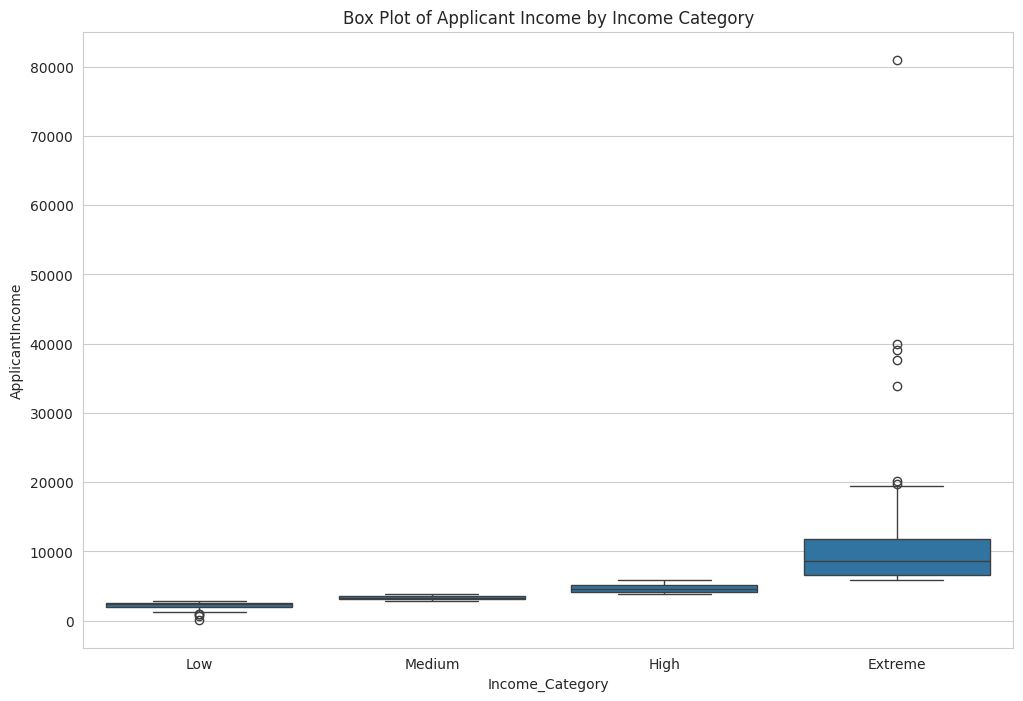

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box Plot of Applicant Income by Income Category
plt.figure(figsize=(12, 8))
sns.boxplot(x='Income_Category', y='ApplicantIncome', data=data2)
plt.title('Box Plot of Applicant Income by Income Category')
plt.show()


####**NOTE:We see some outliers in low category income but extreme applicant income category has max outliers**

In [ ]:
#reate crosstab
crosstab_result = pd.crosstab(data2['Income_Category'], data2['Loan_Status'])
crosstab_result

Loan_Status,N,Y
Income_Category,,
Low,38,82
Medium,35,84
High,35,86
Extreme,40,80


In [ ]:
crosstab_result = pd.crosstab(data2['Income_Category'], data2['Credit_History'])
crosstab_result

Credit_History,0.0,1.0
Income_Category,,
Low,21,99
Medium,18,101
High,14,107
Extreme,17,103


In [ ]:
data.groupby('Loan_Status')['ApplicantIncome'].mean()

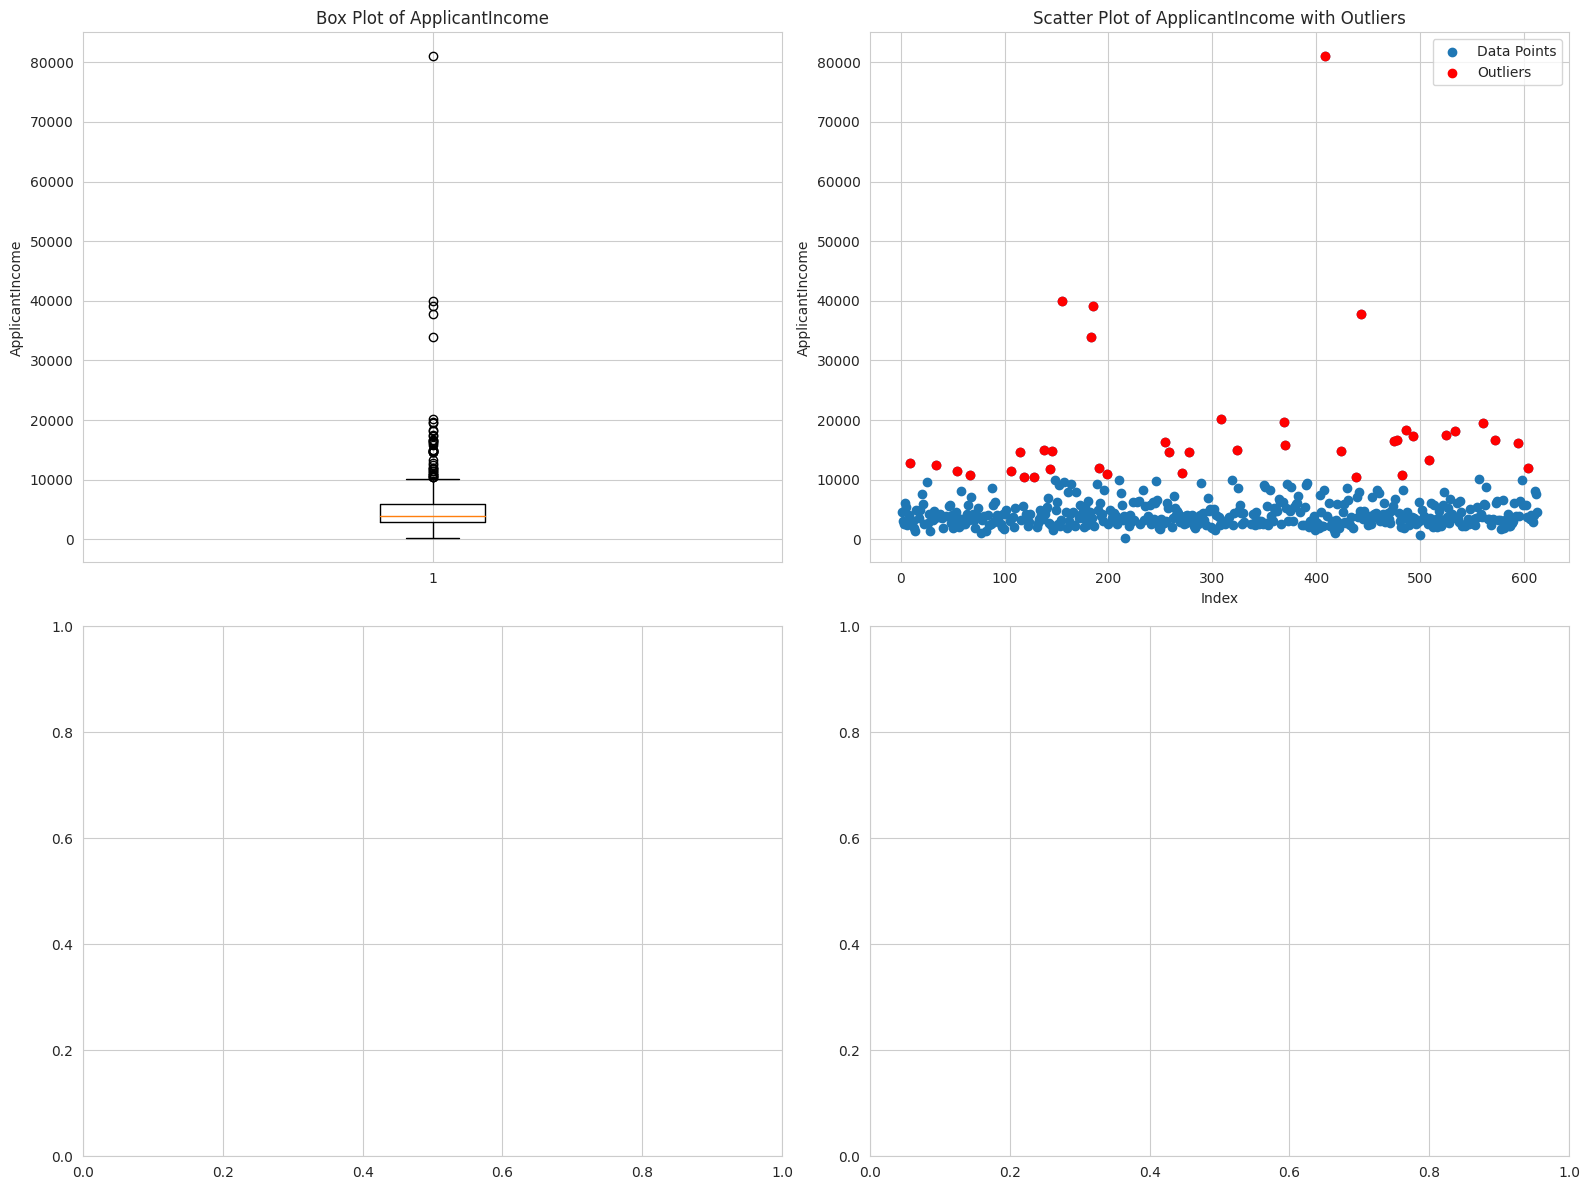

In [ ]:
def outliers(numerical_data, features):
  Q1 = numerical_data[features].quantile(0.25)
  Q3 = numerical_data[features].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound= Q1 - 1.5 * IQR
  upper_bound= Q3 - 1.5 * IQR


  ls = numerical_data.index[(numerical_data[features]< lower_bound) | (numerical_data[features]> lower_bound)]
  return ls


# create empty list to store output indices
index_list = []
for feature in ["ApplicantIncome"]:
  index_list.extend(outliers(numerical_data, feature))


#Column of interest
column = 'ApplicantIncome'

# Compute IQR for identifying outliers
Q1 = data[column].quantile(0.25)
Q3 = data[column].quantile(0.75)
IQR = Q3 - Q1
outliers = numerical_data[(numerical_data[column] < (Q1 - 1.5 * IQR)) | (numerical_data[column] > (Q3 + 1.5 * IQR))]

# Set up the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12), tight_layout=True)

# Box Plot
axes[0, 0].boxplot(numerical_data[column])
axes[0, 0].set_title(f'Box Plot of {column}')
axes[0, 0].set_ylabel(column)
axes[0, 0].grid(True)

# Scatter Plot with Outliers Highlighted
axes[0, 1].scatter(numerical_data.index, numerical_data[column], label='Data Points')
axes[0, 1].scatter(outliers.index, outliers[column], color='red', label='Outliers')
axes[0, 1].set_title(f'Scatter Plot of {column} with Outliers')
axes[0, 1].set_xlabel('Index')
axes[0, 1].set_ylabel(column)
axes[0, 1].legend()
axes[0, 1].grid(True)

####**Approval rates**

In [ ]:


# Calculate approval rates by Income_Category
approval_counts = data2.groupby('Income_Category')['Loan_Status'].value_counts().unstack().fillna(0)
approval_counts['Approval_Rate'] = approval_counts['Y'] / (approval_counts['Y'] + approval_counts['N'])

print(approval_counts)


Loan_Status       N   Y  Approval_Rate
Income_Category                       
Low              38  82       0.683333
Medium           35  84       0.705882
High             35  86       0.710744
Extreme          40  80       0.666667


<ipython-input-89-bbc1fb8a5ab1>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  approval_counts = data2.groupby('Income_Category')['Loan_Status'].value_counts().unstack().fillna(0)


#### **Removal of outliers**


**Method:**




* **Impute with high_df mean:**  Impute  extreme values under extreme df esp with statistics after 75% quartile such that all points/outliers  will be removed in applicant income.

#### **Conclusion on outliers:**
1. we see outliers or extreme values are under extreme caregory(i kept as > q3).
2. They have some very high values that noved the mean and may be effected the mean of not approved across high income.


#### **Handling Outliers:**
Depending upon dataset outliers handled in diff way

a) we can apply drop : iqr, z scores(limitation: assumes normal distr of dataset)

b) cap them: replace extreme values with neaest sensible values with reasonable range. define a min/max and assign value to outlier

c) impute by median mean

d) scale/ Transformation: normalisation, log transformation
e) ensemble method


##### **Testing impute 1 : high df mean: 8645.0**

In [ ]:
## imputing or replacing outliers with high df mean
# in extreme_df :75%	:11817.750000
## 50%	8645.0
outliers = data2[data2["ApplicantIncome"] >= 8645.0]
outliers.shape # 30 rows

## 30 rows needs to be imputed
high_df_mean = int(high_df["ApplicantIncome"].mean())  # 4682.785123966943

## replacing values in outliers with this mean

# Step 3: Replace the ApplicantIncome of the identified outliers with the mean of "High" category .loc(row cond,column)
data2.loc[data2["ApplicantIncome"] >= 8645, "ApplicantIncome"] = high_df_mean


#####**box plot for confiration with this range of imputation: 8645**:


#####**with this imputation, still ouliers remain in data2 applicant income. so made the range to 5000  seeing scatter plot dots.**

###**Impute 2: Final Removal of Outliers with mean :5000.0**

In [16]:
# Step 1: Identify outliers (greater than or equal to 5000.0)
outliers = data2[data2["ApplicantIncome"] >= 5000.0]
print("Number of outliers identified:", outliers.shape[0])  # Check how many rows are outliers

# Step 2: Calculate the mean of the high income category
high_df_mean = int(high_df["ApplicantIncome"].mean())

# Step 3: Replace outliers with the mean of the high income category
data2.loc[data2["ApplicantIncome"] >= 5000.0, "ApplicantIncome"] = high_df_mean

# Display the updated DataFrame to check the changes
print(data2[['ApplicantIncome']].sort_values(by='ApplicantIncome', ascending=False))


Number of outliers identified: 156
     ApplicantIncome
15              4950
201             4923
326             4917
134             4895
18              4887
..               ...
14              1299
418             1025
77              1000
500              645
216              150

[480 rows x 1 columns]


#### **Impute3: Robust scaling for outliers**:
Details:
Both standard and robust scalers transform inputs to comparable scales. The difference lies in how they scale raw input values.

Standard scaling uses mean and standard deviation. Robust scaling uses median and interquartile range (IQR) instead.

Robust scaling answers a simple question. How far is each data point from the input’s median? More precisely, it measures this distance in terms of the IQR

when outliers are present, the standard scaler produces a distorted view of the original distribution.

Robust scaler doesn’t suffer from this defect. It resists the pull of outliers. Its scaled values have enough range so that the distance between outliers and other values remains largely intact.


**Conclusion**

Outliers can significantly affect statistics such as mean and standard deviation. Therefore, you may want to avoid using the standard scaling when the input has outliers.

We should use robust scaling instead. It uses median and interquartile range (IQR) to scale input values. Both of these statistics are resistant to outliers. That’s why robust scaling is immune to the adverse influence of outliers.

In [ ]:
### case1:using this method robust scaling on all numerical columns.
### case2: only on that column with outliiers

from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()

# calculate median and IQR
robust_scaler.fit(data_df)

# scale all data points using median and IQR
robust_scaled_data = robust_scaler.transform(data_df)

###**scatter plot for applicant, credit , loan status**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


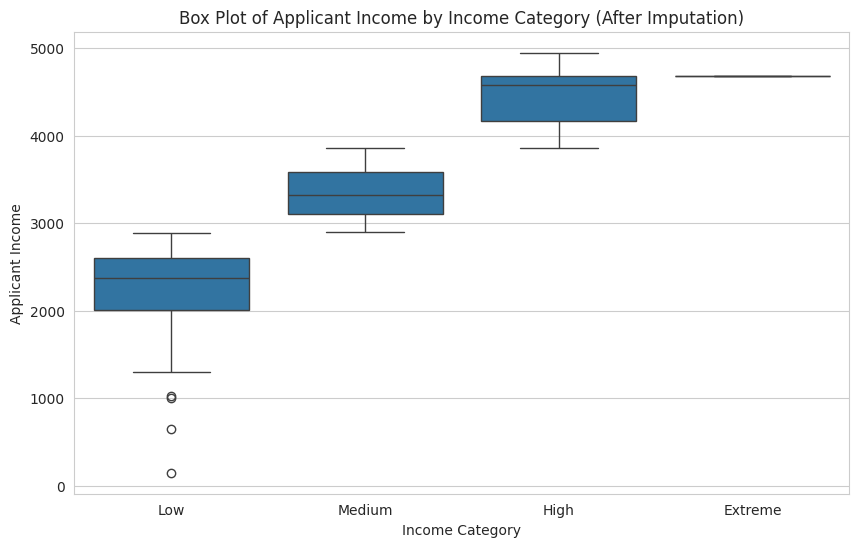

In [ ]:
# Create a box plot to check for outliers in the ApplicantIncome column
plt.figure(figsize=(10, 6))
sns.boxplot(x='Income_Category', y='ApplicantIncome', data=data2)

# Add title and labels
plt.title('Box Plot of Applicant Income by Income Category (After Imputation)')
plt.xlabel('Income Category')
plt.ylabel('Applicant Income')

# Show the plot
plt.show()

#### **Conclusion**
1. first, this is box plot of applicant income across income categories we made.
2. So, since extreme had lot of extreme values, so may be imputing with high df mean made the range of box plot above very small.

3. in this case, So in case of right skewed, its better to use capping, transformation rather than imputing. -->

4. this shows even though outliers are not there but extreme has lower variability and too much less variability is not good as it could get bias.


In [ ]:
# Create a box plot to check for outliers in the ApplicantIncome column only .
plt.figure(figsize=(10, 6))
sns.boxplot( x='ApplicantIncome',data=data2)


In [ ]:
# Create a box plot to check for outliers in the ApplicantIncome column
plt.figure(figsize=(10, 6))
sns.boxplot(x='Credit_History', y='ApplicantIncome', data=data2)

# Add title and labels
plt.title('Box Plot of Applicant Income by Income Category (After Imputation)')
plt.xlabel('credit history')
plt.ylabel('Applicant Income')

# Show the plot
plt.show()

In [ ]:
# Cross tabulation for Income_Category, Credit_History, and Loan_Status
cross_tab = pd.crosstab(
    [data2['Income_Category'], data2['Credit_History']],  # Row: Income_Category and Credit_History
    data2['Loan_Status'],  # Column: Loan_Status
    margins=True  # Add row/column totals
)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for ApplicantIncome alone
plt.figure(figsize=(10, 6))
sns.boxplot(y='ApplicantIncome', data=data2)
plt.title('Box Plot of Applicant Income (Alone)')
plt.ylabel('Applicant Income')
plt.show()

# Box plot for ApplicantIncome grouped by Credit_History
plt.figure(figsize=(10, 6))
sns.boxplot(x='Credit_History', y='ApplicantIncome', data=data2)
plt.title('Box Plot of Applicant Income by Credit History')
plt.xlabel('Credit History')
plt.ylabel('Applicant Income')
plt.show()

# Box plot for ApplicantIncome grouped by Loan_Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=data2)
plt.title('Box Plot of Applicant Income by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Applicant Income')
plt.show()



In [ ]:
# Calculate IQR for full ApplicantIncome column
Q1_full = data2['ApplicantIncome'].quantile(0.25)
Q3_full = data2['ApplicantIncome'].quantile(0.75)
IQR_full = Q3_full - Q1_full

# Calculate outlier bounds for the full data
lower_bound_full = Q1_full - 1.5 * IQR_full
upper_bound_full = Q3_full + 1.5 * IQR_full

# Identify outliers in the full dataset
full_outliers = data2[(data2['ApplicantIncome'] < lower_bound_full) | (data2['ApplicantIncome'] > upper_bound_full)]
print("Outliers in full dataset:", full_outliers)


####**Final conclusion on loanstatus, applicant income and credit history analysis:**

In [ ]:
### lets first see the count: with outliers
#Differences in means or medians across categories can indicate a relationship
data.groupby('Loan_Status')['ApplicantIncome'].mean()

#without outliners(data2 after reoving outliers)
data2.groupby('Loan_Status')['ApplicantIncome'].mean() # hence now yes has relatively high income mean.

,ApplicantIncome
Loan_Status,
N,3671.364865
Y,3689.909639


#### **Conclusion:**


*   Due to presence of outliers, credit history showed more "no" for applicants with good credit history(ie 1.0) which is unusual.

*   After removal of outliers, there are more applicants with good credit as yes(1) for loan approval



###### **More better values could have been done to make the result look better.**

####**Conclusion:**
**data2**: no outliers and income category

**data**: has outlier and no income category col

####**Hypothesis testing 2:**

#### **Statistical Test: T-Test**(categorical and numerical)
**compare the means of ApplicantIncome between the two categories of Loan_Status, you can use a T-test.**

**Null Hypothesis:** There is no significant difference in applicant income between the two loan status groups.

**Alternative Hypothesis**: There is a significant difference in applicant income between the two loan status groups.

In [ ]:
import pandas as pd
from scipy import stats



# Split the data into two groups based on loan status
income_approved = data[data['Loan_Status'] == 'Y']['ApplicantIncome']
income_not_approved = data[data['Loan_Status'] == 'N']['ApplicantIncome']

# Perform the T-test
t_statistic, p_value = stats.ttest_ind(income_approved, income_not_approved)

# Display results
print("T-Test Results:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: There is a significant difference in applicant income based on loan status.")
else:
    print("\nFail to reject the null hypothesis: There is no significant difference in applicant income based on loan status.")


T-Test Results:
T-statistic: -0.9443118179785976
P-value: 0.34548738715837346

Fail to reject the null hypothesis: There is no significant difference in applicant income based on loan status.


#### **Conclusion:**


*  Fail to reject the null hypothesis: **There is no significant difference in applicant income based on loan status.**.



####**Hypothesis3:**
1. **Null Hypothesis:** There is no significant difference in Loan amount between the two loan status groups.

2. **Alternative Hypothesis:** There is a significant difference in Loan Amount between the two loan status groups.

In [ ]:
data.columns

In [ ]:
import pandas as pd
from scipy import stats



# Split the data into two groups based on loan status
income_approved = data[data['Loan_Status'] == 'Y']['LoanAmount']
income_not_approved = data[data['Loan_Status'] == 'N']['LoanAmount']

# Perform the T-test
t_statistic, p_value = stats.ttest_ind(income_approved, income_not_approved)

# Display results
print("T-Test Results:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: There is a significant difference in applicant income based on loan Amount.")
else:
    print("\nFail to reject the null hypothesis: There is no significant difference in applicant income based on loan Amount.")


T-Test Results:
T-statistic: -1.5727950958103765
P-value: 0.11642791040850191

Fail to reject the null hypothesis: There is no significant difference in applicant income based on loan Amount.


<Figure size 400x400 with 0 Axes>

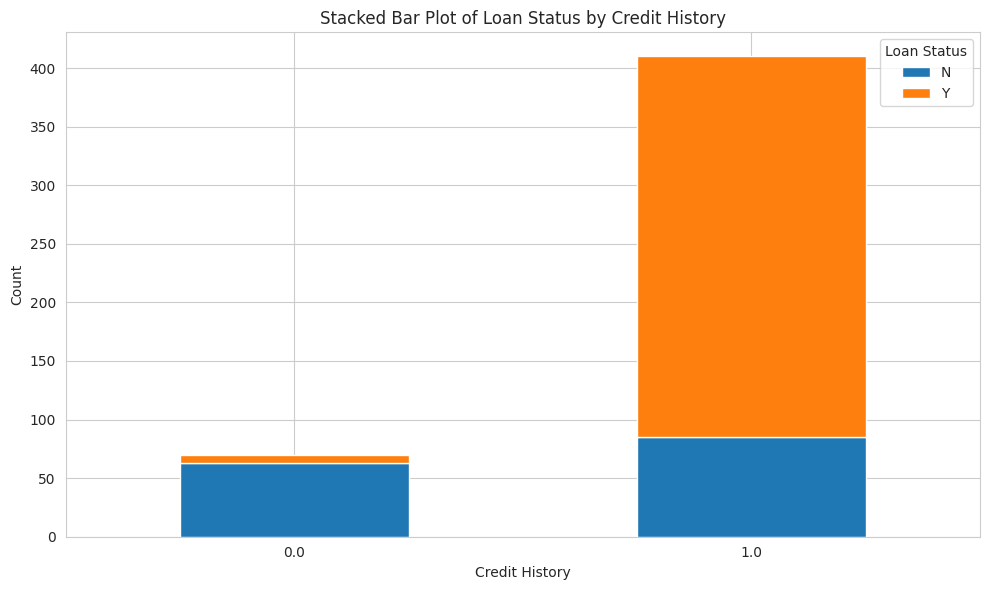

In [ ]:
cross_tab = pd.crosstab(data.Credit_History, data.Loan_Status)
plt.figure(figsize=(4, 4))
cross_tab.plot(kind='bar', stacked= True, figsize=(10, 6))
plt.title('Stacked Bar Plot of Loan Status by Credit History')
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


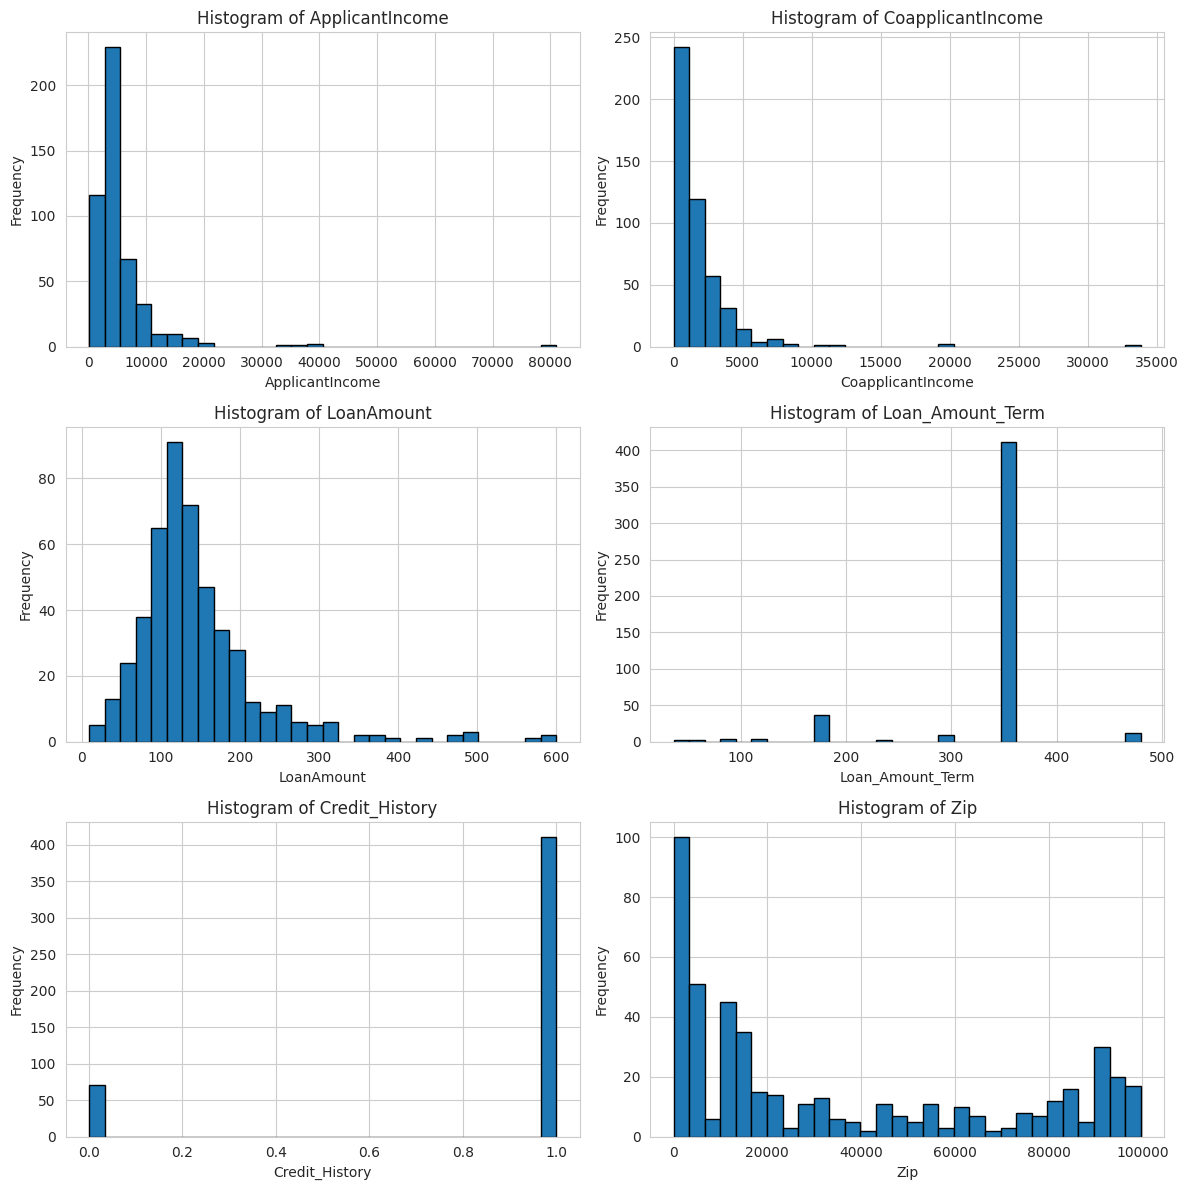

In [ ]:
# Identify numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Set up the figure and axes
num_vars = len(numerical_columns)
fig, axes = plt.subplots(nrows=(num_vars + 1) // 2, ncols=2, figsize=(12, num_vars * 4 // 2), tight_layout=True)

# Flatten the axes array for easy iteration if there are more than 1 row
axes = axes.flatten()

# Plot histograms for each numerical column
for idx, column in enumerate(numerical_columns):
    axes[idx].hist(data[column], bins=30, edgecolor='black')
    axes[idx].set_xlabel(column)  # Set x-axis label to the name of the variable
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_title(f'Histogram of {column}')
    axes[idx].grid(True)

# Hide any unused subplots
for idx in range(len(numerical_columns), len(axes)):
    axes[idx].axis('off')

plt.show()

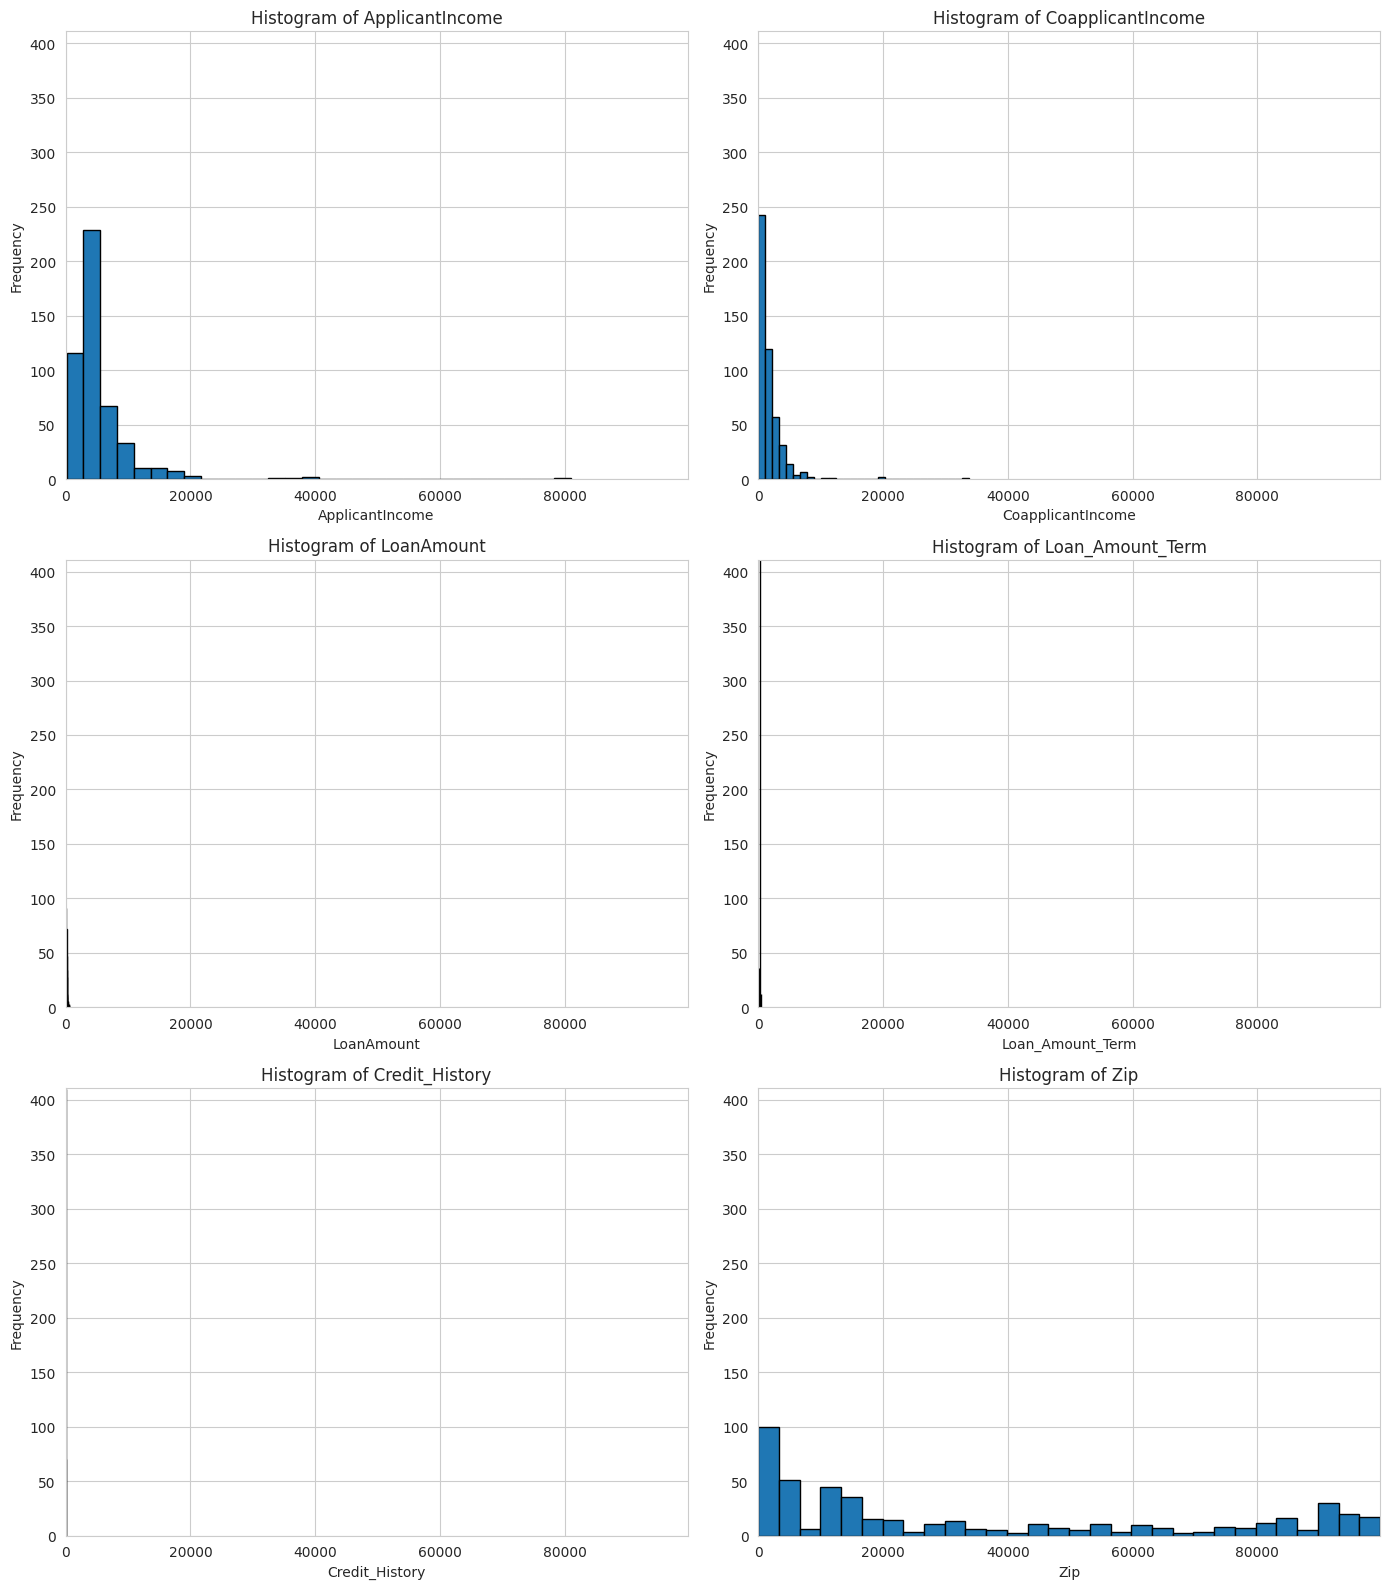

In [ ]:
# Identify numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Calculate global x-axis limits and y-axis limits for numerical columns
x_min = min(data[col].min() for col in numerical_columns)
x_max = max(data[col].max() for col in numerical_columns)
y_max = max(data[col].value_counts(bins=30).max() for col in numerical_columns)

# Set up the figure and axes
num_vars = len(numerical_columns)
fig, axes = plt.subplots(nrows=(num_vars + 1) // 2, ncols=2, figsize=(14, (num_vars // 2 + 1) * 4), tight_layout=True)

# Flatten the axes array for easy iteration if there are more than 1 row
axes = axes.flatten()

# Plot histograms for each numerical column
for idx, column in enumerate(numerical_columns):
    axes[idx].hist(data[column], bins=30, edgecolor='black')
    axes[idx].set_xlabel(column)  # Set x-axis label to the name of the variable
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_title(f'Histogram of {column}')
    axes[idx].set_xlim(x_min, x_max)  # Set x-axis limits
    axes[idx].set_ylim(0, y_max)  # Set y-axis limits
    axes[idx].grid(True)

# Hide any unused subplots
for idx in range(len(numerical_columns), len(axes)):
    axes[idx].axis('off')

plt.show()

####

In [ ]:
import pandas as pd
from scipy.stats import median_abs_deviation

# Calculate Modified Z-Score
data['Modified_Z-Score'] = 0.6745 * (data['ApplicantIncome'] - data['ApplicantIncome'].median()) / median_abs_deviation(data['ApplicantIncome'])

# Identify global outliers
global_outliers_modified = data[abs(data['Modified_Z-Score']) > 3.5]

#print("Global Outliers based on Modified Z-Score:")
#print(global_outliers_modified)


plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(data.index, data['ApplicantIncome'], color='blue', label='Data Points')
plt.scatter(global_outliers_modified.index, global_outliers_modified['ApplicantIncome'], color='red', label='Global Outliers', s=100)

plt.title('Scatter Plot of Applicant Income')
plt.xlabel('Index')
plt.ylabel('Applicant Income')
plt.axhline(y=data['ApplicantIncome'].median(), color='g', linestyle='--', label='Median')
plt.axhline(y=data['ApplicantIncome'].mean(), color='orange', linestyle='--', label='Mean')
plt.legend()
plt.show()



#### **Selecting important 14 variables and Creating Final Dataframe for modelling**
1. Remove Loan_ID", "State", "Income_Category", "LoanAmount", "Zip as not considering for model.
2. Will use features dataframe for transformation of categorical into numerical.
3. For now, in order to convert categorical to numerical using dummy,

####**Features considering to use for models:**
1. Gender
2. Married
3. Dependents
4. Education
5. Self_Employed
6. Applicant Income(not effect loan status) and not considering loanamount as due to multicollinearity and provide same info to some extent.
7. credit history(imp feature)




#### **Target:**
1. Loan status: Y or N


In [27]:
## featuresd df is created such that it contains only those col that are required for analysis and also contain loan status(target col_)

#
features_df = data2.drop(["Loan_ID", "State", "Income_Category", "LoanAmount", "Zip"], axis = 1)
features_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,4682,0.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,4682,4196.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,4682,240.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,4682,0.0,360.0,1.0,Urban,Y


In [ ]:
features_df.columns
### lets see the count of loan statau


Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term',
       'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [28]:
target = data2["Loan_Status"]
target

,Loan_Status
1,N
2,Y
3,Y
4,Y
5,Y
...,...
609,Y
610,Y
611,Y
612,Y


#### **Creating categorical and numerical columns**

In [29]:
# Catagorical col will be created out of features_df such that all categorical col get converted to numerical

categorical_columns = features_df.select_dtypes(include=['object']).columns
list(categorical_columns)

numerical_columns = features_df.select_dtypes(include=['int', 'float']).columns
list(numerical_columns)

['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term', 'Credit_History']

####**Before splitting data into train and test,check  "Data imbalance"**:


*  Since data imbalance can  effect model accuracy.

*  Sometimes even the accuracy is high, but confusion matrix shows high number of type1 and type2 error(FP, FN) which means  model predicted it wrong and so we say variance increases.

*  You get biased results.




####**Check Imbalance**

In [26]:
### lets see the count of loan statau
data2["Loan_Status"].value_counts()
# Calculate the proportion of each value in Loan_Status_Y
loan_status_proportion = data2["Loan_Status"].value_counts(normalize=True) * 100
print(loan_status_proportion)

Loan_Status
Y    69.166667
N    30.833333
Name: proportion, dtype: float64


#### **Conclusion on Imbalance**:




*   In imbalanced datasets, models tend to perform well for the majority class because there is more data available for that class. However, they might struggle with the minority class due to the lack of sufficient data. This can result in a model that is good at predicting loans that will be approved but performs poorly in identifying loans that should be rejected.

*   Here, approved loan(1) has majority then not approved loan(0), model might get biased and predict mostly non approved as appproved, which somtines gives good accuracy but in confusion  matrix, false posiive and negative effected.
*   Approved loans (1) are the majority, the model is more likely to predict 1 (approved) even when the actual label is 0 (not approved). This leads to an increase in false positives (Type 1 error) because
A false positive happens when the model predicts 1 (approved), but the actual class is 0 (not approved).


*  False positive( predicted positive(1) but actual 0)







#### **Techniques to overcome Imbalance**
** consider techniques like:**

1. **Cross-Validation:**
In cross-validation, the dataset is split into multiple subsets (folds), and the model is trained on different combinations of the data.
Stratified K-Fold Cross-Validation ensures that the proportion of each class is maintained in every fold, which helps provide a more balanced evaluation.This technique prevents overfitting to the majority class by ensuring the model performs well on unseen data.
2. **Oversampling** the minority class.
2. **Undersampling** the majority class.
3. Using algorithms that are robust to imbalance (like Random Forest or XGBoost).
4. **Hypertuning Methods**: Adjusting class weights, nestimators, during model training.




#### **Steps Before Transformation:**
*   Check that  important features selected which are  considered important by analysis on  raw data.

*   Seperate independent(features)  and dependent(test data).

*  **CAUTION:** Apply train test split first then transform (esp wen you are using pipeline and fit_transform, trnsform.


*  You can proceed  without train test split, wen you are using hot encoding using dummy not pipeline. you can apply on whole dataset encoding method.


Without Pipeline (Whole Dataset Encoding)

*   Without Pipeline (Whole Dataset Encoding)
1. Feature Selection: Select important features.
Separate Variables: Split into independent (features) and dependent (target).
2. Encoding: Apply one-hot encoding to the entire dataset.
Pros:
3. Simplicity: Easier to implement for small datasets.

* Cons:
1. Risk of Data Leakage: Using the entire dataset for encoding can lead to leakage into the test set.
2. Less flexible for scaling or other preprocessing steps.



* With Pipeline (Training/Test Split)
1. Feature Selection: Select important features.
2. Separate Variables: Split into independent (features) and dependent (target).
3. Train-Test Split: Divide data into training and test sets.
4. Encoding: Use ColumnTransformer and Pipeline for one-hot encoding and other preprocessing.

* Pros:
1. Avoids Data Leakage: Encodes only training data and applies the same transformation to the test set.
2. Modular and Flexible: Easily integrate additional preprocessing steps (e.g., scaling, imputation).

* Cons:

1. Slightly More Complex: Requires understanding of pipelines and transformers.


Summary
Whole Dataset Encoding is simpler but risks data leakage.
Pipeline Method is more robust and flexible, ensuring proper handling of transformations without leakage.















####**Transformation:**

####**Feature Transformation :**

Process:

1. Tranformation is done seperately on categorical and numerical columns.

2. Different algorithms like one category as linear regression algo requires gradient descent which means it searches for that point / weight that converges toards global minima to minimize loss. Similarly, other algo as decision tree, random forestDecision tree, Clustering requires Euclean Distance.

3. In algorithms that use gradient descent, converging at a point gets easier if data is transormed to same units, otherwise it takes time to converge towards fglobal minima.

4. In decision tree and all where we require eucleadean concepts , there also we require transformation

4. Deep Learning Techniques(Standarization, Scaling) 1. ANN -->Global Minima, gradient descent


Type of Transformation:

*   Normalisation and Standarization
*   scaling to min and max values



*   Scaling to Median and Quantiles




*  Square Rooot Trabsformation
*  Exponential Transformation


*   Guassian Transformation

*   Logarthmic Transformation
*   Reciprocal Transformation
*  Box Cox Transformation

NOTE: For train x : use fit_transform(when using pipeline)
      For test/ target col : transform(when using pipeline)









#### **One Hot Encoding: Converting catagorical to numerical**

###**Tansformation**:



*    Catagorical columns converted to numerical using hot encoding.


*   Applying dummy var to whole data set


####**Case1: Contains 14 variable for model training**















In [30]:
## one hot encoding using dumy variable on whole categorical dataset


dat = pd.get_dummies(features_df,list(categorical_columns),drop_first=True)


 #Convert boolean columns to integer
bool_cols = dat.select_dtypes(include=['bool']).columns
dat[bool_cols] = dat[bool_cols].astype(int)
dat

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
1,4583,1508.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,4682,0.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
5,4682,4196.0,360.0,1.0,1,1,0,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,360.0,1.0,0,0,0,0,0,0,0,0,0,1
610,4106,0.0,180.0,1.0,1,1,0,0,1,0,0,0,0,1
611,4682,240.0,360.0,1.0,1,1,1,0,0,0,0,0,1,1
612,4682,0.0,360.0,1.0,1,1,0,1,0,0,0,0,1,1


####**creating new features and target from new encoded dataframe**

In [31]:
### independent and dependent
features_new = dat.drop(["Loan_Status_Y"], axis = 1)

target_new = dat[["Loan_Status_Y"]]



target = dat[["Loan_Status_Y"]]
target_change = target.values.flatten()
target_change

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,

##### **Label encoding will ne more better than this one**

#### **Train test split**


In [46]:
X_train, X_test, y_train, y_test = train_test_split(features_new, target_change, train_size=0.7)

In [47]:
X_train, X_test, y_train, y_test

(     ApplicantIncome  CoapplicantIncome  Loan_Amount_Term  Credit_History  \
 384             4566                0.0             360.0             1.0   
 474             4682             4648.0             360.0             1.0   
 209             3418                0.0             360.0             1.0   
 509             4682                0.0             360.0             1.0   
 471             2653             1500.0             180.0             0.0   
 ..               ...                ...               ...             ...   
 362             4750             2333.0             360.0             1.0   
 21              4682             5625.0             360.0             1.0   
 582             3166                0.0             360.0             1.0   
 207             3975             2531.0             360.0             1.0   
 399             1500             1800.0             360.0             0.0   
 
      Gender_Male  Married_Yes  Dependents_1  Dependents_2  De

####**More Steps to Feature engineering:**


* Feature Transforming
* Feature encoding categorical

* Feature selection





#### **Conclusion**



*   X_train and y_train is used in training and predicting train model output.


* X_test and y_test for predicting the testing model accuracyand work.




#### **Methods to remove Imbalance**:

**1. Method1: Using Cross validation**

####**Model training, Evaluation, optimisation**

#### **Basic Model**

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle



# Define the classification models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Random Forest": RandomForestClassifier(random_state=random_state),
    "Decision Tree": DecisionTreeClassifier(random_state=random_state)
}

def evaluate_models(X_train, y_train, X_test, y_test, models):
    model_report = []

    for model_name, model in models.items():
        model.fit(X_train, y_train)  # Fit the model
        y_pred = model.predict(X_test)  # Make predictions

        # Calculate accuracy score
        acc = accuracy_score(y_test, y_pred)

        # Generate classification report as a dictionary
        report_dict = classification_report(y_test, y_pred, output_dict=True)

        # Store results in the report
        model_report.append({
            'Model': model_name,
            'Accuracy': acc,
            'Precision': report_dict['weighted avg']['precision'],
            'Recall': report_dict['weighted avg']['recall'],
            'F1-Score': report_dict['weighted avg']['f1-score'],
            'Support': report_dict['weighted avg']['support'],
            'False Positives': sum((y_test == 0) & (y_pred == 1)),
            'False Negatives': sum((y_test == 1) & (y_pred == 0))
        })

        # Save the model to disk as a pickle file
        with open(f'{model_name.replace(" ", "_")}.pkl', 'wb') as file:
            pickle.dump(model, file)

    # Convert report to DataFrame
    report_df = pd.DataFrame(model_report)

    return report_df

# Evaluate the models
model_report_df = evaluate_models(X_train, y_train, X_test, y_test, models)

# Print the DataFrame
print("Model Report:")
print(model_report_df)

# Save the report to a CSV file
model_report_df.to_csv('classification_report_basic_models.csv', index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Report:
                 Model  Accuracy  Precision    Recall  F1-Score  Support  \
0  Logistic Regression  0.805556   0.848090  0.805556  0.772125    144.0   
1        Random Forest  0.791667   0.791667  0.791667  0.770499    144.0   
2        Decision Tree  0.729167   0.721306  0.729167  0.724312    144.0   

   False Positives  False Negatives  
0               28                0  
1               25                5  
2               22               17  


In [36]:
print("basic model report", model_report_df)

basic model report                  Model  Accuracy  Precision    Recall  F1-Score  Support  \
0  Logistic Regression  0.805556   0.848090  0.805556  0.772125    144.0   
1        Random Forest  0.791667   0.791667  0.791667  0.770499    144.0   
2        Decision Tree  0.729167   0.721306  0.729167  0.724312    144.0   

   False Positives  False Negatives  
0               28                0  
1               25                5  
2               22               17  


####**Basic Model Report:**

> Add blockquote




*  We observe that Logistic Regression achieved the highest accuracy among all models. However, due to the imbalanced nature of the dataset, we note a significant number of false positives(28) for class 0 (not approved). This indicates that the model is not performing well in predicting loans that should be denied, which could lead to an increase in defaulters. Specifically, a high number of false positives means that the model is incorrectly classifying applicants who are ineligible for loan approval as approved (1).

*  False Negatives are notably low, as the model tends to predict the majority of instances as 1 (approved). This is a direct consequence of the data imbalance.

*  The high false positive rate negatively impacts the recall for class 0, which reflects the model's ability to correctly identify actual not-approved loans. The low recall indicates that the model is failing to capture a substantial portion of applicants who should not be approved for loans.

*  In a loan approval scenario:

1. High False Positives: This could lead to financial losses for the lending institution if loans are granted to individuals who may default on repayment.
2. High False Negatives: Conversely, this could result in missed business opportunities, where qualified applicants are unjustly denied loans.
*   Balancing the Trade-offs **bold text**
4. Given the implications of these results, we will focus on reducing false positives to improve the model's predictive performance, particularly in correctly identifying applicants who should not be approved for loans.

**Note: In our case, I will be concerntrating more on false positive as its more important in our case.**



#### **Method1: Using Cross Validation**

In [37]:
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle

# Assuming X and y are your features and target variable respectively
# X = features
# y = target
random_state = 25

# Define the classification models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Random Forest": RandomForestClassifier(random_state=random_state),
    "Decision Tree": DecisionTreeClassifier(random_state=random_state),
    "Gradient Boosting": GradientBoostingClassifier(random_state=random_state)
}

# Define hyperparameters for each model
params = {
    "Logistic Regression": {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l2']
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30]
    },
    "Decision Tree": {
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    "Gradient Boosting": {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7]
    }
}

def evaluate_models(X_train, y_train, X_test, y_test, models, params):
    model_report = []

    for model_name, model in models.items():
        model_params = params[model_name]

        # Perform GridSearchCV
        grid_search = GridSearchCV(model, model_params, cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)

        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)

        # Calculate accuracy score
        acc = accuracy_score(y_test, y_pred)

        # Generate classification report as a dictionary
        report_dict = classification_report(y_test, y_pred, output_dict=True)

        # Store results in the report
        model_report.append({
            'Model': model_name,
            'Best Params': grid_search.best_params_,
            'Accuracy': acc,
            'Precision': report_dict['weighted avg']['precision'],
            'Recall': report_dict['weighted avg']['recall'],
            'F1-Score': report_dict['weighted avg']['f1-score'],
            'Support': report_dict['weighted avg']['support'],
            'False Positives': sum((y_test == 0) & (y_pred == 1)),
            'False Negatives': sum((y_test == 1) & (y_pred == 0))
        })

        # Save the best model to disk as a pickle file
        with open(f'{model_name.replace(" ", "_")}.pkl', 'wb') as file:
            pickle.dump(best_model, file)

    # Convert report to DataFrame
    report_df = pd.DataFrame(model_report)

    return report_df

# Evaluate the models
CV_hypertuned_model_report_df = evaluate_models(X_train, y_train, X_test, y_test, models, params)

# Print the DataFrame
print("Model Report:")
print(CV_hypertuned_model_report_df)

# Save the report to a CSV file
CV_hypertuned_model_report_df.to_csv('classification_report_CV_HYPERTUNED14_var.csv', index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Report:
                 Model                                        Best Params  \
0  Logistic Regression                          {'C': 1, 'penalty': 'l2'}   
1        Random Forest             {'max_depth': 10, 'n_estimators': 100}   
2        Decision Tree           {'max_depth': 5, 'min_samples_split': 2}   
3    Gradient Boosting  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...   

   Accuracy  Precision    Recall  F1-Score  Support  False Positives  \
0  0.805556   0.848090  0.805556  0.772125    144.0               28   
1  0.791667   0.823568  0.791667  0.755848    144.0               29   
2  0.777778   0.812576  0.777778  0.734799    144.0               31   
3  0.770833   0.792377  0.770833  0.729023    144.0               31   

   False Negatives  
0                0  
1                1  
2                1  
3                2  


#### **CV_hypertuned_model_report:**



*   It seems model with 14 var trained with cv failed to reduce the effect of imbalance data resulting in same number of false positive.




#### **Method2: Using ROC  curve to adjust thresold and balance FP AND FN and incresaing recall**

#### **Models with 14 variables**

**ROC**

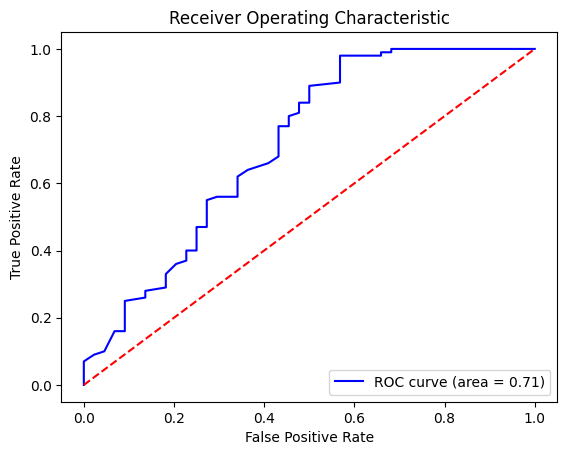

Optimal threshold based on Youden Index: 0.42
Accuracy with optimal threshold: 0.8125
Classification report with optimal threshold:
              precision    recall  f1-score   support

           0       0.90      0.43      0.58        44
           1       0.80      0.98      0.88       100

    accuracy                           0.81       144
   macro avg       0.85      0.71      0.73       144
weighted avg       0.83      0.81      0.79       144



In [39]:
# Train the Random Forest model(14 VAR)

from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report
model = RandomForestClassifier()
model.fit(X_train, y_train)




# Train the Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Get predicted probabilities for the positive class
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Determine the optimal threshold using Youden's J statistic
youden_index = tpr - fpr
optimal_idx = np.argmax(youden_index)
optimal_threshold = thresholds[optimal_idx]

print(f'Optimal threshold based on Youden Index: {optimal_threshold}')

# Make predictions based on the optimal threshold
y_pred_optimal = (y_prob >= optimal_threshold).astype(int)

# Evaluate the model with the optimal threshold
acc = accuracy_score(y_test, y_pred_optimal)
report = classification_report(y_test, y_pred_optimal)

print(f'Accuracy with optimal threshold: {acc}')
print('Classification report with optimal threshold:')
print(report)


####**Decreasing Thresold = 0.7**

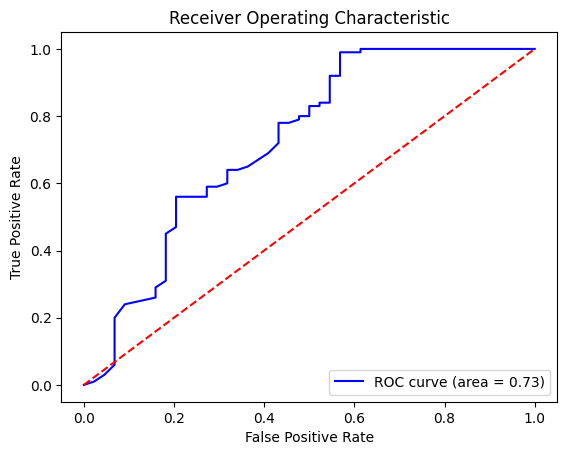

Optimal threshold based on Youden Index: 0.395
--- Results with Default Threshold (0.3) ---
Accuracy: 0.7083333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.55      0.53        44
           1       0.80      0.78      0.79       100

    accuracy                           0.71       144
   macro avg       0.66      0.66      0.66       144
weighted avg       0.71      0.71      0.71       144

--- Results with Optimal Threshold ---
Accuracy: 0.8194444444444444
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.43      0.59        44
           1       0.80      0.99      0.88       100

    accuracy                           0.82       144
   macro avg       0.87      0.71      0.74       144
weighted avg       0.84      0.82      0.80       144



In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assume 'dat' is your DataFrame containing all the features and target variable
# For example:
# dat = pd.read_csv('your_data.csv')
# Adjust according to your actual data



# Train the Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Get predicted probabilities for the positive class
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Determine the optimal threshold using Youden's J statistic
youden_index = tpr - fpr
optimal_idx = np.argmax(youden_index)
optimal_threshold = thresholds[optimal_idx]

print(f'Optimal threshold based on Youden Index: {optimal_threshold}')

# Make predictions based on the default threshold (0.5)
y_pred_default = (y_prob >= 0.7).astype(int)

# Make predictions based on the optimal threshold
y_pred_optimal = (y_prob >= optimal_threshold).astype(int)

# Evaluate the model with the default threshold
acc_default = accuracy_score(y_test, y_pred_default)
report_default = classification_report(y_test, y_pred_default)

# Evaluate the model with the optimal threshold
acc_optimal = accuracy_score(y_test, y_pred_optimal)
report_optimal = classification_report(y_test, y_pred_optimal)

# Print the results
print('--- Results with Default Threshold (0.3) ---')
print(f'Accuracy: {acc_default}')
print('Classification Report:')
print(report_default)

print('--- Results with Optimal Threshold ---')
print(f'Accuracy: {acc_optimal}')
print('Classification Report:')
print(report_optimal)


#### **Conclusion:**
1. Roc thresold change not working in increasing recall and balancing fp and fn or reducing false positive

#### **Method3: Hypertuning Methods**



####**Hypertuning Methods:**
Hyperparameter tuning is crucial for optimizing the performance of classification models. Here are some important hyperparameters for various popular classifiers:



* **Logistic Regression**
1. C: Inverse of regularization strength; smaller values specify stronger regularization.
2. penalty: Type of regularization ('l1', 'l2', or 'elasticnet').
3. solver: Algorithm to use for optimization ('liblinear', 'saga', etc.).


*  ** Decision Tree Classifier**
1. max_depth: Maximum depth of the tree; controls overfitting.
min_samples_split: Minimum number of samples required to split an internal node.
2. min_samples_leaf: Minimum number of samples required to be at a leaf node.
3. max_features: Number of features to consider when looking for the best split.
*   R**andom Forest Classifier**
1. n_estimators: Number of trees in the forest; more trees can improve performance but also increase computation time.
2. max_depth: Maximum depth of each tree.
3. min_samples_split: Minimum number of samples required to split an internal node.
4. min_samples_leaf: Minimum number of samples required to be at a leaf node.
5. max_features: Number of features to consider when looking for the best split.

*   **Support Vector Machine (SVM)**
1. C: Regularization parameter; smaller values encourage a larger margin (more regularization).
2. kernel: Type of kernel function to be used ('linear', 'rbf', etc.).
3. gamma: Kernel coefficient for 'rbf', 'poly', and 'sigmoid' kernels; controls the influence of a single training example.
*   List item


* **K-Nearest Neighbors (KNN)**
1. n_neighbors: Number of neighbors to use; affects model complexity.
2. weights: Function used in prediction ('uniform' or 'distance').

**Tuning Methods**
Grid Search: Exhaustively search through specified hyperparameter values.






In [43]:
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle

# Assuming X and y are your features and target variable respectively
# X = features
# y = target
random_state = 25

# Define the classification models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Random Forest": RandomForestClassifier(random_state=random_state),
    "Decision Tree": DecisionTreeClassifier(random_state=random_state),
    "Gradient Boosting": GradientBoostingClassifier(random_state=random_state)
}

# Define hyperparameters for each model
params = {
    "Logistic Regression": {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l2']
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30]
    },
    "Decision Tree": {
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    "Gradient Boosting": {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7]
    }
}

def evaluate_models(X_train, y_train, X_test, y_test, models, params):
    model_report = []

    for model_name, model in models.items():
        model_params = params[model_name]

        # Perform GridSearchCV
        grid_search = GridSearchCV(model, model_params, cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)

        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)

        # Calculate accuracy score
        acc = accuracy_score(y_test, y_pred)

        # Generate classification report as a dictionary
        report_dict = classification_report(y_test, y_pred, output_dict=True)

        # Store results in the report
        model_report.append({
            'Model': model_name,
            'Best Params': grid_search.best_params_,
            'Accuracy': acc,
            'Precision': report_dict['weighted avg']['precision'],
            'Recall': report_dict['weighted avg']['recall'],
            'F1-Score': report_dict['weighted avg']['f1-score'],
            'Support': report_dict['weighted avg']['support'],
            'False Positives': sum((y_test == 0) & (y_pred == 1)),
            'False Negatives': sum((y_test == 1) & (y_pred == 0))
        })

        # Save the best model to disk as a pickle file
        with open(f'{model_name.replace(" ", "_")}.pkl', 'wb') as file:
            pickle.dump(best_model, file)

    # Convert report to DataFrame
    report_df = pd.DataFrame(model_report)

    return report_df

# Evaluate the models
hypertuned_model_report_df = evaluate_models(X_train, y_train, X_test, y_test, models, params)

# Print the DataFrame
print("Model Report:")
print(hypertuned_model_report_df)

# Save the report to a CSV file
hypertuned_model_report_df.to_csv('classification_report_HYPERTUNED14_var.csv', index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Report:
                 Model                                        Best Params  \
0  Logistic Regression                          {'C': 1, 'penalty': 'l2'}   
1        Random Forest             {'max_depth': 10, 'n_estimators': 100}   
2        Decision Tree           {'max_depth': 5, 'min_samples_split': 2}   
3    Gradient Boosting  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...   

   Accuracy  Precision    Recall  F1-Score  Support  False Positives  \
0  0.805556   0.848090  0.805556  0.772125    144.0               28   
1  0.791667   0.823568  0.791667  0.755848    144.0               29   
2  0.777778   0.812576  0.777778  0.734799    144.0               31   
3  0.770833   0.792377  0.770833  0.729023    144.0               31   

   False Negatives  
0                0  
1                1  
2                1  
3                2  


#### **Conclusion on hypertuned model:**

1. We see that effect of imbalanced data effect is not getting reduced so far by using diff methods.

#### **Methods4:Adding class weights in Rf(14 var):**

In [48]:

# Define your models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(class_weight={0: 1, 1: 100}),
    #"SVM": SVC(class_weight={0: 1, 1: 100}, random_state=random_state, probability=True),
    #"Gradient Boosting": GradientBoostingClassifier(random_state=random_state),
    #"KNN": KNeighborsClassifier()
}

def evaluate_models(X_train, y_train, X_test, y_test, models):
    report = []
    best_model = None
    best_score = 0  # Initialize to track the best score

    for model_name, model in models.items():
        # Fit the model
        model.fit(X_train, y_train)

        # Save the model to disk as a pickle file
        with open(f'{model_name.replace(" ", "_")}.pkl', 'wb') as file:
            pickle.dump(model, file)

        # Make predictions
        y_test_pred = model.predict(X_test)

        # Calculate accuracy score
        acc = accuracy_score(y_test, y_test_pred)

        # Generate classification report as a dictionary
        report_dict = classification_report(y_test, y_test_pred, output_dict=True)

        # Store results in the report
        report.append({
            'Model': model_name,
            'Accuracy': acc,
            'Precision': report_dict['weighted avg']['precision'],
            'Recall': report_dict['weighted avg']['recall'],
            'F1-Score': report_dict['weighted avg']['f1-score'],
            'Support': report_dict['weighted avg']['support'],
            'False Positives': sum((y_test == 0) & (y_test_pred == 1)),
            'False Negatives': sum((y_test == 1) & (y_test_pred == 0))
        })

        # Check if this model is the best
        if acc > best_score:
            best_score = acc
            best_model = model

    # Convert report to DataFrame
    report_df = pd.DataFrame(report)

    return report_df, best_model

# Evaluate the models
model_report_df, best_model = evaluate_models(X_train, y_train, X_test, y_test, models)

# Print the results
print("Model Report:")
print(model_report_df)

print("\nBest Model:")
print(best_model)

Model Report:
                 Model  Accuracy  Precision    Recall  F1-Score  Support  \
0  Logistic Regression  0.833333   0.844086  0.833333  0.812865    144.0   
1        Random Forest  0.763889   0.757202  0.763889  0.759903    144.0   

   False Positives  False Negatives  
0               22                2  
1               19               15  

Best Model:
LogisticRegression()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### **Conclusion on adding class weights in rf**



*   Class weights helped in reducing false paositive from 28 to 19 and due to which fn is 15 with accuracy of 76 in rf.

*   We see logistic regression gave good accuracy of 83 but fp is 22.



####**Method5: Feature Selection using RF feature importance**

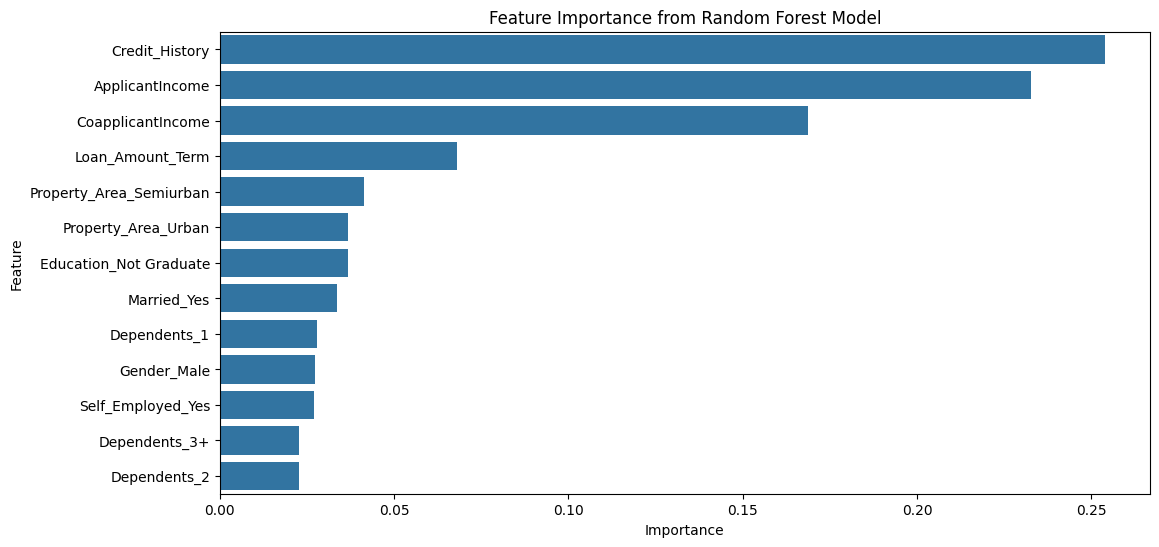

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Assume you have your data loaded into trainX and trainY
# Fit the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#### **Conclusion on Feature Selection**







*  Top 4 features will be condidered for model training instead of 14 variables taken earlier.


*  Will create new features and target from new datframe containg just these 4 variables.


*   Will conduct train test splitt


*   Model training


#### **Creating new features and df with 4 variables.**

In [53]:
# List of top 4 important features
top_features = [
    'Credit_History',
    'ApplicantIncome',
    'CoapplicantIncome',
    'Loan_Amount_Term'
]

# Creating a new DataFrame using transformed "dat" data frame with only the top 4 features
feature_new = dat[top_features]

# Display the new DataFrame
feature_new

### target df

target = dat[["Loan_Status_Y"]]
target_change = target.values.flatten()
target_change

feature_new.shape, target_change.shape

##### Train test splitt

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_new, target_change, train_size=0.7)

In [54]:
X_train, X_test, y_train, y_test

(     Credit_History  ApplicantIncome  CoapplicantIncome  Loan_Amount_Term
 612             1.0             4682                0.0             360.0
 122             0.0             2137             8980.0             360.0
 352             1.0             2666             2083.0             360.0
 559             1.0             4180             2306.0             360.0
 74              1.0             4682             1774.0             360.0
 ..              ...              ...                ...               ...
 521             1.0             2500                0.0             360.0
 483             1.0             4682                0.0             360.0
 394             1.0             3100             1400.0             360.0
 356             1.0             4682             3167.0             360.0
 369             1.0             4682             5266.0             360.0
 
 [336 rows x 4 columns],
      Credit_History  ApplicantIncome  CoapplicantIncome  Loan_Amount_Ter

#### **Model with class weight **

In [55]:

# Define your models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(class_weight={0: 1, 1: 100}),
    #"SVM": SVC(class_weight={0: 1, 1: 100}, random_state=random_state, probability=True),
    #"Gradient Boosting": GradientBoostingClassifier(random_state=random_state),
    #"KNN": KNeighborsClassifier()
}

def evaluate_models(X_train, y_train, X_test, y_test, models):
    report = []
    best_model = None
    best_score = 0  # Initialize to track the best score

    for model_name, model in models.items():
        # Fit the model
        model.fit(X_train, y_train)

        # Save the model to disk as a pickle file
        with open(f'{model_name.replace(" ", "_")}.pkl', 'wb') as file:
            pickle.dump(model, file)

        # Make predictions
        y_test_pred = model.predict(X_test)

        # Calculate accuracy score
        acc = accuracy_score(y_test, y_test_pred)

        # Generate classification report as a dictionary
        report_dict = classification_report(y_test, y_test_pred, output_dict=True)

        # Store results in the report
        report.append({
            'Model': model_name,
            'Accuracy': acc,
            'Precision': report_dict['weighted avg']['precision'],
            'Recall': report_dict['weighted avg']['recall'],
            'F1-Score': report_dict['weighted avg']['f1-score'],
            'Support': report_dict['weighted avg']['support'],
            'False Positives': sum((y_test == 0) & (y_test_pred == 1)),
            'False Negatives': sum((y_test == 1) & (y_test_pred == 0))
        })

        # Check if this model is the best
        if acc > best_score:
            best_score = acc
            best_model = model

    # Convert report to DataFrame
    report_df = pd.DataFrame(report)

    return report_df, best_model

# Evaluate the models
model_report_df, best_model = evaluate_models(X_train, y_train, X_test, y_test, models)

# Print the results
print("Model Report:")
print(model_report_df)

print("\nBest Model:")
print(best_model)

Model Report:
                 Model  Accuracy  Precision    Recall  F1-Score  Support  \
0  Logistic Regression  0.833333   0.855731  0.833333  0.814706    144.0   
1        Random Forest  0.812500   0.809611  0.812500  0.810666    144.0   

   False Positives  False Negatives  
0               23                1  
1               15               12  

Best Model:
LogisticRegression()


#### **Conclusion on new model with 4 var and class weights**

* As we see, random forest with class weight gretaly reduced false positive
(28 to 15), incresing recall to 83% from 43.

###########################**END**#####################################

In [44]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


# Define the classification models
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression()
}

# Define hyperparameters for each model
params = {
    "Logistic Regression": {
        'C': [0.001, 0.01, 0.1, 1, 10],  # Inverse of regularization strength
        'penalty': ['l2'],  # Type of regularization
        #'solver': ['liblinear', 'saga']  # Algorithms to use
    },
    "Decision Tree": {
        'max_depth': [None, 5, 10, 20],  # Maximum depth of the tree
        'min_samples_split': [2, 5, 10],  # Minimum samples required to split
        'min_samples_leaf': [1, 2, 4]  # Minimum samples required in a leaf node
    },
    "Random Forest": {
        'n_estimators': [10, 50, 100]  # Number of trees in the forest
    }
}

# Function to evaluate all models
def evaluate_models(X_train, y_train, X_test, y_test, models):
    model_report = []

    for model_name, model in models.items():
        model.fit(X_train, y_train)  # Fit the model
        y_pred = model.predict(X_test)  # Make predictions

        # Calculate accuracy score
        acc = accuracy_score(y_test, y_pred)

        # Generate classification report as a dictionary
        report = classification_report(y_test, y_pred, output_dict=True)

        # Extract relevant metrics and store them
        model_report.append({
            'Model': model_name,
            'Accuracy': acc,
            'Precision': report['weighted avg']['precision'],
            'Recall': report['weighted avg']['recall'],
            'F1-Score': report['weighted avg']['f1-score'],
            'Support': report['weighted avg']['support']
        })

    return pd.DataFrame(model_report)

# Evaluate the models
model_report_df = evaluate_models(X_train, y_train, X_test, y_test, models)

# Print the DataFrame
print(model_report_df)

# Optionally save the DataFrame to a CSV file
model_report_df.to_csv('classification_report.csv', index=False)

                 Model  Accuracy  Precision    Recall  F1-Score  Support
0        Random Forest  0.798611   0.803380  0.798611  0.776618    144.0
1        Decision Tree  0.708333   0.704715  0.708333  0.706386    144.0
2  Logistic Regression  0.805556   0.848090  0.805556  0.772125    144.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
model_report_df

,Model,Accuracy,Precision,Recall,F1-Score,Support
0,Random Forest,0.791667,0.791667,0.791667,0.770499,144.0
1,Decision Tree,0.701389,0.695878,0.701389,0.698326,144.0
2,Logistic Regression,0.805556,0.848090,0.805556,0.772125,144.0


In [ ]:
## AT RANDOM STATE = 42
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


# Define the classification models
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression()
}

# Define hyperparameters for each model
params = {
    "Logistic Regression": {
        'C':  10.0 **np.arange(-2,3),  # Inverse of regularization strength
        'penalty': ['l2'],  # Type of regularization
        #'solver': ['liblinear', 'saga']  # Algorithms to use
    },
    "Decision Tree": {
        'max_depth': [None, 5, 10, 20],  # Maximum depth of the tree
        #'min_samples_split': [2, 5, 10],  # Minimum samples required to split
        #'min_samples_leaf': [1, 2, 4]  # Minimum samples required in a leaf node
    },
    "Random Forest": {
        'n_estimators': [100]  # Number of trees in the forest
    }
}

# Function to evaluate all models
def evaluate_models(X_train, y_train, X_test, y_test, models):
    model_report = []

    for model_name, model in models.items():
        model.fit(X_train, y_train)  # Fit the model
        y_pred = model.predict(X_test)  # Make predictions

        # Calculate accuracy score
        acc = accuracy_score(y_test, y_pred)

        # Generate classification report as a dictionary
        report = classification_report(y_test, y_pred, output_dict=True)

        # Extract relevant metrics and store them
        model_report.append({
            'Model': model_name,
            'Accuracy': acc,
            'Precision': report['weighted avg']['precision'],
            'Recall': report['weighted avg']['recall'],
            'F1-Score': report['weighted avg']['f1-score'],
            'Support': report['weighted avg']['support'],
            'False Positives': sum((y_test == 0) & (y_pred == 1)),
            'False Negatives': sum((y_test == 1) & (y_pred == 0))

        })



    return pd.DataFrame(model_report)

# Evaluate the models
model_report_df = evaluate_models(X_train, y_train, X_test, y_test, models)

# Print the DataFrame
print(model_report_df)

# Optionally save the DataFrame to a CSV file
model_report_df.to_csv('classification_report.csv', index=False)

                 Model  Accuracy  Precision    Recall  F1-Score  Support  \
0        Random Forest  0.791667   0.791667  0.791667  0.770499    144.0   
1        Decision Tree  0.715278   0.710073  0.715278  0.712357    144.0   
2  Logistic Regression  0.805556   0.848090  0.805556  0.772125    144.0   

   False Positives  False Negatives  
0               25                5  
1               22               19  
2               28                0  


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### **Conclusion**
**By changing thresold = 0.5 by default in classiifctaion False positive value may decrease.**

**Why FP??**

False Positives (FP):
False Positives in this context occur when the model predicts a loan will be approved (1) when it actually should not be approved (0). This is critical because:
Impact: Approving loans that should not be granted can lead to financial losses and increased risk for the lending institution.


Methods that could work?

Recommendations for Prioritizing Recall for 0 (not approved):
Adjust Decision Threshold: To reduce false positives, consider adjusting the threshold for classifying an applicant as approved. Lowering the threshold can help minimize false positives but may also affect recall.

Cost-Sensitive Learning: Use techniques that penalize false positives more heavily during model training. This can help the model learn to avoid approving loans incorrectly.

Model Selection: Given the focus on reducing false positives, the Decision Tree appears to be the most favorable model based on your results, as it has the lowest number of false positives.

Feature Engineering: Investigate additional features that could help improve model accuracy and reduce false positives.

Ensemble Methods: Consider using ensemble methods that combine predictions from multiple models to improve overall performance and reduce error rates.


#### **Thresold change:**
**Using ROC Curve **

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Assuming your DataFrame is called 'dat' and the target variable is 'Loan_Status_Y'
# Replace 'dat' with your actual DataFrame and adjust feature selection accordingly

# Define your features and target
features = [
    'Credit_History',
    'ApplicantIncome',
    'CoapplicantIncome',
    'Loan_Amount_Term'
]

X = dat[features]  # Features
y = dat['Loan_Status_Y']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

# Train the Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Get predicted probabilities for the positive class
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Determine the optimal threshold using Youden's J statistic
youden_index = tpr - fpr
optimal_idx = np.argmax(youden_index)
optimal_threshold = thresholds[optimal_idx]

print(f'Optimal threshold based on Youden Index: {optimal_threshold}')

# Make predictions based on the optimal threshold
y_pred_optimal = (y_prob >= optimal_threshold).astype(int)

# Evaluate the model with the optimal threshold
acc = accuracy_score(y_test,


SyntaxError: incomplete input (<ipython-input-33-1bb47c3c4273>, line 59)

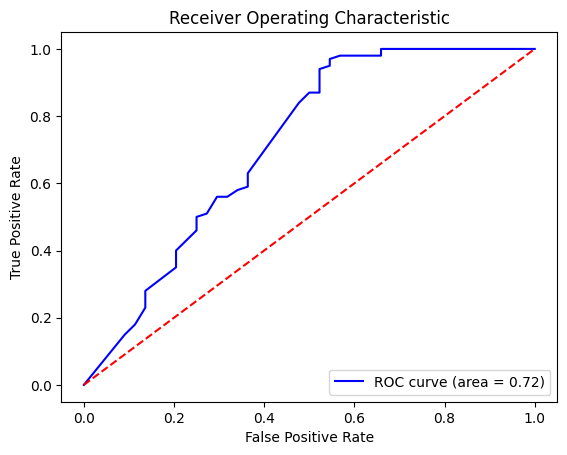

Optimal threshold based on Youden Index: 0.6
Accuracy with optimal threshold: 0.8125
Classification report with optimal threshold:
              precision    recall  f1-score   support

           0       0.87      0.45      0.60        44
           1       0.80      0.97      0.88       100

    accuracy                           0.81       144
   macro avg       0.84      0.71      0.74       144
weighted avg       0.82      0.81      0.79       144



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load your data
# Assuming you have your features (dat) and target variable (Loan_Status_Y)
# Example:
# dat = pd.read_csv('your_data.csv')
# features = dat[top_features]  # Replace with your selected features
# target = dat['Loan_Status_Y']  # Replace with your target variable


features = [
    'Credit_History',
    'ApplicantIncome',
    'CoapplicantIncome',
    'Loan_Amount_Term'
]

X = dat[features]  # Features
y = dat['Loan_Status_Y']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

# Train the Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)




# Train the Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Get predicted probabilities for the positive class
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Determine the optimal threshold using Youden's J statistic
youden_index = tpr - fpr
optimal_idx = np.argmax(youden_index)
optimal_threshold = thresholds[optimal_idx]

print(f'Optimal threshold based on Youden Index: {optimal_threshold}')

# Make predictions based on the optimal threshold
y_pred_optimal = (y_prob >= optimal_threshold).astype(int)

# Evaluate the model with the optimal threshold
acc = accuracy_score(y_test, y_pred_optimal)
report = classification_report(y_test, y_pred_optimal)

print(f'Accuracy with optimal threshold: {acc}')
print('Classification report with optimal threshold:')
print(report)


#### **Model predict with thresold = 0.6**

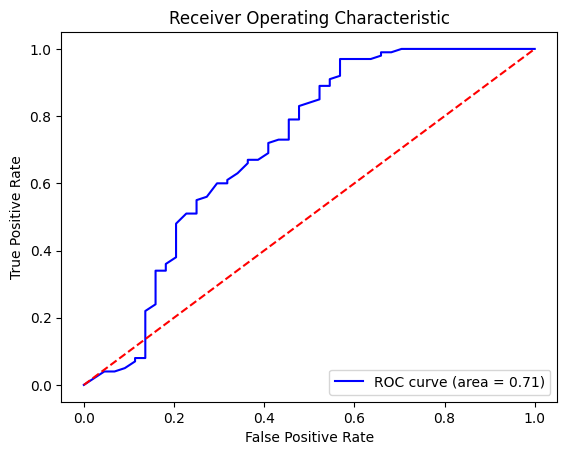

Optimal threshold based on Youden Index: 0.5171190476190477
--- Results with Default Threshold (0.5) ---
Accuracy: 0.8055555555555556
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.43      0.58        44
           1       0.80      0.97      0.87       100

    accuracy                           0.81       144
   macro avg       0.83      0.70      0.72       144
weighted avg       0.82      0.81      0.78       144

--- Results with Optimal Threshold ---
Accuracy: 0.8055555555555556
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.43      0.58        44
           1       0.80      0.97      0.87       100

    accuracy                           0.81       144
   macro avg       0.83      0.70      0.72       144
weighted avg       0.82      0.81      0.78       144



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assume 'dat' is your DataFrame containing all the features and target variable
# For example:
# dat = pd.read_csv('your_data.csv')
# Adjust according to your actual data



# Train the Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Get predicted probabilities for the positive class
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Determine the optimal threshold using Youden's J statistic
youden_index = tpr - fpr
optimal_idx = np.argmax(youden_index)
optimal_threshold = thresholds[optimal_idx]

print(f'Optimal threshold based on Youden Index: {optimal_threshold}')

# Make predictions based on the default threshold (0.5)
y_pred_default = (y_prob >= 0.5).astype(int)

# Make predictions based on the optimal threshold
y_pred_optimal = (y_prob >= optimal_threshold).astype(int)

# Evaluate the model with the default threshold
acc_default = accuracy_score(y_test, y_pred_default)
report_default = classification_report(y_test, y_pred_default)

# Evaluate the model with the optimal threshold
acc_optimal = accuracy_score(y_test, y_pred_optimal)
report_optimal = classification_report(y_test, y_pred_optimal)

# Print the results
print('--- Results with Default Threshold (0.5) ---')
print(f'Accuracy: {acc_default}')
print('Classification Report:')
print(report_default)

print('--- Results with Optimal Threshold ---')
print(f'Accuracy: {acc_optimal}')
print('Classification Report:')
print(report_optimal)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Assuming you have your features (X) and target (y) defined
# For example:
# X = dat[top_features]  # your feature DataFrame
# y = dat["Loan_Status_Y"]  # your target variable



# Fit the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get predicted probabilities
y_prob = model.predict_proba(X_test)[:, 1]  # Probability for the positive class (1)

# Set the threshold to 0.4
threshold = 0.4

# Classify using the threshold
y_pred_threshold = (y_prob >= threshold).astype(int)

# Calculate accuracy with the specified threshold
accuracy_threshold = accuracy_score(y_test, y_pred_threshold)

# Print classification report with the specified threshold
#report = classification_report(y_test, y_pred_threshold)
# print(f"Accuracy with threshold of {threshold}: {accuracy_threshold:.4f}")
# print("Classification report with threshold of 0.4:")
# print(report)
  # Generate classification report as a dictionary
report = classification_report(y_test, y_pred, output_dict=True)

        # Extract relevant metrics and store them
model_report.append({
            'Model': model_name,
            'Accuracy': acc,
            'Precision': report['weighted avg']['precision'],
            'Recall': report['weighted avg']['recall'],
            'F1-Score': report['weighted avg']['f1-score'],
            'Support': report['weighted avg']['support'],
            'False Positives': sum((y_test == 0) & (y_pred == 1)),
            'False Negatives': sum((y_test == 1) & (y_pred == 0))

        })
# # Plot ROC Curve for visualization
# fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# plt.figure()
# plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve')
# plt.plot([0, 1], [0, 1], color='red', linestyle='--')
# plt.scatter(fpr[np.argmin(np.abs(thresholds - threshold))],
#             tpr[np.argmin(np.abs(thresholds - threshold))],
#             color='green', label='Threshold = 0.4', zorder=5)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc='lower right')
# plt.show()


NameError: name 'y_pred' is not defined

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Assuming X and y are defined
# X = your_features_dataframe
# y = your_target_series

# Train-test split


# Fit the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get predicted probabilities for the positive class (1)
y_prob = model.predict_proba(X_test)[:, 1]

# Use a threshold of 0.4 to classify
threshold = 0.9
y_pred = (y_prob >= threshold).astype(int)

# Calculate metrics
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

# False positives and false negatives
false_positives = sum((y_test == 0) & (y_pred == 1))
false_negatives = sum((y_test == 1) & (y_pred == 0))

# Print results
print(f"Accuracy with threshold {threshold}: {acc:.4f}")
print("Classification report with threshold 0.4:")
print(classification_report(y_test, y_pred))
print(f"False Positives: {false_positives}")
print(f"False Negatives: {false_negatives}")


Accuracy with threshold 0.9: 0.6042
Classification report with threshold 0.4:
              precision    recall  f1-score   support

           0       0.41      0.68      0.51        44
           1       0.80      0.57      0.67       100

    accuracy                           0.60       144
   macro avg       0.61      0.63      0.59       144
weighted avg       0.68      0.60      0.62       144

False Positives: 14
False Negatives: 43


pip install imbalanced-learn


In [ ]:
#pip install imbalanced-learn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Sample data generation (replace with your actual data)
# X = your_features
# y = your_target

# For demonstration, let's assume X and y are defined
# Train-test split


# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Fit the Random Forest model on the resampled data
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

# Predict probabilities on the test set
y_scores = model.predict_proba(X_test)[:, 1]
threshold = 0.5
y_pred = (y_scores >= threshold).astype(int)

# Classification report and confusion matrix
report = classification_report(y_test, y_pred, target_names=["Not Approved", "Approved"], output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract metrics
precision_0 = report['Not Approved']['precision']
recall_0 = report['Not Approved']['recall']
f1_0 = report['Not Approved']['f1-score']
false_positives = conf_matrix[0, 1]
false_negatives = conf_matrix[1, 0]

# Print results
print(f"Classification Report for Threshold {threshold}:")
print(report)
print(f"False Positives: {false_positives}")
print(f"False Negatives: {false_negatives}")
#


Classification Report for Threshold 0.5:
{'Not Approved': {'precision': 0.8636363636363636, 'recall': 0.4318181818181818, 'f1-score': 0.5757575757575758, 'support': 44.0}, 'Approved': {'precision': 0.7950819672131147, 'recall': 0.97, 'f1-score': 0.8738738738738738, 'support': 100.0}, 'accuracy': 0.8055555555555556, 'macro avg': {'precision': 0.8293591654247392, 'recall': 0.7009090909090909, 'f1-score': 0.7248157248157248, 'support': 144.0}, 'weighted avg': {'precision': 0.8160291438979964, 'recall': 0.8055555555555556, 'f1-score': 0.7827827827827828, 'support': 144.0}}
False Positives: 25
False Negatives: 3


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# Assuming X and y are your features and target
# X = your_features
# y = your_target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

# Use RandomUnderSampler and RandomOverSampler
under_sampler = RandomUnderSampler(random_state=42)
over_sampler = RandomOverSampler(random_state=42)

# First, under-sample the majority class
X_under, y_under = under_sampler.fit_resample(X_train, y_train)

# Then, over-sample the minority class on the under-sampled data
X_resampled, y_resampled = over_sampler.fit_resample(X_under, y_under)

# Train the Random Forest model on the resampled data
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

# Directly predict on the test set without using probabilities
y_pred = model.predict(X_test)

# Classification report and confusion matrix
report = classification_report(y_test, y_pred, target_names=["Not Approved", "Approved"], output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract metrics
precision_0 = report['Not Approved']['precision']
recall_0 = report['Not Approved']['recall']
f1_0 = report['Not Approved']['f1-score']
false_positives = conf_matrix[0, 1]
false_negatives = conf_matrix[1, 0]

# Print results
print("Classification Report:")
print(report)
print(f"False Positives: {false_positives}")
print(f"False Negatives: {false_negatives}")


Classification Report:
{'Not Approved': {'precision': 0.71875, 'recall': 0.5227272727272727, 'f1-score': 0.6052631578947368, 'support': 44.0}, 'Approved': {'precision': 0.8125, 'recall': 0.91, 'f1-score': 0.8584905660377359, 'support': 100.0}, 'accuracy': 0.7916666666666666, 'macro avg': {'precision': 0.765625, 'recall': 0.7163636363636363, 'f1-score': 0.7318768619662364, 'support': 144.0}, 'weighted avg': {'precision': 0.7838541666666666, 'recall': 0.7916666666666666, 'f1-score': 0.7811155246607084, 'support': 144.0}}
False Positives: 21
False Negatives: 9


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler  # Using RandomOverSampler for oversampling

# Assume X and y are your features and target
# X = your_features
# y = your_target

# Split the data
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

# Apply RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = over_sampler.fit_resample(X_train, y_train)

# Train the Random Forest model on the resampled data
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

# Directly predict on the test set without using probabilities
y_pred = model.predict(X_test)

# Classification report and confusion matrix
report = classification_report(y_test, y_pred, target_names=["Not Approved", "Approved"], output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract metrics
precision_0 = report['Not Approved']['precision']
recall_0 = report['Not Approved']['recall']
f1_0 = report['Not Approved']['f1-score']
false_positives = conf_matrix[0, 1]
false_negatives = conf_matrix[1, 0]

# Print results
print("Classification Report:")
print(report)
print(f"False Positives: {false_positives}")
print(f"False Negatives: {false_negatives}")


Classification Report:
{'Not Approved': {'precision': 0.8636363636363636, 'recall': 0.4318181818181818, 'f1-score': 0.5757575757575758, 'support': 44.0}, 'Approved': {'precision': 0.7950819672131147, 'recall': 0.97, 'f1-score': 0.8738738738738738, 'support': 100.0}, 'accuracy': 0.8055555555555556, 'macro avg': {'precision': 0.8293591654247392, 'recall': 0.7009090909090909, 'f1-score': 0.7248157248157248, 'support': 144.0}, 'weighted avg': {'precision': 0.8160291438979964, 'recall': 0.8055555555555556, 'f1-score': 0.7827827827827828, 'support': 144.0}}
False Positives: 25
False Negatives: 3


#### **Evaluation Conclusion**

conclusion
0, 0 = 20(TN) , 1,1(TP)= 98, FP = 22(0 predicted as 1), FN = 4(1 predicted AS 0)

Class 0:

Precision (0.83):

Out of all instances predicted as class 0, 83% were actually class 0. This is a good precision score, indicating that when the model predicts class 0, it is mostly correct. Recall (0.48):

This means that out of all actual class 0 instances, only 48% were correctly identified by the model. This is relatively low, indicating that many instances of class 0 are being misclassified as class 1 (as indicated by the 22 false positives). F1-Score (0.61):

The F1-score combines precision and recall into a single metric, and in this case, it's moderately low, reflecting the trade-off between precision and recall.

2. Class 1: Precision (0.82):

For class 1, 82% of instances predicted as class 1 were correct. This is also a good score, indicating that the model is reliable when it predicts class 1. Recall (0.96):

The model correctly identifies 96% of the actual class 1 instances. This is an excellent recall score, indicating that the model is very effective at identifying class 1 instances, with only 4 false negatives. F1-Score (0.88):

This score is high, reflecting a good balance between precision and recall for class 1.

F1 SCORE OF 1 > F1 SCORE OF 0 , IT might be imbalance

#### **Conclusion:**

**Models(rf, dt, lr) with 14 variables:**

1.


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
import pandas as pd


# Define the classification models
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression()
}

# Define hyperparameters for each model
params = {
    "Logistic Regression": {
        'C': [0.001, 0.01, 0.1, 1, 10],  # Inverse of regularization strength
        'penalty': ['l1', 'l2', 'elasticnet'],  # Type of regularization
        'solver': ['liblinear', 'saga']  # Algorithms to use
    },
    "Decision Tree": {
        'max_depth': [None, 5, 10, 20],  # Maximum depth of the tree
        'min_samples_split': [2, 5, 10],  # Minimum samples required to split
        'min_samples_leaf': [1, 2, 4]  # Minimum samples required in a leaf node
    },
    "Random Forest": {
        'n_estimators': [10, 50, 100]  # Number of trees in the forest
    }
}


def evaluate_models(X_train, y_train, X_test, y_test, models, params):
    report = []
    best_model = None
    best_score = 0  # Initialize to track the best score

    for model_name, model in models.items():
        para = params.get(model_name, {})

        # Perform GridSearchCV to find the best parameters
        gs = GridSearchCV(model, para, cv=3, n_jobs=-1, scoring='accuracy')  # You can change scoring as needed
        gs.fit(X_train, y_train)

        # Set the best parameters found
        model.set_params(**gs.best_params_)
        model.fit(X_train, y_train)  # Train model with best parameters

        # Make predictions
        y_test_pred = model.predict(X_test)

        # Calculate accuracy score
        acc = accuracy_score(y_test, y_test_pred)

        # Generate classification report as a dictionary
        report_dict = classification_report(y_test, y_test_pred, output_dict=True)

        # Store results in the report
        report.append({
            'Model': model_name,
            'Best Parameters': gs.best_params_,
            'Accuracy': acc,
            'Precision': report_dict['weighted avg']['precision'],
            'Recall': report_dict['weighted avg']['recall'],
            'F1-Score': report_dict['weighted avg']['f1-score'],
            'Support': report_dict['weighted avg']['support'],
            'False Positives': sum((y_test == 0) & (y_test_pred == 1)),
            'False Negatives': sum((y_test == 1) & (y_test_pred == 0))
        })

        # Check if this model is the best
        if acc > best_score:
            best_score = acc
            best_model = model

    # Convert report to DataFrame
    report_df = pd.DataFrame(report)

    return report_df, best_model, gs.best_params_

# Call the function to evaluate models
model_report_df, best_model, best_params = evaluate_models(X_train, y_train, X_test, y_test, models, params)

# Print the DataFrame
print(model_report_df)

# Save the DataFrame to a CSV file with the specified name
model_report_df.to_csv('classification_report_14var.csv', index=False)


                 Model                                    Best Parameters  \
0        Random Forest                              {'n_estimators': 100}   
1        Decision Tree  {'max_depth': 5, 'min_samples_leaf': 1, 'min_s...   
2  Logistic Regression  {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}   

   Accuracy  Precision    Recall  F1-Score  Support  False Positives  \
0  0.798611   0.803380  0.798611  0.776618    144.0               25   
1  0.763889   0.800926  0.763889  0.712712    144.0               33   
2  0.805556   0.848090  0.805556  0.772125    144.0               28   

   False Negatives  
0                4  
1                1  
2                0  


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/us

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV






def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(2, 2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Approved (0)', 'Approved (1)'],
                yticklabels=['Not Approved (0)', 'Approved (1)'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

def evaluate_models_14(X_train, y_train, X_test, y_test, models, params):
    report = []
    best_model = None
    best_score = 0  # Initialize to track the best score

    for model_name, model in models.items():
        para = params.get(model_name, {})

        # Perform GridSearchCV to find the best parameters
        gs = GridSearchCV(model, para, cv=3, n_jobs=-1, scoring='accuracy')
        gs = GridSearchCV(model, cv=3, n_jobs=-1, scoring='accuracy')
        gs.fit(X_train, y_train)

        # Set the best parameters found
        #model.set_params(**gs.best_params_)
        model.fit(X_train, y_train)

        # Make predictions
        y_test_pred = model.predict(X_test)

        # Calculate accuracy score
        acc = accuracy_score(y_test, y_test_pred)

        # Generate classification report as a dictionary
        report_dict = classification_report(y_test, y_test_pred, output_dict=True)

        # Calculate confusion matrix
        cm = confusion_matrix(y_test, y_test_pred)
        false_positives = cm[0, 1]  # FP
        false_negatives = cm[1, 0]  # FN

        # Store results in the report
        report.append({
            'Model': model_name,
            'Best Parameters': gs.best_params_,
            'Accuracy': acc,
            'Precision': report_dict.get('weighted avg', {}).get('precision', 0),
            'Recall': report_dict.get('weighted avg', {}).get('recall', 0),
            'F1-Score': report_dict.get('weighted avg', {}).get('f1-score', 0),
            'Support': report_dict.get('weighted avg', {}).get('support', 0),
            'False Positives': false_positives,
            'False Negatives': false_negatives
        })

        # Plot confusion matrix for the model
        plot_confusion_matrix(y_test, y_test_pred, model_name)

        # Check if this model is the best
        if acc > best_score:
            best_score = acc
            best_model = model

    # Convert report to DataFrame
    report_df = pd.DataFrame(report)

    return report_df, best_model, gs.best_params_

# Example usage of the function
# Define your models and parameters here
class_weight = dict({0 : 1, 1 : 100})
# models = {
#     "Logistic Regression": LogisticRegression(),
#     "Random Forest": RandomForestClassifier(class_weight=class_weight),
    # Add other models as needed
# }

# Define the classification models
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression()
}

# Define hyperparameters for each model
params = {
    "Logistic Regression": {
        'C': [0.001, 0.01, 0.1, 1, 10],  # Inverse of regularization strength
        'penalty': ['l1', 'l2', 'elasticnet'],  # Type of regularization
        'solver': ['liblinear', 'saga']  # Algorithms to use
    },
    "Decision Tree": {
        'max_depth': [None, 5, 10, 20],  # Maximum depth of the tree
        'min_samples_split': [2, 5, 10],  # Minimum samples required to split
        'min_samples_leaf': [1, 2, 4]  # Minimum samples required in a leaf node
    },
    "Random Forest": {
        'n_estimators': [10, 50, 100]  # Number of trees in the forest
    }
}



# Assume X_train, X_test, y_train, y_test are already defined
model_report_df, best_model = evaluate_models(X_train, y_train, X_test, y_test, params, models)

# Print the report DataFrame
print(model_report_df)

# Save the DataFrame to a CSV file
model_report_df.to_csv('classification_report_14var.csv', index=False)


TypeError: evaluate_models() takes 5 positional arguments but 6 were given

####** final code to evaluate**

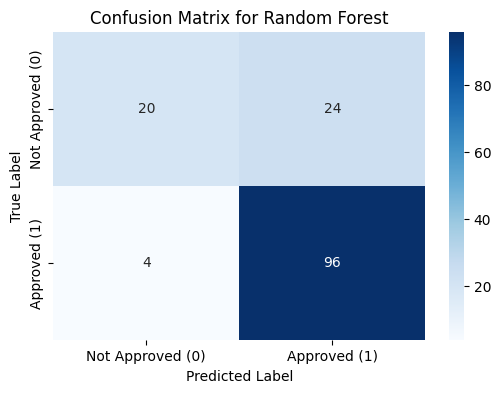

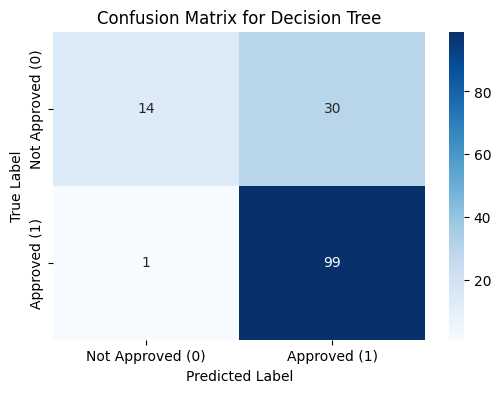

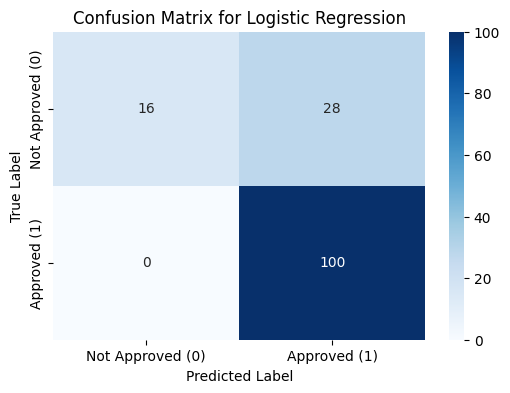

                 Model                                    Best Parameters  \
0        Random Forest                               {'n_estimators': 50}   
1        Decision Tree  {'max_depth': 5, 'min_samples_leaf': 1, 'min_s...   
2  Logistic Regression  {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}   

   Accuracy  Precision    Recall  F1-Score  Support  False Positives  \
0  0.805556   0.810185  0.805556  0.785799    144.0               24   
1  0.784722   0.818131  0.784722  0.745446    144.0               30   
2  0.805556   0.848090  0.805556  0.772125    144.0               28   

   False Negatives  
0                4  
1                1  
2                0  


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Approved (0)', 'Approved (1)'],
                yticklabels=['Not Approved (0)', 'Approved (1)'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

def evaluate_models(X_train, y_train, X_test, y_test, models, params):
    report = []
    best_model = None
    best_score = 0  # Initialize to track the best score

    for model_name, model in models.items():
        para = params.get(model_name, {})

        # Perform GridSearchCV to find the best parameters
        gs = GridSearchCV(model, para, cv=3, n_jobs=-1, scoring='accuracy')
        gs.fit(X_train, y_train)

        # Set the best parameters found
        model.set_params(**gs.best_params_)
        model.fit(X_train, y_train)

        # Make predictions
        y_test_pred = model.predict(X_test)

        # Calculate accuracy score
        acc = accuracy_score(y_test, y_test_pred)

        # Generate classification report as a dictionary
        report_dict = classification_report(y_test, y_test_pred, output_dict=True)

        # Calculate confusion matrix
        cm = confusion_matrix(y_test, y_test_pred)
        false_positives = cm[0, 1]  # FP
        false_negatives = cm[1, 0]  # FN

        # Store results in the report
        report.append({
            'Model': model_name,
            'Best Parameters': gs.best_params_,
            'Accuracy': acc,
            'Precision': report_dict.get('weighted avg', {}).get('precision', 0),
            'Recall': report_dict.get('weighted avg', {}).get('recall', 0),
            'F1-Score': report_dict.get('weighted avg', {}).get('f1-score', 0),
            'Support': report_dict.get('weighted avg', {}).get('support', 0),
            'False Positives': false_positives,
            'False Negatives': false_negatives
        })

        # Plot confusion matrix for the model
        plot_confusion_matrix(y_test, y_test_pred, model_name)

        # Check if this model is the best
        if acc > best_score:
            best_score = acc
            best_model = model

    # Convert report to DataFrame
    report_df = pd.DataFrame(report)

    return report_df, best_model

# Example usage of the function
class_weight = {0: 1, 1: 100}  # Adjusted class weight for imbalance

# Define the classification models
models = {
    "Random Forest": RandomForestClassifier(class_weight=class_weight),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
}

# Define hyperparameters for each model
params = {
    "Logistic Regression": {
        'C': [0.001, 0.01, 0.1, 1, 10],  # Inverse of regularization strength
        'penalty': ['l1', 'l2'],  # Type of regularization
        'solver': ['liblinear', 'saga']  # Algorithms to use
    },
    "Decision Tree": {
        'max_depth': [None, 5, 10, 20],  # Maximum depth of the tree
        'min_samples_split': [2, 5, 10],  # Minimum samples required to split
        'min_samples_leaf': [1, 2, 4]  # Minimum samples required in a leaf node
    },
    "Random Forest": {
        'n_estimators': [10, 50, 100]  # Number of trees in the forest
    }
}

# Assume X_train, X_test, y_train, y_test are already defined
model_report_df, best_model = evaluate_models(X_train, y_train, X_test, y_test, models, params)

# Print the report DataFrame
print(model_report_df)

# Save the DataFrame to a CSV file
model_report_df.to_csv('classification_report_14var.csv', index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


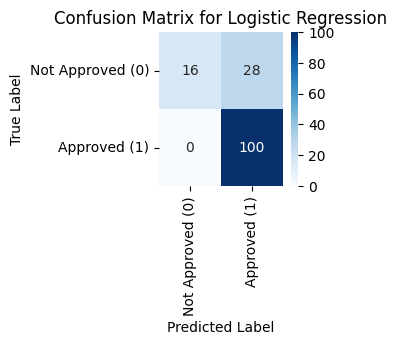

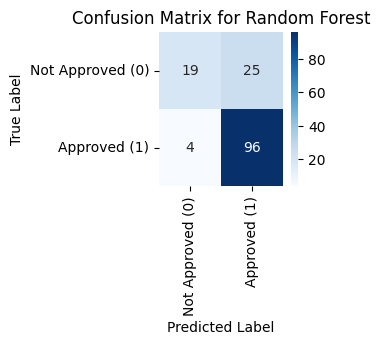

                 Model  Accuracy  Precision    Recall  F1-Score  Support  \
0  Logistic Regression  0.805556    0.84809  0.805556  0.772125    144.0   
1        Random Forest  0.798611    0.80338  0.798611  0.776618    144.0   

   False Positives  False Negatives  
0               28                0  
1               25                4  


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV






def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(2, 2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Approved (0)', 'Approved (1)'],
                yticklabels=['Not Approved (0)', 'Approved (1)'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

#def evaluate_models(X_train, y_train, X_test, y_test, models, params):
def evaluate_models(X_train, y_train, X_test, y_test, models):
    report = []
    best_model = None
    best_score = 0  # Initialize to track the best score

    for model_name, model in models.items():
        #para = params.get(model_name, {})

        # Perform GridSearchCV to find the best parameters
        #gs = GridSearchCV(model, para, cv=3, n_jobs=-1, scoring='accuracy')
        # gs = GridSearchCV(model, cv=3, n_jobs=-1, scoring='accuracy')
        # gs.fit(X_train, y_train)

        # Set the best parameters found
        #model.set_params(**gs.best_params_)
        model.fit(X_train, y_train)

        # Make predictions
        y_test_pred = model.predict(X_test)

        # Calculate accuracy score
        acc = accuracy_score(y_test, y_test_pred)

        # Generate classification report as a dictionary
        report_dict = classification_report(y_test, y_test_pred, output_dict=True)

        # Calculate confusion matrix
        cm = confusion_matrix(y_test, y_test_pred)
        false_positives = cm[0, 1]  # FP
        false_negatives = cm[1, 0]  # FN

        # Store results in the report
        report.append({
            'Model': model_name,
            #'Best Parameters': gs.best_params_,
            'Accuracy': acc,
            'Precision': report_dict.get('weighted avg', {}).get('precision', 0),
            'Recall': report_dict.get('weighted avg', {}).get('recall', 0),
            'F1-Score': report_dict.get('weighted avg', {}).get('f1-score', 0),
            'Support': report_dict.get('weighted avg', {}).get('support', 0),
            'False Positives': false_positives,
            'False Negatives': false_negatives
        })

        # Plot confusion matrix for the model
        plot_confusion_matrix(y_test, y_test_pred, model_name)

        # Check if this model is the best
        if acc > best_score:
            best_score = acc
            best_model = model

    # Convert report to DataFrame
    report_df = pd.DataFrame(report)

    return report_df, best_model #gs.best_params_

# Example usage of the function
# Define your models and parameters here
class_weight = dict({0 : 1, 1 : 100})
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(class_weight=class_weight),
    # Add other models as needed
}

# params = {
#     "Logistic Regression": {
#         'C': [0.001, 0.01, 0.1, 1, 10],
#         'penalty': ['l1', 'l2'],
#         'solver': ['liblinear']
#     },
#     "Random Forest": {
#         'n_estimators': [10, 50, 100],
#     },
#     # Add parameter grids for other models as needed
# }

# Assume X_train, X_test, y_train, y_test are already defined
model_report_df, best_model = evaluate_models(X_train, y_train, X_test, y_test, models)

# Print the report DataFrame
print(model_report_df)

# Save the DataFrame to a CSV file
model_report_df.to_csv('classification_report_14var.csv', index=False)


In [ ]:
# Define the classification models
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression()
}

params = {
    "Logistic Regression": {
        'C': [0.001, 0.01, 0.1, 1, 10],  # Inverse of regularization strength
        'penalty': ['l1', 'l2', 'elasticnet'],  # Type of regularization
        'solver': ['liblinear', 'saga']  # Algorithms to use
    },
    "Decision Tree": {
        'max_depth': [None, 5, 10, 20],  # Maximum depth of the tree
        'min_samples_split': [2, 5, 10],  # Minimum samples required to split
        'min_samples_leaf': [1, 2, 4]  # Minimum samples required in a leaf node
    },
    "Random Forest": {
        'n_estimators': [10, 50, 100]  # Number of trees in the forest
    }
}
for model_name, model in models.items():
        para = params.get(model_name, {})
print(para)

{'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2', 'elasticnet'], 'solver': ['liblinear', 'saga']}


In [ ]:
# AT RANDOM STATE = 42

from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
import pandas as pd

def evaluate_models(X_train, y_train, X_test, y_test, models, params):
    report = []
    best_model = None
    best_score = 0  # Initialize to track the best score

    for model_name, model in models.items():
        para = params.get(model_name, {})

        # Perform GridSearchCV to find the best parameters
        gs = GridSearchCV(model, para, cv=3, n_jobs=-1, scoring='accuracy')  # You can change scoring as needed
        gs.fit(X_train, y_train)

        # Set the best parameters found
        model.set_params(**gs.best_params_)
        model.fit(X_train, y_train)  # Train model with best parameters

        # Make predictions
        y_test_pred = model.predict(X_test)

        # Calculate accuracy score
        acc = accuracy_score(y_test, y_test_pred)

        # Generate classification report as a dictionary
        report_dict = classification_report(y_test, y_test_pred, output_dict=True)

        # Store results in the report
        report.append({
            'Model': model_name,
            'Best Parameters': gs.best_params_,
            'Accuracy': acc,
            'Precision': report_dict['weighted avg']['precision'],
            'Recall': report_dict['weighted avg']['recall'],
            'F1-Score': report_dict['weighted avg']['f1-score'],
            'Support': report_dict['weighted avg']['support'],
            'False Positives': sum((y_test == 0) & (y_test_pred == 1)),
            'False Negatives': sum((y_test == 1) & (y_test_pred == 0))
        })

        # Check if this model is the best
        if acc > best_score:
            best_score = acc
            best_model = model

    # Convert report to DataFrame
    report_df = pd.DataFrame(report)

    return report_df, best_model, gs.best_params_



##### **this is final one for model**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report




# Define your models and parameters
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier()
}

params = {
    "Logistic Regression": {
        'C': [0.001, 0.01, 0.1, 1, 10],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    },
    "Random Forest": {
        'n_estimators': [10, 50, 100],
        'max_depth': [None, 10, 20]

    }
}

def evaluate_models(X_train, y_train, X_test, y_test, models, params):
    report = []
    best_model = None
    best_score = 0  # Initialize to track the best score

    for model_name, model in models.items():
        para = params.get(model_name, {})

        # Perform GridSearchCV to find the best parameters
        gs = GridSearchCV(model, para, cv=3, n_jobs=-1, scoring='accuracy')  # You can change scoring as needed
        gs.fit(X_train, y_train)

        # Set the best parameters found
        model.set_params(**gs.best_params_)
        model.fit(X_train, y_train)  # Train model with best parameters

        # Make predictions
        y_test_pred = model.predict(X_test)

        # Calculate accuracy score
        acc = accuracy_score(y_test, y_test_pred)

        # Generate classification report as a dictionary
        report_dict = classification_report(y_test, y_test_pred, output_dict=True)

        # Store results in the report
        report.append({
            'Model': model_name,
            'Best Parameters': gs.best_params_,
            'Accuracy': acc,
            'Precision': report_dict['weighted avg']['precision'],
            'Recall': report_dict['weighted avg']['recall'],
            'F1-Score': report_dict['weighted avg']['f1-score'],
            'Support': report_dict['weighted avg']['support'],
            'False Positives': sum((y_test == 0) & (y_test_pred == 1)),
            'False Negatives': sum((y_test == 1) & (y_test_pred == 0))
        })

        # Check if this model is the best
        if acc > best_score:
            best_score = acc
            best_model = model

    # Convert report to DataFrame
    report_df = pd.DataFrame(report)

    return report_df, best_model, gs.best_params_

# Evaluate the models
model_report_df, best_model, best_params = evaluate_models(X_train, y_train, X_test, y_test, models, params)

# Print the results
print("Model Report:")
print(model_report_df)

print("\nBest Model:")
print(best_model)

print("\nBest Parameters:")
print(best_params)


Model Report:
                 Model                                    Best Parameters  \
0  Logistic Regression  {'C': 0.1, 'penalty': 'l1', 'solver': 'libline...   
1        Random Forest             {'max_depth': 10, 'n_estimators': 100}   

   Accuracy  Precision    Recall  F1-Score  Support  False Positives  \
0  0.826389   0.845457  0.826389  0.797214    144.0               24   
1  0.833333   0.831346  0.833333  0.816959    144.0               20   

   False Negatives  
0                1  
1                4  

Best Model:
RandomForestClassifier(max_depth=10)

Best Parameters:
{'max_depth': 10, 'n_estimators': 100}


#### **code for saving the model**

#############**this one running check if fp improved**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle  # Importing pickle for saving models
            # Target variable

# Train-test split (70% train, 30% test)
random_state = 42  # Set a random state for reproducibility


# Define your models and parameters
models = {
    "Logistic Regression": LogisticRegression(random_state=random_state),
    "Random Forest": RandomForestClassifier(class_weight={0: 1, 1: 100}, random_state=random_state),
    "SVM": SVC(class_weight={0: 1, 1: 100}, random_state=random_state),
    "Gradient Boosting": GradientBoostingClassifier(random_state=random_state),
    "KNN": KNeighborsClassifier()
}


params = {
    "Logistic Regression": {
        'C': 10.0 **np.arange(-2,3),
        'penalty': ['l2'],
        #'solver': ['liblinear']
    },
    "Random Forest": {
        'n_estimators': [100],
        '#max_depth': [None, 10, 20],
       # 'class_weight': [{0: 1, 1: 100}]
    },
    # "SVM": {
    #     'C': [0.1, 1, 10],
    #     'kernel': ['linear', 'rbf'],
    #     'class_weight': [{0: 1, 1: 100}]
    # },
    # "Gradient Boosting": {
    #     'n_estimators': [50, 100],
    #     'learning_rate': [0.01, 0.1, 0.5],
    #     'max_depth': [3, 5, 7]
    # },
    # "KNN": {
    #     'n_neighbors': [3, 5, 7, 9],
    #     'weights': ['uniform', 'distance']
    # }
}

def evaluate_models(X_train, y_train, X_test, y_test, models, params):
    report = []
    best_model = None
    best_score = 0  # Initialize to track the best score

    for model_name, model in models.items():
        para = params.get(model_name, {})

        # Perform GridSearchCV to find the best parameters
        gs = GridSearchCV(model, para, cv=5, n_jobs=-1, scoring='accuracy')  # You can change scoring as needed
        gs.fit(X_train, y_train)

        # Set the best parameters found
        model.set_params(**gs.best_params_)
        model.fit(X_train, y_train)  # Train model with best parameters

        # Save the model to disk as a pickle file
        with open(f'{model_name.replace(" ", "_")}.pkl', 'wb') as file:
            pickle.dump(model, file)

        # Make predictions
        y_test_pred = model.predict(X_test)

        # Calculate accuracy score
        acc = accuracy_score(y_test, y_test_pred)

        # Generate classification report as a dictionary
        report_dict = classification_report(y_test, y_test_pred, output_dict=True)

        # Store results in the report
        report.append({
            'Model': model_name,
            'Best Parameters': gs.best_params_,
            'Accuracy': acc,
            'Precision': report_dict['weighted avg']['precision'],
            'Recall': report_dict['weighted avg']['recall'],
            'F1-Score': report_dict['weighted avg']['f1-score'],
            'Support': report_dict['weighted avg']['support'],
            'False Positives': sum((y_test == 0) & (y_test_pred == 1)),
            'False Negatives': sum((y_test == 1) & (y_test_pred == 0))
        })

        # Check if this model is the best
        if acc > best_score:
            best_score = acc
            best_model = model

    # Convert report to DataFrame
    report_df = pd.DataFrame(report)

    return report_df, best_model, gs.best_params_

# Evaluate the models
model_report_df, best_model, best_params = evaluate_models(X_train, y_train, X_test, y_test, models, params)

# Print the results
print("Model Report:")
print(model_report_df)

print("\nBest Model:")
print(best_model)

print("\nBest Parameters:")
print(best_params)


ValueError: Invalid parameter '#max_depth' for estimator RandomForestClassifier(class_weight={0: 1, 1: 100}, random_state=42). Valid parameters are: ['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'monotonic_cst', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'].

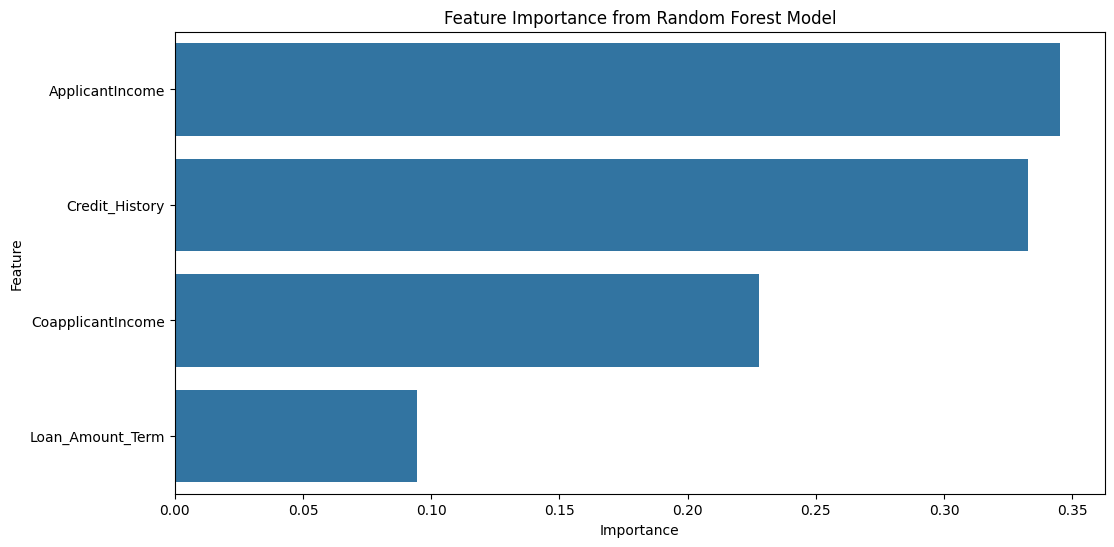

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Assume you have your data loaded into trainX and trainY
# Fit the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


# # # List of top 4 important features
# # top_features = [
# #     'Credit_History',
# #     'ApplicantIncome',
# #     'CoapplicantIncome',
# #     'Loan_Amount_Term'
# # ]

# # Creating a new DataFrame using transformed "dat" data frame with only the top 4 features
# feature_new = dat[top_features]

# # Display the new DataFrame
# feature_new


###**# This one i ran and got perfect results reducing fp**

In [ ]:
# List of top 4 important features
top_features = [
    'Credit_History',
    'ApplicantIncome',
    'CoapplicantIncome',
    'Loan_Amount_Term'
]

# Creating a new DataFrame using transformed "dat" data frame with only the top 4 features
feature_new = dat[top_features]

# Display the new DataFrame
feature_new

### target df

target = dat[["Loan_Status_Y"]]
target_change = target.values.flatten()
target_change

feature_new.shape, target_change.shape



from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_new, target_change, train_size=0.7, )

In [ ]:
class_weight = dict({0 : 1, 1 : 100})
classifier = RandomForestClassifier(class_weight= class_weight)
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[25 16]
 [12 91]]
0.8055555555555556
              precision    recall  f1-score   support

           0       0.68      0.61      0.64        41
           1       0.85      0.88      0.87       103

    accuracy                           0.81       144
   macro avg       0.76      0.75      0.75       144
weighted avg       0.80      0.81      0.80       144



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle

# Assuming X and y are your features and target variable respectively
# X = features
# y = target

# Train-test split (70% train, 30% test)
# random_state = 42
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=random_state)

# Define the classification models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier()
}

def evaluate_models(X_train, y_train, X_test, y_test, models):
    model_report = []

    for model_name, model in models.items():
        model.fit(X_train, y_train)  # Fit the model
        y_pred = model.predict(X_test)  # Make predictions

        # Calculate accuracy score
        acc = accuracy_score(y_test, y_pred)

        # Generate classification report as a dictionary
        report_dict = classification_report(y_test, y_pred, output_dict=True)

        # Store results in the report
        model_report.append({
            'Model': model_name,
            'Accuracy': acc,
            'Precision': report_dict['weighted avg']['precision'],
            'Recall': report_dict['weighted avg']['recall'],
            'F1-Score': report_dict['weighted avg']['f1-score'],
            'Support': report_dict['weighted avg']['support'],
            'False Positives': sum((y_test == 0) & (y_pred == 1)),
            'False Negatives': sum((y_test == 1) & (y_pred == 0))
        })

        # Save the model to disk as a pickle file
        with open(f'{model_name.replace(" ", "_")}.pkl', 'wb') as file:
            pickle.dump(model, file)

    # Convert report to DataFrame
    report_df = pd.DataFrame(model_report)

    return report_df

# Evaluate the models
model_report_df = evaluate_models(X_train, y_train, X_test, y_test, models)

# Print the DataFrame
print("Model Report:")
print(model_report_df)

# Save the report to a CSV file
model_report_df.to_csv('classification_report4var.csv', index=False)


Model Report:
                 Model  Accuracy  Precision    Recall  F1-Score  Support  \
0  Logistic Regression  0.805556   0.811988  0.805556  0.779288    144.0   
1        Random Forest  0.784722   0.775962  0.784722  0.778213    144.0   

   False Positives  False Negatives  
0               25                3  
1               19               12  


#### **model saved as randomforest.pkl has 4 var and with use of class weight its false positive decreased and recall became fantastic 43 to 78**

In [ ]:
# List of top 4 important features
top_features = [
    'Credit_History',
    'ApplicantIncome',
    'CoapplicantIncome',
    'Loan_Amount_Term'
]

# Creating a new DataFrame using transformed "dat" data frame with only the top 4 features
feature_new = dat[top_features]

# Display the new DataFrame
feature_new

### target df

target = dat[["Loan_Status_Y"]]
target_change = target.values.flatten()
target_change

feature_new.shape, target_change.shape



from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_new, target_change, train_size=0.7)

In [ ]:

# Define your models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(class_weight={0: 1, 1: 100}),
    #"SVM": SVC(class_weight={0: 1, 1: 100}, random_state=random_state, probability=True),
    #"Gradient Boosting": GradientBoostingClassifier(random_state=random_state),
    #"KNN": KNeighborsClassifier()
}

def evaluate_models(X_train, y_train, X_test, y_test, models):
    report = []
    best_model = None
    best_score = 0  # Initialize to track the best score

    for model_name, model in models.items():
        # Fit the model
        model.fit(X_train, y_train)

        # Save the model to disk as a pickle file
        with open(f'{model_name.replace(" ", "_")}.pkl', 'wb') as file:
            pickle.dump(model, file)

        # Make predictions
        y_test_pred = model.predict(X_test)

        # Calculate accuracy score
        acc = accuracy_score(y_test, y_test_pred)

        # Generate classification report as a dictionary
        report_dict = classification_report(y_test, y_test_pred, output_dict=True)

        # Store results in the report
        report.append({
            'Model': model_name,
            'Accuracy': acc,
            'Precision': report_dict['weighted avg']['precision'],
            'Recall': report_dict['weighted avg']['recall'],
            'F1-Score': report_dict['weighted avg']['f1-score'],
            'Support': report_dict['weighted avg']['support'],
            'False Positives': sum((y_test == 0) & (y_test_pred == 1)),
            'False Negatives': sum((y_test == 1) & (y_test_pred == 0))
        })

        # Check if this model is the best
        if acc > best_score:
            best_score = acc
            best_model = model

    # Convert report to DataFrame
    report_df = pd.DataFrame(report)

    return report_df, best_model

# Evaluate the models
model_report_df, best_model = evaluate_models(X_train, y_train, X_test, y_test, models)

# Print the results
print("Model Report:")
print(model_report_df)

print("\nBest Model:")
print(best_model)

Model Report:
                 Model  Accuracy  Precision    Recall  F1-Score  Support  \
0  Logistic Regression  0.826389   0.825245  0.826389  0.808698    144.0   
1        Random Forest  0.798611   0.791722  0.798611  0.794056    144.0   

   False Positives  False Negatives  
0               21                4  
1               17               12  

Best Model:
LogisticRegression()


### **case3:**


In [ ]:
# List of top 4 important features
top_features = [
    'Credit_History',
    'ApplicantIncome',
    'CoapplicantIncome',
    'Loan_Amount_Term'
]

# Creating a new DataFrame using transformed "dat" data frame with only the top 4 features
feature_new = dat[top_features]

# Display the new DataFrame
feature_new

### target df

target = dat[["Loan_Status_Y"]]
target_change = target.values.flatten()
target_change

feature_new.shape, target_change.shape



from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_new, target_change, train_size=0.7)

In [ ]:

# Define your models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(class_weight={0: 1, 1: 100}),
    #"SVM": SVC(class_weight={0: 1, 1: 100}, random_state=random_state, probability=True),
    #"Gradient Boosting": GradientBoostingClassifier(random_state=random_state),
    #"KNN": KNeighborsClassifier()
}

def evaluate_models(X_train, y_train, X_test, y_test, models):
    report = []
    best_model = None
    best_score = 0  # Initialize to track the best score

    for model_name, model in models.items():
        # Fit the model
        model.fit(X_train, y_train)

        # Save the model to disk as a pickle file
        with open(f'{model_name.replace(" ", "_")}.pkl', 'wb') as file:
            pickle.dump(model, file)

        # Make predictions
        y_test_pred = model.predict(X_test)

        # Calculate accuracy score
        acc = accuracy_score(y_test, y_test_pred)

        # Generate classification report as a dictionary
        report_dict = classification_report(y_test, y_test_pred, output_dict=True)

        # Store results in the report
        report.append({
            'Model': model_name,
            'Accuracy': acc,
            'Precision': report_dict['weighted avg']['precision'],
            'Recall': report_dict['weighted avg']['recall'],
            'F1-Score': report_dict['weighted avg']['f1-score'],
            'Support': report_dict['weighted avg']['support'],
            'False Positives': sum((y_test == 0) & (y_test_pred == 1)),
            'False Negatives': sum((y_test == 1) & (y_test_pred == 0))
        })

        # Check if this model is the best
        if acc > best_score:
            best_score = acc
            best_model = model

    # Convert report to DataFrame
    report_df = pd.DataFrame(report)

    return report_df, best_model

# Evaluate the models
model_report_df, best_model = evaluate_models(X_train, y_train, X_test, y_test, models)

# Print the results
print("Model Report:")
print(model_report_df)

print("\nBest Model:")
print(best_model)

Model Report:
                 Model  Accuracy  Precision    Recall  F1-Score  Support  \
0  Logistic Regression  0.833333   0.847899  0.833333  0.817169    144.0   
1        Random Forest  0.812500   0.808293  0.812500  0.809294    144.0   

   False Positives  False Negatives  
0               22                2  
1               16               11  

Best Model:
LogisticRegression()


In [ ]:
class_weight = dict({0 : 1, 1 : 100})
classifier = RandomForestClassifier(class_weight= class_weight)
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle





# Train-test split (70% train, 30% test)


# Define your models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(class_weight={0: 1, 1: 100}),
    #"SVM": SVC(class_weight={0: 1, 1: 100}, random_state=random_state, probability=True),
    #"Gradient Boosting": GradientBoostingClassifier(random_state=random_state),
    #"KNN": KNeighborsClassifier()
}

def evaluate_models(X_train, y_train, X_test, y_test, models):
    report = []
    best_model = None
    best_score = 0  # Initialize to track the best score

    for model_name, model in models.items():
        # Fit the model
        model.fit(X_train, y_train)

        # Save the model to disk as a pickle file
        with open(f'{model_name.replace(" ", "_")}.pkl', 'wb') as file:
            pickle.dump(model, file)

        # Make predictions
        y_test_pred = model.predict(X_test)

        # Calculate accuracy score
        acc = accuracy_score(y_test, y_test_pred)

        # Generate classification report as a dictionary
        report_dict = classification_report(y_test, y_test_pred, output_dict=True)

        # Store results in the report
        report.append({
            'Model': model_name,
            'Accuracy': acc,
            'Precision': report_dict['weighted avg']['precision'],
            'Recall': report_dict['weighted avg']['recall'],
            'F1-Score': report_dict['weighted avg']['f1-score'],
            'Support': report_dict['weighted avg']['support'],
            'False Positives': sum((y_test == 0) & (y_test_pred == 1)),
            'False Negatives': sum((y_test == 1) & (y_test_pred == 0))
        })

        # Check if this model is the best
        if acc > best_score:
            best_score = acc
            best_model = model

    # Convert report to DataFrame
    report_df = pd.DataFrame(report)

    return report_df, best_model

# Evaluate the models
model_report_df, best_model = evaluate_models(X_train, y_train, X_test, y_test, models)

# Print the results
print("Model Report:")
print(model_report_df)

print("\nBest Model:")
print(best_model)


Model Report:
                 Model  Accuracy  Precision    Recall  F1-Score  Support  \
0  Logistic Regression  0.805556   0.811988  0.805556  0.779288    144.0   
1        Random Forest  0.805556   0.800700  0.805556  0.802422    144.0   

   False Positives  False Negatives  
0               25                3  
1               16               12  

Best Model:
LogisticRegression()


1        Random Forest  0.805556   0.800700  0.805556  0.802422    144.0   

   False Positives  False Negatives  
0               25                3  
**1               16               12**

##########**Hurray it worked its 4 var**

####**Feature importance and model training using 4 imp varibles only**

#### **saving 4variable models:**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle  # Importing pickle for saving models

                  # Target variable



# Define your models and parameters
models = {
    "Logistic Regression": LogisticRegression(random_state=random_state),
    "Random Forest": RandomForestClassifier(class_weight={0: 1, 1: 100}, random_state=random_state),
    "SVM": SVC(class_weight={0: 1, 1: 100}, random_state=random_state),
    "Gradient Boosting": GradientBoostingClassifier(random_state=random_state),
    "KNN": KNeighborsClassifier()
}

params = {
    "Logistic Regression": {
        'C': [0.001, 0.01, 0.1, 1, 10],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    },
    "Random Forest": {
        'n_estimators': [10, 50, 100],
        'max_depth': [None, 10, 20],
        'class_weight': [{0: 1, 1: 100}]
    },
    "SVM": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'class_weight': [{0: 1, 1: 100}]
    },
    "Gradient Boosting": {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1, 0.5],
        'max_depth': [3, 5, 7]
    },
    "KNN": {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    }
}

def evaluate_models(X_train, y_train, X_test, y_test, models, params):
    report = []
    best_model = None
    best_score = 0  # Initialize to track the best score

    for model_name, model in models.items():
        para = params.get(model_name, {})

        # Perform GridSearchCV to find the best parameters
        gs = GridSearchCV(model, para, cv=3, n_jobs=-1, scoring='accuracy')  # You can change scoring as needed
        gs.fit(X_train, y_train)

        # Set the best parameters found
        model.set_params(**gs.best_params_)
        model.fit(X_train, y_train)  # Train model with best parameters

        # Save the model to disk as a pickle file
        with open(f'{model_name.replace(" ", "_")}.pkl', 'wb') as file:
            pickle.dump(model, file)

        # Make predictions
        y_test_pred = model.predict(X_test)

        # Calculate accuracy score
        acc = accuracy_score(y_test, y_test_pred)

        # Generate classification report as a dictionary
        report_dict = classification_report(y_test, y_test_pred, output_dict=True)

        # Store results in the report
        report.append({
            'Model': model_name,
            'Best Parameters': gs.best_params_,
            'Accuracy': acc,
            'Precision': report_dict['weighted avg']['precision'],
            'Recall': report_dict['weighted avg']['recall'],
            'F1-Score': report_dict['weighted avg']['f1-score'],
            'Support': report_dict['weighted avg']['support'],
            'False Positives': sum((y_test == 0) & (y_test_pred == 1)),
            'False Negatives': sum((y_test == 1) & (y_test_pred == 0))
        })

        # Check if this model is the best
        if acc > best_score:
            best_score = acc
            best_model = model

    # Convert report to DataFrame
    report_df = pd.DataFrame(report)

    return report_df, best_model, gs.best_params_

# Evaluate the models
model_report_df, best_model, best_params = evaluate_models(X_train, y_train, X_test, y_test, models, params)

# Print the results
print("Model Report:")
print(model_report_df)

print("\nBest Model:")
print(best_model)

print("\nBest Parameters:")
print(best_params)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model Report:
                 Model                                    Best Parameters  \
0  Logistic Regression  {'C': 0.1, 'penalty': 'l1', 'solver': 'libline...   
1        Random Forest  {'class_weight': {0: 1, 1: 100}, 'max_depth': ...   
2                  SVM  {'C': 10, 'class_weight': {0: 1, 1: 100}, 'ker...   
3    Gradient Boosting  {'learning_rate': 0.01, 'max_depth': 3, 'n_est...   
4                  KNN           {'n_neighbors': 5, 'weights': 'uniform'}   

   Accuracy  Precision    Recall  F1-Score  Support  False Positives  \
0  0.784722   0.797883  0.784722  0.755390    144.0               28   
1  0.784722   0.791030  0.784722  0.758974    144.0               27   
2  0.687500   0.472656  0.687500  0.560185    144.0               45   
3  0.777778   0.791158  0.777778  0.745536    144.0               29   
4  0.645833   0.586190  0.645833  0.597577    144.0               38   

   False Negatives  
0                3  
1                4  
2                0  
3     

In [ ]:
with open('Logistic_Regression.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
loaded_model


LogisticRegression(C=1, penalty='l1', random_state=42, solver='liblinear')

In [ ]:
import os

# Get the current working directory
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)


Current Working Directory: /content


In [ ]:
dat.columns
### lets see the count of loan statau
dat["Loan_Status_Y"].value_counts()

# Calculate the proportion of each value in Loan_Status_Y
loan_status_proportion = dat["Loan_Status_Y"].value_counts(normalize=True) * 100
print(loan_status_proportion)

Index(['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term',
       'Credit_History', 'Gender_Male', 'Married_Yes', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Not Graduate',
       'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Loan_Status_Y'],
      dtype='object')

In [ ]:
# adding class weight to rf
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report




# Define your models and parameters
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier()
}

params = {
    "Logistic Regression": {
        'C': [0.001, 0.01, 0.1, 1, 10],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    },
    "Random Forest": {
        'n_estimators': [10, 50, 100],
        'max_depth': [None, 10, 20]

    }
}

def evaluate_models(X_train, y_train, X_test, y_test, models, params):
    report = []
    best_model = None
    best_score = 0  # Initialize to track the best score

    for model_name, model in models.items():
        para = params.get(model_name, {})

        # Perform GridSearchCV to find the best parameters
        gs = GridSearchCV(model, para, cv=3, n_jobs=-1, scoring='accuracy')  # You can change scoring as needed
        gs.fit(X_train, y_train)

        # Set the best parameters found
        model.set_params(**gs.best_params_)
        model.fit(X_train, y_train)  # Train model with best parameters

        # Make predictions
        y_test_pred = model.predict(X_test)

        # Calculate accuracy score
        acc = accuracy_score(y_test, y_test_pred)

        # Generate classification report as a dictionary
        report_dict = classification_report(y_test, y_test_pred, output_dict=True)

        # Store results in the report
        report.append({
            'Model': model_name,
            'Best Parameters': gs.best_params_,
            'Accuracy': acc,
            'Precision': report_dict['weighted avg']['precision'],
            'Recall': report_dict['weighted avg']['recall'],
            'F1-Score': report_dict['weighted avg']['f1-score'],
            'Support': report_dict['weighted avg']['support'],
            'False Positives': sum((y_test == 0) & (y_test_pred == 1)),
            'False Negatives': sum((y_test == 1) & (y_test_pred == 0))
        })

        # Check if this model is the best
        if acc > best_score:
            best_score = acc
            best_model = model

    # Convert report to DataFrame
    report_df = pd.DataFrame(report)

    return report_df, best_model, gs.best_params_

# Evaluate the models
model_report_df, best_model, best_params = evaluate_models(X_train, y_train, X_test, y_test, models, params)

# Print the results
print("Model Report:")
print(model_report_df)

print("\nBest Model:")
print(best_model)

print("\nBest Parameters:")
print(best_params)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report



# Define your models and parameters
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(class_weight={0: 1, 1: 100})  # Custom class weights
}

params = {
    "Logistic Regression": {
        'C': [0.001, 0.01, 0.1, 1, 10],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    },
    "Random Forest": {
        'n_estimators': [10, 50, 100],
        'max_depth': [None, 10, 20],
        'class_weight': [{0: 1, 1: 100}]  # You can also explore custom weights in GridSearchCV
    }
}

def evaluate_models(X_train, y_train, X_test, y_test, models, params):
    report = []
    best_model = None
    best_score = 0  # Initialize to track the best score

    for model_name, model in models.items():
        para = params.get(model_name, {})

        # Perform GridSearchCV to find the best parameters
        gs = GridSearchCV(model, para, cv=3, n_jobs=-1, scoring='accuracy')  # You can change scoring as needed
        gs.fit(X_train, y_train)

        # Set the best parameters found
        model.set_params(**gs.best_params_)
        model.fit(X_train, y_train)  # Train model with best parameters

        # Make predictions
        y_test_pred = model.predict(X_test)

        # Calculate accuracy score
        acc = accuracy_score(y_test, y_test_pred)

        # Generate classification report as a dictionary
        report_dict = classification_report(y_test, y_test_pred, output_dict=True)

        # Store results in the report
        report.append({
            'Model': model_name,
            'Best Parameters': gs.best_params_,
            'Accuracy': acc,
            'Precision': report_dict['weighted avg']['precision'],
            'Recall': report_dict['weighted avg']['recall'],
            'F1-Score': report_dict['weighted avg']['f1-score'],
            'Support': report_dict['weighted avg']['support'],
            'False Positives': sum((y_test == 0) & (y_test_pred == 1)),
            'False Negatives': sum((y_test == 1) & (y_test_pred == 0))
        })

        # Check if this model is the best
        if acc > best_score:
            best_score = acc
            best_model = model

    # Convert report to DataFrame
    report_df = pd.DataFrame(report)

    return report_df, best_model, gs.best_params_

# Evaluate the models
model_report_df, best_model, best_params = evaluate_models(X_train, y_train, X_test, y_test, models, params)

# Print the results
print("Model Report:")
print(model_report_df)

print("\nBest Model:")
print(best_model)

print("\nBest Parameters:")
print(best_params)


Model Report:
                 Model                                    Best Parameters  \
0  Logistic Regression  {'C': 0.1, 'penalty': 'l1', 'solver': 'libline...   
1        Random Forest  {'class_weight': {0: 1, 1: 100}, 'max_depth': ...   

   Accuracy  Precision    Recall  F1-Score  Support  False Positives  \
0  0.826389   0.845457  0.826389  0.797214    144.0               24   
1  0.805556   0.795289  0.805556  0.786452    144.0               22   

   False Negatives  
0                1  
1                6  

Best Model:
LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

Best Parameters:
{'class_weight': {0: 1, 1: 100}, 'max_depth': 10, 'n_estimators': 100}


##########################################################################################################################################################

#### **Transformation on basis od data Distribution :**
**Gaussian Transformation: linear and logitsic condiders features are normally distr accuracy-performance improves**

**Techniques for distribution(right skewed, left skewed) change to normal/gaussian distribution will help to improve accuracy-performance**



*   Logarithimic transformation

*   Reciprocal transformation

*   Square root transformation
*   Exponential Transformation


*   Box cox Transformation






In [ ]:
 # defining models to be used
from sklearn.linear_model import LogisticRegression
models = {
                "Logistic Regression": LogisticRegression(),
                "Random Forest": RandomForestClassifier(),
                "Decision Tree": DecisionTreeClassifier()
 }

# MOEDEL 1:

In [ ]:
### logistic regression
log_class = LogisticRegression()
grid = {"C" : 10.0 **np.arange(-2,3), "penalty": ["l2"]}

## cross validation used on train data
cv = KFold(n_splits = 5, random_state = None, shuffle = False) # xtrain/5 = train + vslid and score 5 times

## lets apply cv on train data sep into train and validation and then using test
#train_test_split is the function we imported and will use to split the data.
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(features, target_change, train_size=0.7)


clf = GridSearchCV(log_class, grid, cv = cv, n_jobs = -1, scoring= "f1_macro")
clf.fit(X_train, y_train)



y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 0 28]
 [ 2 66]]
0.6875
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        28
         1.0       0.70      0.97      0.81        68

    accuracy                           0.69        96
   macro avg       0.35      0.49      0.41        96
weighted avg       0.50      0.69      0.58        96



In [ ]:
#

##### **FE Encoding Techniques: Converting catagorical to numerical****



*  **One hot encoding**: Disadvantage when large number of categories in a column.






In [ ]:
# transforming(hot encoding)
#["Gender", "Married","Dependents", "Education", "Self_Employed","Property_Area", "Loan_Status"]

dat = pd.get_dummies(features,["Gender", "Married","Dependents", "Education", "Self_Employed","Property_Area", "Loan_Status"],drop_first=True)


 #Convert boolean columns to integer
bool_cols = dat.select_dtypes(include=['bool']).columns
dat[bool_cols] = dat[bool_cols].astype(int)
dat

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
1,4583,1508.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,4682,0.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
5,4682,4196.0,360.0,1.0,1,1,0,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,360.0,1.0,0,0,0,0,0,0,0,0,0,1
610,4106,0.0,180.0,1.0,1,1,0,0,1,0,0,0,0,1
611,4682,240.0,360.0,1.0,1,1,1,0,0,0,0,0,1,1
612,4682,0.0,360.0,1.0,1,1,0,1,0,0,0,0,1,1


In [ ]:
dat.head()

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
1,4583,1508.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,4682,0.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
5,4682,4196.0,360.0,1.0,1,1,0,1,0,0,1,0,1,1


## **check imbalance**

In [ ]:
# Calculate the proportion of each value in Loan_Status_Y
loan_status_proportion = dat["Loan_Status_Y"].value_counts(normalize=True) * 100
print(loan_status_proportion)


Loan_Status_Y
1    69.166667
0    30.833333
Name: proportion, dtype: float64


#### **Method 1:Cross Validation with hypertuning**

####**Method1: Cross validation method  with hypertuning to overcome imbalnce and overfitting used during train test split.**

## **train test split**:
splitting using cross validation k fold.



In [ ]:
dat.head()

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
1,4583,1508.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,4682,0.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
5,4682,4196.0,360.0,1.0,1,1,0,1,0,0,1,0,1,1


In [ ]:
### independent and dependent
features = dat.drop(["Loan_Status_Y"], axis = 1)

target = dat[["Loan_Status_Y"]]

###**Need to change dim of target value**

In [ ]:
target = dat[["Loan_Status_Y"]]
target_change = target.values.flatten()
target_change

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,

#### **Model Training and Evaluation and Optimisation**

#### **Step1:** model fit

In [ ]:
## list of models


In [ ]:
### logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import GridSearchCV


In [ ]:
### logistic regression
log_class = LogisticRegression()
grid = {"C" : 10.0 **np.arange(-2,3), "penalty": ["l2"]}

## cross validation used on train data
cv = KFold(n_splits = 5, random_state = None, shuffle = False) # xtrain/5 = train + vslid and score 5 times

## lets apply cv on train data sep into train and validation and then using test
#train_test_split is the function we imported and will use to split the data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target_change, train_size=0.7)


clf = GridSearchCV(log_class, grid, cv = cv, n_jobs = -1, scoring= "f1_macro")
clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l2']},
             scoring='f1_macro')

In [ ]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20 22]
 [ 4 98]]
0.8194444444444444
              precision    recall  f1-score   support

           0       0.83      0.48      0.61        42
           1       0.82      0.96      0.88       102

    accuracy                           0.82       144
   macro avg       0.82      0.72      0.74       144
weighted avg       0.82      0.82      0.80       144



### **conclusion**
1. 0, 0 = 20(TN) , 1,1(TP)= 98, FP = 22(0 predicted as 1), FN = 4(1 predicted AS 0)

2. **Class 0:**
**Precision (0.83):**

Out of all instances predicted as class 0, 83% were actually class 0. This is a good precision score, indicating that when the model predicts class 0, it is mostly correct.
Recall (0.48):

This means that out of all actual class 0 instances, only 48% were correctly identified by the model. This is relatively low, indicating that many instances of class 0 are being misclassified as class 1 (as indicated by the 22 false positives).
F1-Score (0.61):

The F1-score combines precision and recall into a single metric, and in this case, it's moderately low, reflecting the trade-off between precision and recall.


**2. Class 1:**
Precision (0.82):

For class 1, 82% of instances predicted as class 1 were correct. This is also a good score, indicating that the model is reliable when it predicts class 1.
Recall (0.96):

The model correctly identifies 96% of the actual class 1 instances. This is an excellent recall score, indicating that the model is very effective at identifying class 1 instances, with only 4 false negatives.
F1-Score (0.88):

This score is high, reflecting a good balance between precision and recall for class 1.


3. F1 SCORE OF 1 > F1 SCORE OF 0 , IT might be imbalance

#### Efect of model predictions on loan:
**Misclassification Risk:** : **increasing defaults**

The recall for not-approved loans (class 0) is 48%, meaning less than half of actual not-approved loans are correctly identified. This leads to many loans that should be denied being incorrectly classified as approved (class 1), increasing the risk of defaults.

**Precision Insights for 0:**(total negative out of all predicted 0 not actuall 0)

Although precision for class 0 is 83%, indicating that when a loan is predicted as not approved, it is usually correct, the low recall highlights a failure to capture many at-risk loans.



**Solution:**

**Focus on Improving Recall:**
Enhancing recall for class 0 is essential to reduce the number of defaults. A higher recall means more actual not-approved loans are correctly identified, protecting the financial institution from losses and ensuring responsible lending.
Summary
Prioritizing recall for not-approved loans is vital in your model to minimize the risk of approving risky loans and safeguard the institution's financial health. This focus aligns with responsible lending practices.

#### **Method2: Random forest with cross validation(cv) and hyperparameter tuning**

1.  Using Random forest with cv and hyperparameter to decrease effect of imbalance dataset on model prediction. Ensemble methods like Randon forest are robust to imbalnce and can work still well. By employing Random Forest with cross-validation and hyperparameter tuning, you can effectively address the challenges of class imbalance.

2. This approach enhances the model's ability to accurately predict both approved and not-approved loans, thereby reducing the risk of defaults and improving overall predictive accuracy.

In [ ]:
## random forest test for imbalance.
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



[[21 26]
 [11 86]]
0.7430555555555556
              precision    recall  f1-score   support

           0       0.66      0.45      0.53        47
           1       0.77      0.89      0.82        97

    accuracy                           0.74       144
   macro avg       0.71      0.67      0.68       144
weighted avg       0.73      0.74      0.73       144



#### **Conclusion on Rf**:
1. didnot worked well with random forest as false negative and false positive increased.


#### **Rf with n estimator = 100**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 100)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[22 25]
 [ 9 88]]
0.7638888888888888
              precision    recall  f1-score   support

           0       0.71      0.47      0.56        47
           1       0.78      0.91      0.84        97

    accuracy                           0.76       144
   macro avg       0.74      0.69      0.70       144
weighted avg       0.76      0.76      0.75       144



Model accuracy score with 100 decision-trees : 0.7500
Confusion Matrix for Random Forest:
[[21 26]
 [10 87]]


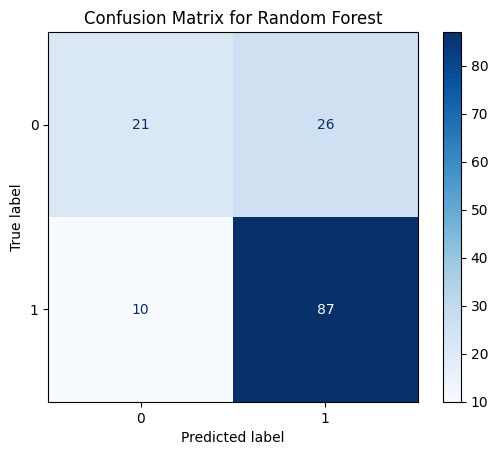

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

rfc_100.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)



# Check accuracy score

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))


# Compute confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_100)
print("Confusion Matrix for Random Forest:")
print(conf_matrix_rf)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels= rfc_100.classes_)

disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Random Forest")
plt.show()

#### **Feature Importance**

#### **model may not be working well due to large number of independent variables**

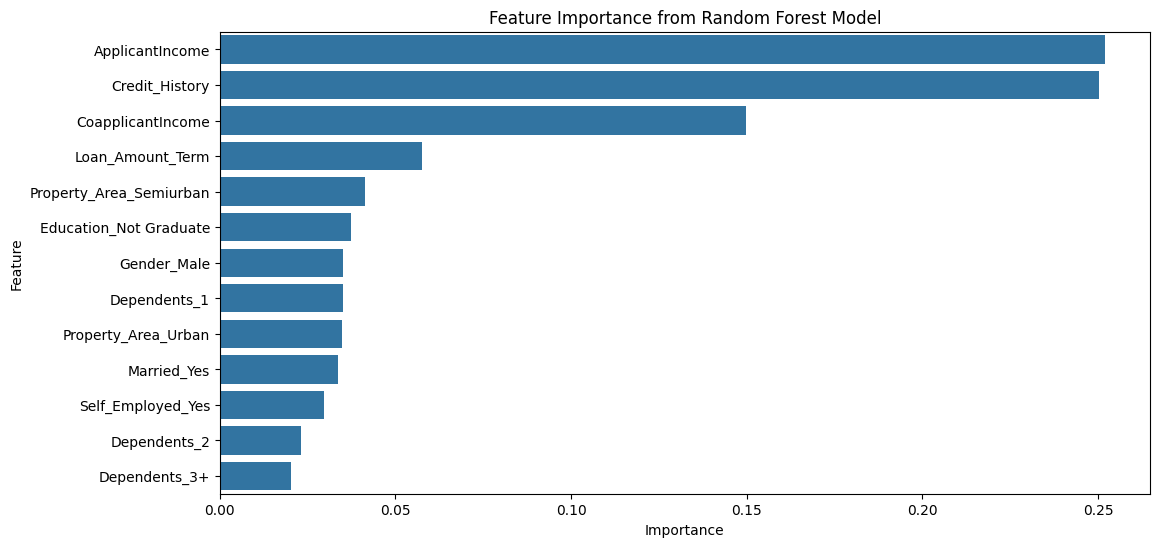

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Assume you have your data loaded into trainX and trainY
# Fit the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#### **Trainig the RF  model with only 4 important features**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Assume you have your data loaded into trainX and trainY
# Fit the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# List of top 4 important features
top_features = [
    'Credit_History',
    'ApplicantIncome',
    'CoapplicantIncome',
    'Loan_Amount_Term'
]

# Creating a new DataFrame using transformed "dat" data frame with only the top 4 features
feature_new = dat[top_features]

# Display the new DataFrame
feature_new

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Assume you have your data loaded into trainX and trainY
# Fit the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


# List of top 4 important features
top_features = [
    'Credit_History',
    'ApplicantIncome',
    'CoapplicantIncome',
    'Loan_Amount_Term'
]

# Creating a new DataFrame using transformed "dat" data frame with only the top 4 features
feature_new = dat[top_features]

# Display the new DataFrame
feature_new

### target df

target = dat[["Loan_Status_Y"]]
target_change = target.values.flatten()
target_change

feature_new.shape, target_change.shape



from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_new, target_change, train_size=0.7)

In [ ]:
### target df

target = dat[["Loan_Status_Y"]]
target_change = target.values.flatten()
target_change

feature_new.shape, target_change.shape


((480, 4), (480,))

#### **split data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_new, target_change, train_size=0.7)

####**Model 2: using 4 variable into Random Forest model with 100 estimators**

Model accuracy score with 100 decision-trees : 0.8056
Confusion Matrix for Random Forest:
[[28 21]
 [ 7 88]]


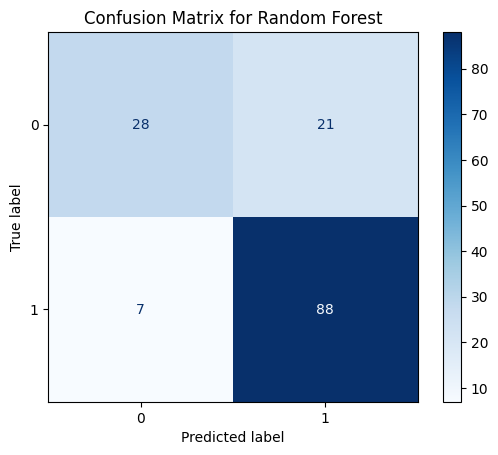

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

rfc_100.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)



# Check accuracy score

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))


# Compute confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_100)
print("Confusion Matrix for Random Forest:")
print(conf_matrix_rf)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels= rfc_100.classes_)

disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Random Forest")
plt.show()

### **Model 4: logistic regression with 4 variables and trained with k fold**

In [ ]:
### using train x with cross validation to train model and then tested with testy
#### train x and test x was splitted earlier using train test
# Import necessary libraries
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np

#
# Initialize KFold cross-validator
kfold_validation = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=200)

# Perform cross-validation
cv_results = cross_val_score(model, X_train, y_train, cv=kfold_validation)

# Print cross-validation results
print("Cross-validation results:", cv_results)
print("Mean accuracy:", cv_results.mean())
print("Standard deviation:", cv_results.std())

# Fit the model on the scaled training data
model.fit(X_train, y_train)

# Evaluate on the scaled testing data
test_accuracy = model.score(X_test, y_test)  # Ensure testY is also 1D
print("Test accuracy:", test_accuracy)


## confusion matrix , report
y_pred= model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Cross-validation results: [0.82352941 0.85294118 0.85294118 0.79411765 0.76470588 0.76470588
 0.87878788 0.72727273 0.81818182 0.81818182]
Mean accuracy: 0.8095365418894831
Standard deviation: 0.04464706917839262
Test accuracy: 0.8055555555555556
[[22 27]
 [ 1 94]]
0.8055555555555556
              precision    recall  f1-score   support

           0       0.96      0.45      0.61        49
           1       0.78      0.99      0.87        95

    accuracy                           0.81       144
   macro avg       0.87      0.72      0.74       144
weighted avg       0.84      0.81      0.78       144



In [ ]:
#### model logistic regression with 4 variables

from sklearn.linear_model import LogisticRegression
# Initial the model and fit the model.
lr = LogisticRegression()
lr.fit(X_train,y_train)


pred_lr = lr.predict(X_test)
print(pred_lr)



#Performance on training set
print(lr.score(X_train,y_train))
# Performance on test set
# score function will automatically predict for testX and then compare with true value
print(lr.score(X_test,y_test))



# "labels" option defines the order - the order of rows will follow the orders in the "labels".
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
metrics.confusion_matrix(y_pred=pred_lr, y_true=y_test, labels = [0, 1])

[1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0
 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1]
0.8095238095238095
0.8055555555555556


array([[22, 27],
       [ 1, 94]])

#### **Logistic regression with 13 variables**

In [ ]:
from sklearn.linear_model import LogisticRegression
# Initial the model and fit the model.
lr = LogisticRegression()
lr.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

##

In [ ]:
pred_lr = lr.predict(testX)
print(pred_lr)

[1 1 1 1 1 1 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 1 0]


In [ ]:
#Performance on training set
print(lr.score(trainX,trainY))
# Performance on test set
# score function will automatically predict for testX and then compare with true value
print(lr.score(testX,testY))

0.8083333333333333
0.8333333333333334


In [ ]:
# "labels" option defines the order - the order of rows will follow the orders in the "labels".
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
metrics.confusion_matrix(y_pred=pred_lr, y_true=testY, labels = [1, 0])

array([[81,  2],
       [18, 19]])

#### model3: **decision tree with 4 variable**

#### **Method 3:** **Adding class weight**

#### **Model 3: Random Forest(4 variables)  with added class weight**

##### ## **case1 : since 0 is less inour case so asking to give 0 more importance than 1**

In [ ]:
## case1 : since 0 is less inour case so asking to give 0 more importance than 1
class_weight = dict({0: 100, 1: 1})
classifier = RandomForestClassifier(class_weight= class_weight)
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[32 17]
 [20 75]]
0.7430555555555556
              precision    recall  f1-score   support

           0       0.62      0.65      0.63        49
           1       0.82      0.79      0.80        95

    accuracy                           0.74       144
   macro avg       0.72      0.72      0.72       144
weighted avg       0.75      0.74      0.74       144



#### **Case2: class weight added for 1 more importance as exp to see which works better.**


In [ ]:
class_weight = dict({0 : 1, 1 : 100})
classifier = RandomForestClassifier(class_weight= class_weight)
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[31 18]
 [ 6 89]]
0.8333333333333334
              precision    recall  f1-score   support

           0       0.84      0.63      0.72        49
           1       0.83      0.94      0.88        95

    accuracy                           0.83       144
   macro avg       0.83      0.78      0.80       144
weighted avg       0.83      0.83      0.83       144



#### **Conclusion**

1. case 2 when giving importance to class 1 worked better then case 1 when 0 was given importance

2. case2  works better because it aligns with your data distribution and problem goals.

In [ ]:
class_weight = dict({1 : 300, 1 : 100})
classifier = RandomForestClassifier(class_weight= class_weight)
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[31 18]
 [ 9 86]]
0.8125
              precision    recall  f1-score   support

           0       0.78      0.63      0.70        49
           1       0.83      0.91      0.86        95

    accuracy                           0.81       144
   macro avg       0.80      0.77      0.78       144
weighted avg       0.81      0.81      0.81       144



####**Conclusion on class weight**

1. Adding class weight parameter to random forest, **drastically reduced false positive (from 22 to 18) making recall for 0(not approved) increase from .45 to .63** thus precison and recall both are balanced this time. last time, precison for 0 was arnd 90 but recall for 0 was only 48.

2. well, we also see accuracy increased to 83% along with better matrix results.(Although accuracy in imbalnce data is not so important.



#### **method 3: Resampling techniques**

#### 1. **Oversampling**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

os = RandomOverSampler(0,5)
X_train_ns, y_train_ns = os.fit_sample(X_train, y_train)
print("the number of classes before fit {}", format(Counter(y_train)))
print("the number of classes before fit {}", format(Counter(y_train_ns)))



TypeError: RandomOverSampler.__init__() takes 1 positional argument but 3 were given

#### **Pickling the model for deployment**

#### **Model 1: logistic regression with 13 variables**

In [ ]:
import pickle

In [ ]:
## creating the file for model 1 : logistic regression lr
## create in same directry where this jupyter us
## PUT ALL CONTENT INTO IT
# pickle.dump(lr, open('lrmodel1.pkl', "wb"))

import pickle

# Path where you want to save the file
save_path = '/content/drive/MyDrive/Colab Notebooks/lrmodel1.pkl'

# Saving your pickled model
with open(save_path, 'wb') as file:
    pickle.dump(lr, file)


In [ ]:
## loading AND reading content
pickled_model = pickle.load(open("lrmodel1.pkl", "rb"))

In [ ]:
pickled_model #(lr model declared)

LogisticRegression()

In [ ]:
## using the file for predicting
pickled_model.predict(testX)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])